In [1]:
import AbacusCosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import Counter
import scipy.ndimage as scpimg
import h5py
from matplotlib import cm

import glob

In [2]:
archivos = [0,14,25,32,38]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/cosmologias/Simulacion{}/fields/watershed_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5'

grupos = []

for i in archivos:
    with h5py.File(filename.format(i), 'r') as f:
        print(f.keys())
        watershed_groups_key = list(f.keys())[0]
        watershed_groups = np.array(f[watershed_groups_key])
        
    grupos.append(watershed_groups)
    

<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>


In [5]:
volumen = 8
ordenes = []
for i in grupos:
    ordenes.append(len(list(set(i.flatten()))))


volumenes = []
for orden in range(len(ordenes)):
    volumen_actual = []
    for i in range(ordenes[orden]):
        if(i%100==0):
            print(i)
        volumen_actual.append(len(grupos[orden][grupos[orden]==i])*volumen)
    volumenes.append(volumen_actual)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
0
100
200
300
400
500
600
700
800
900


In [2]:
import AbacusCosmos.Halos as ach
from astropy.table import Table
from collections import Counter
import scipy.ndimage as scpimg
masa_particula = 1.E10

In [7]:
path = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/cosmologias/Simulacion{}'

N = []
pos_x = []
pos_y = []
pos_z = []
for i in archivos:
    halo_data = ach.read_halos_FoF(path.format(i))
    N.append(halo_data['N'])
    posiciones = halo_data['pos']
    pos_x.append(posiciones[:,0])
    pos_y.append(posiciones[:,1])
    pos_z.append(posiciones[:,2])

C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/cosmologias/Simulacion0\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/cosmologias/Simulacion14\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/cosmologias/Simulacion25\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/cosmologias/Simulacion32\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/cosmologias/Simulacion38\halos_\d+$


In [26]:
masas_simulaciones = []
for arch in range(len(archivos)):
    masas_original = np.zeros((360,360,360))
    pos_x_mod = (pos_x[arch]*0.4999+180)//1
    pos_y_mod = (pos_y[arch]*0.4999+180)//1
    pos_z_mod = (pos_z[arch]*0.4999+180)//1
    pos_mod = np.array([pos_x_mod,pos_y_mod,pos_z_mod]).T
    
    for i in range(len(pos_mod)):
        if(i%100==0):
            print(i)
        masas_original[int(pos_mod[i][0]),int(pos_mod[i][1]),int(pos_mod[i][2])] += N[arch][i]
    masas = []
    for i in range(ordenes[arch]):
        if(i%100==0):
            print(i)
        ubicaciones= np.array(np.where(grupos[arch] == i)).T
        masa_grupo = []
        for j in ubicaciones:
            masa_grupo.append(masas_original[j[0],j[1],j[2]])
        masas.append(np.sum(masa_grupo))
    masas2 = np.array([int(x) for x in masas])
    masas_simulaciones.append(masas2)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

159500
159600
159700
159800
159900
160000
160100
160200
160300
160400
160500
160600
160700
160800
160900
161000
161100
161200
161300
161400
161500
161600
161700
161800
161900
162000
162100
162200
162300
162400
162500
162600
162700
162800
162900
163000
163100
163200
163300
163400
163500
163600
163700
163800
163900
164000
164100
164200
164300
164400
164500
164600
164700
164800
164900
165000
165100
165200
165300
165400
165500
165600
165700
165800
165900
166000
166100
166200
166300
166400
166500
166600
166700
166800
166900
167000
167100
167200
167300
167400
167500
167600
167700
167800
167900
168000
168100
168200
168300
168400
168500
168600
168700
168800
168900
169000
169100
169200
169300
169400
169500
169600
169700
169800
169900
170000
170100
170200
170300
170400
170500
170600
170700
170800
170900
171000
171100
171200
171300
171400
171500
171600
171700
171800
171900
172000
172100
172200
172300
172400
172500
172600
172700
172800
172900
173000
173100
173200
173300
173400
173500
173600
173700

314800
314900
315000
315100
315200
315300
315400
315500
315600
315700
315800
315900
316000
316100
316200
316300
316400
316500
316600
316700
316800
316900
317000
317100
317200
317300
317400
317500
317600
317700
317800
317900
318000
318100
318200
318300
318400
318500
318600
318700
318800
318900
319000
319100
319200
319300
319400
319500
319600
319700
319800
319900
320000
320100
320200
320300
320400
320500
320600
320700
320800
320900
321000
321100
321200
321300
321400
321500
321600
321700
321800
321900
322000
322100
322200
322300
322400
322500
322600
322700
322800
322900
323000
323100
323200
323300
323400
323500
323600
323700
323800
323900
324000
324100
324200
324300
324400
324500
324600
324700
324800
324900
325000
325100
325200
325300
325400
325500
325600
325700
325800
325900
326000
326100
326200
326300
326400
326500
326600
326700
326800
326900
327000
327100
327200
327300
327400
327500
327600
327700
327800
327900
328000
328100
328200
328300
328400
328500
328600
328700
328800
328900
329000

451000
451100
451200
451300
451400
451500
451600
451700
451800
451900
452000
452100
452200
452300
452400
452500
452600
452700
452800
452900
453000
453100
453200
453300
453400
453500
453600
453700
453800
453900
454000
454100
454200
454300
454400
454500
454600
454700
454800
454900
455000
455100
455200
455300
455400
455500
455600
455700
455800
455900
456000
456100
456200
456300
456400
456500
456600
456700
456800
456900
457000
457100
457200
457300
457400
457500
457600
457700
457800
457900
458000
458100
458200
458300
458400
458500
458600
458700
458800
458900
459000
459100
459200
459300
459400
459500
459600
459700
459800
459900
460000
460100
460200
460300
460400
460500
460600
460700
460800
460900
461000
461100
461200
461300
461400
461500
461600
461700
461800
461900
462000
462100
462200
462300
462400
462500
462600
462700
462800
462900
463000
463100
463200
463300
463400
463500
463600
463700
463800
463900
464000
464100
464200
464300
464400
464500
464600
464700
464800
464900
465000
465100
465200

568700
568800
568900
569000
569100
569200
569300
569400
569500
569600
569700
569800
569900
570000
570100
570200
570300
570400
570500
570600
570700
570800
570900
571000
571100
571200
571300
571400
571500
571600
571700
571800
571900
572000
572100
572200
572300
572400
572500
572600
572700
572800
572900
573000
573100
573200
573300
573400
573500
573600
573700
573800
573900
574000
574100
574200
574300
574400
574500
574600
574700
574800
574900
575000
575100
575200
575300
575400
575500
575600
575700
575800
575900
576000
576100
576200
576300
576400
576500
576600
576700
576800
576900
577000
577100
577200
577300
577400
577500
577600
577700
577800
577900
578000
578100
578200
578300
578400
578500
578600
578700
578800
578900
579000
579100
579200
579300
579400
579500
579600
579700
579800
579900
580000
580100
580200
580300
580400
580500
580600
580700
580800
580900
581000
581100
581200
581300
581400
581500
581600
581700
581800
581900
582000
582100
582200
582300
582400
582500
582600
582700
582800
582900

698600
698700
698800
698900
699000
699100
699200
699300
699400
699500
699600
699700
699800
699900
700000
700100
700200
700300
700400
700500
700600
700700
700800
700900
701000
701100
701200
701300
701400
701500
701600
701700
701800
701900
702000
702100
702200
702300
702400
702500
702600
702700
702800
702900
703000
703100
703200
703300
703400
703500
703600
703700
703800
703900
704000
704100
704200
704300
704400
704500
704600
704700
704800
704900
705000
705100
705200
705300
705400
705500
705600
705700
705800
705900
706000
706100
706200
706300
706400
706500
706600
706700
706800
706900
707000
707100
707200
707300
707400
707500
707600
707700
707800
707900
708000
708100
708200
708300
708400
708500
708600
708700
708800
708900
709000
709100
709200
709300
709400
709500
709600
709700
709800
709900
710000
710100
710200
710300
710400
710500
710600
710700
710800
710900
711000
711100
711200
711300
711400
711500
711600
711700
711800
711900
712000
712100
712200
712300
712400
712500
712600
712700
712800

857300
857400
857500
857600
857700
857800
857900
858000
858100
858200
858300
858400
858500
858600
858700
858800
858900
859000
859100
859200
859300
859400
859500
859600
859700
859800
859900
860000
860100
860200
860300
860400
860500
860600
860700
860800
860900
861000
861100
861200
861300
861400
861500
861600
861700
861800
861900
862000
862100
862200
862300
862400
862500
862600
862700
862800
862900
863000
863100
863200
863300
863400
863500
863600
863700
863800
863900
864000
864100
864200
864300
864400
864500
864600
864700
864800
864900
865000
865100
865200
865300
865400
865500
865600
865700
865800
865900
866000
866100
866200
866300
866400
866500
866600
866700
866800
866900
867000
867100
867200
867300
867400
867500
867600
867700
867800
867900
868000
868100
868200
868300
868400
868500
868600
868700
868800
868900
869000
869100
869200
869300
869400
869500
869600
869700
869800
869900
870000
870100
870200
870300
870400
870500
870600
870700
870800
870900
871000
871100
871200
871300
871400
871500

991000
991100
991200
991300
991400
991500
991600
991700
991800
991900
992000
992100
992200
992300
992400
992500
992600
992700
992800
992900
993000
993100
993200
993300
993400
993500
993600
993700
993800
993900
994000
994100
994200
994300
994400
994500
994600
994700
994800
994900
995000
995100
995200
995300
995400
995500
995600
995700
995800
995900
996000
996100
996200
996300
996400
996500
996600
996700
996800
996900
997000
997100
997200
997300
997400
997500
997600
997700
997800
997900
998000
998100
998200
998300
998400
998500
998600
998700
998800
998900
999000
999100
999200
999300
999400
999500
999600
999700
999800
999900
1000000
1000100
1000200
1000300
1000400
1000500
1000600
1000700
1000800
1000900
1001000
1001100
1001200
1001300
1001400
1001500
1001600
1001700
1001800
1001900
1002000
1002100
1002200
1002300
1002400
1002500
1002600
1002700
1002800
1002900
1003000
1003100
1003200
1003300
1003400
1003500
1003600
1003700
1003800
1003900
1004000
1004100
1004200
1004300
1004400
1004500
10

1152100
1152200
1152300
1152400
1152500
1152600
1152700
1152800
1152900
1153000
1153100
1153200
1153300
1153400
1153500
1153600
1153700
1153800
1153900
1154000
1154100
1154200
1154300
1154400
1154500
1154600
1154700
1154800
1154900
1155000
1155100
1155200
1155300
1155400
1155500
1155600
1155700
1155800
1155900
1156000
1156100
1156200
1156300
1156400
1156500
1156600
1156700
1156800
1156900
1157000
1157100
1157200
1157300
1157400
1157500
1157600
1157700
1157800
1157900
1158000
1158100
1158200
1158300
1158400
1158500
1158600
1158700
1158800
1158900
1159000
1159100
1159200
1159300
1159400
1159500
1159600
1159700
1159800
1159900
1160000
1160100
1160200
1160300
1160400
1160500
1160600
1160700
1160800
1160900
1161000
1161100
1161200
1161300
1161400
1161500
1161600
1161700
1161800
1161900
1162000
1162100
1162200
1162300
1162400
1162500
1162600
1162700
1162800
1162900
1163000
1163100
1163200
1163300
1163400
1163500
1163600
1163700
1163800
1163900
1164000
1164100
1164200
1164300
1164400
1164500


1288200
1288300
1288400
1288500
1288600
1288700
1288800
1288900
1289000
1289100
1289200
1289300
1289400
1289500
1289600
1289700
1289800
1289900
1290000
1290100
1290200
1290300
1290400
1290500
1290600
1290700
1290800
1290900
1291000
1291100
1291200
1291300
1291400
1291500
1291600
1291700
1291800
1291900
1292000
1292100
1292200
1292300
1292400
1292500
1292600
1292700
1292800
1292900
1293000
1293100
1293200
1293300
1293400
1293500
1293600
1293700
1293800
1293900
1294000
1294100
1294200
1294300
1294400
1294500
1294600
1294700
1294800
1294900
1295000
1295100
1295200
1295300
1295400
1295500
1295600
1295700
1295800
1295900
1296000
1296100
1296200
1296300
1296400
1296500
1296600
1296700
1296800
1296900
1297000
1297100
1297200
1297300
1297400
1297500
1297600
1297700
1297800
1297900
1298000
1298100
1298200
1298300
1298400
1298500
1298600
1298700
1298800
1298900
1299000
1299100
1299200
1299300
1299400
1299500
1299600
1299700
1299800
1299900
1300000
1300100
1300200
1300300
1300400
1300500
1300600


1399600
1399700
1399800
1399900
1400000
1400100
1400200
1400300
1400400
1400500
1400600
1400700
1400800
1400900
1401000
1401100
1401200
1401300
1401400
1401500
1401600
1401700
1401800
1401900
1402000
1402100
1402200
1402300
1402400
1402500
1402600
1402700
1402800
1402900
1403000
1403100
1403200
1403300
1403400
1403500
1403600
1403700
1403800
1403900
1404000
1404100
1404200
1404300
1404400
1404500
1404600
1404700
1404800
1404900
1405000
1405100
1405200
1405300
1405400
1405500
1405600
1405700
1405800
1405900
1406000
1406100
1406200
1406300
1406400
1406500
1406600
1406700
1406800
1406900
1407000
1407100
1407200
1407300
1407400
1407500
1407600
1407700
1407800
1407900
1408000
1408100
1408200
1408300
1408400
1408500
1408600
1408700
1408800
1408900
1409000
1409100
1409200
1409300
1409400
1409500
1409600
1409700
1409800
1409900
1410000
1410100
1410200
1410300
1410400
1410500
1410600
1410700
1410800
1410900
1411000
1411100
1411200
1411300
1411400
1411500
1411600
1411700
1411800
1411900
1412000


1508200
1508300
1508400
1508500
1508600
1508700
1508800
1508900
1509000
1509100
1509200
1509300
1509400
1509500
1509600
1509700
1509800
1509900
1510000
1510100
1510200
1510300
1510400
1510500
1510600
1510700
1510800
1510900
1511000
1511100
1511200
1511300
1511400
1511500
1511600
1511700
1511800
1511900
1512000
1512100
1512200
1512300
1512400
1512500
1512600
1512700
1512800
1512900
1513000
1513100
1513200
1513300
1513400
1513500
1513600
1513700
1513800
1513900
1514000
1514100
1514200
1514300
1514400
1514500
1514600
1514700
1514800
1514900
1515000
1515100
1515200
1515300
1515400
1515500
1515600
1515700
1515800
1515900
1516000
1516100
1516200
1516300
1516400
1516500
1516600
1516700
1516800
1516900
1517000
1517100
1517200
1517300
1517400
1517500
1517600
1517700
1517800
1517900
1518000
1518100
1518200
1518300
1518400
1518500
1518600
1518700
1518800
1518900
1519000
1519100
1519200
1519300
1519400
1519500
1519600
1519700
1519800
1519900
1520000
1520100
1520200
1520300
1520400
1520500
1520600


1658100
1658200
1658300
1658400
1658500
1658600
1658700
1658800
1658900
1659000
1659100
1659200
1659300
1659400
1659500
1659600
1659700
1659800
1659900
1660000
1660100
1660200
1660300
1660400
1660500
1660600
1660700
1660800
1660900
1661000
1661100
1661200
1661300
1661400
1661500
1661600
1661700
1661800
1661900
1662000
1662100
1662200
1662300
1662400
1662500
1662600
1662700
1662800
1662900
1663000
1663100
1663200
1663300
1663400
1663500
1663600
1663700
1663800
1663900
1664000
1664100
1664200
1664300
1664400
1664500
1664600
1664700
1664800
1664900
1665000
1665100
1665200
1665300
1665400
1665500
1665600
1665700
1665800
1665900
1666000
1666100
1666200
1666300
1666400
1666500
1666600
1666700
1666800
1666900
1667000
1667100
1667200
1667300
1667400
1667500
1667600
1667700
1667800
1667900
1668000
1668100
1668200
1668300
1668400
1668500
1668600
1668700
1668800
1668900
1669000
1669100
1669200
1669300
1669400
1669500
1669600
1669700
1669800
1669900
1670000
1670100
1670200
1670300
1670400
1670500


1775900
1776000
1776100
1776200
1776300
1776400
1776500
1776600
1776700
1776800
1776900
1777000
1777100
1777200
1777300
1777400
1777500
1777600
1777700
1777800
1777900
1778000
1778100
1778200
1778300
1778400
1778500
1778600
1778700
1778800
1778900
1779000
1779100
1779200
1779300
1779400
1779500
1779600
1779700
1779800
1779900
1780000
1780100
1780200
1780300
1780400
1780500
1780600
1780700
1780800
1780900
1781000
1781100
1781200
1781300
1781400
1781500
1781600
1781700
1781800
1781900
1782000
1782100
1782200
1782300
1782400
1782500
1782600
1782700
1782800
1782900
1783000
1783100
1783200
1783300
1783400
1783500
1783600
1783700
1783800
1783900
1784000
1784100
1784200
1784300
1784400
1784500
1784600
1784700
1784800
1784900
1785000
1785100
1785200
1785300
1785400
1785500
1785600
1785700
1785800
1785900
1786000
1786100
1786200
1786300
1786400
1786500
1786600
1786700
1786800
1786900
1787000
1787100
1787200
1787300
1787400
1787500
1787600
1787700
1787800
1787900
1788000
1788100
1788200
1788300


1881000
1881100
1881200
1881300
1881400
1881500
1881600
1881700
1881800
1881900
1882000
1882100
1882200
1882300
1882400
1882500
1882600
1882700
1882800
1882900
1883000
1883100
1883200
1883300
1883400
1883500
1883600
1883700
1883800
1883900
1884000
1884100
1884200
1884300
1884400
1884500
1884600
1884700
1884800
1884900
1885000
1885100
1885200
1885300
1885400
1885500
1885600
1885700
1885800
1885900
1886000
1886100
1886200
1886300
1886400
1886500
1886600
1886700
1886800
1886900
1887000
1887100
1887200
1887300
1887400
1887500
1887600
1887700
1887800
1887900
1888000
1888100
1888200
1888300
1888400
1888500
1888600
1888700
1888800
1888900
1889000
1889100
1889200
1889300
1889400
1889500
1889600
1889700
1889800
1889900
1890000
1890100
1890200
1890300
1890400
1890500
1890600
1890700
1890800
1890900
1891000
1891100
1891200
1891300
1891400
1891500
1891600
1891700
1891800
1891900
1892000
1892100
1892200
1892300
1892400
1892500
1892600
1892700
1892800
1892900
1893000
1893100
1893200
1893300
1893400


2015000
2015100
2015200
2015300
2015400
2015500
2015600
2015700
2015800
2015900
2016000
2016100
2016200
2016300
2016400
2016500
2016600
2016700
2016800
2016900
2017000
2017100
2017200
2017300
2017400
2017500
2017600
2017700
2017800
2017900
2018000
2018100
2018200
2018300
2018400
2018500
2018600
2018700
2018800
2018900
2019000
2019100
2019200
2019300
2019400
2019500
2019600
2019700
2019800
2019900
2020000
2020100
2020200
2020300
2020400
2020500
2020600
2020700
2020800
2020900
2021000
2021100
2021200
2021300
2021400
2021500
2021600
2021700
2021800
2021900
2022000
2022100
2022200
2022300
2022400
2022500
2022600
2022700
2022800
2022900
2023000
2023100
2023200
2023300
2023400
2023500
2023600
2023700
2023800
2023900
2024000
2024100
2024200
2024300
2024400
2024500
2024600
2024700
2024800
2024900
2025000
2025100
2025200
2025300
2025400
2025500
2025600
2025700
2025800
2025900
2026000
2026100
2026200
2026300
2026400
2026500
2026600
2026700
2026800
2026900
2027000
2027100
2027200
2027300
2027400


2156900
2157000
2157100
2157200
2157300
2157400
2157500
2157600
2157700
2157800
2157900
2158000
2158100
2158200
2158300
2158400
2158500
2158600
2158700
2158800
2158900
2159000
2159100
2159200
2159300
2159400
2159500
2159600
2159700
2159800
2159900
2160000
2160100
2160200
2160300
2160400
2160500
2160600
2160700
2160800
2160900
2161000
2161100
2161200
2161300
2161400
2161500
2161600
2161700
2161800
2161900
2162000
2162100
2162200
2162300
2162400
2162500
2162600
2162700
2162800
2162900
2163000
2163100
2163200
2163300
2163400
2163500
2163600
2163700
2163800
2163900
2164000
2164100
2164200
2164300
2164400
2164500
2164600
2164700
2164800
2164900
2165000
2165100
2165200
2165300
2165400
2165500
2165600
2165700
2165800
2165900
2166000
2166100
2166200
2166300
2166400
2166500
2166600
2166700
2166800
2166900
2167000
2167100
2167200
2167300
2167400
2167500
2167600
2167700
2167800
2167900
2168000
2168100
2168200
2168300
2168400
2168500
2168600
2168700
2168800
2168900
2169000
2169100
2169200
2169300


2289300
2289400
2289500
2289600
2289700
2289800
2289900
2290000
2290100
2290200
2290300
2290400
2290500
2290600
2290700
2290800
2290900
2291000
2291100
2291200
2291300
2291400
2291500
2291600
2291700
2291800
2291900
2292000
2292100
2292200
2292300
2292400
2292500
2292600
2292700
2292800
2292900
2293000
2293100
2293200
2293300
2293400
2293500
2293600
2293700
2293800
2293900
2294000
2294100
2294200
2294300
2294400
2294500
2294600
2294700
2294800
2294900
2295000
2295100
2295200
2295300
2295400
2295500
2295600
2295700
2295800
2295900
2296000
2296100
2296200
2296300
2296400
2296500
2296600
2296700
2296800
2296900
2297000
2297100
2297200
2297300
2297400
2297500
2297600
2297700
2297800
2297900
2298000
2298100
2298200
2298300
2298400
2298500
2298600
2298700
2298800
2298900
2299000
2299100
2299200
2299300
2299400
2299500
2299600
2299700
2299800
2299900
2300000
2300100
2300200
2300300
2300400
2300500
2300600
2300700
2300800
2300900
2301000
2301100
2301200
2301300
2301400
2301500
2301600
2301700


2407300
2407400
2407500
2407600
2407700
2407800
2407900
2408000
2408100
2408200
2408300
2408400
2408500
2408600
2408700
2408800
2408900
2409000
2409100
2409200
2409300
2409400
2409500
2409600
2409700
2409800
2409900
2410000
2410100
2410200
2410300
2410400
2410500
2410600
2410700
2410800
2410900
2411000
2411100
2411200
2411300
2411400
2411500
2411600
2411700
2411800
2411900
2412000
2412100
2412200
2412300
2412400
2412500
2412600
2412700
2412800
2412900
2413000
2413100
2413200
2413300
2413400
2413500
2413600
2413700
2413800
2413900
2414000
2414100
2414200
2414300
2414400
2414500
2414600
2414700
2414800
2414900
2415000
2415100
2415200
2415300
2415400
2415500
2415600
2415700
2415800
2415900
2416000
2416100
2416200
2416300
2416400
2416500
2416600
2416700
2416800
2416900
2417000
2417100
2417200
2417300
2417400
2417500
2417600
2417700
2417800
2417900
2418000
2418100
2418200
2418300
2418400
2418500
2418600
2418700
2418800
2418900
2419000
2419100
2419200
2419300
2419400
2419500
2419600
2419700


2514300
2514400
2514500
2514600
2514700
2514800
2514900
2515000
2515100
2515200
2515300
2515400
2515500
2515600
2515700
2515800
2515900
2516000
2516100
2516200
2516300
2516400
2516500
2516600
2516700
2516800
2516900
2517000
2517100
2517200
2517300
2517400
2517500
2517600
2517700
2517800
2517900
2518000
2518100
2518200
2518300
2518400
2518500
2518600
2518700
2518800
2518900
2519000
2519100
2519200
2519300
2519400
2519500
2519600
2519700
2519800
2519900
2520000
2520100
2520200
2520300
2520400
2520500
2520600
2520700
2520800
2520900
2521000
2521100
2521200
2521300
2521400
2521500
2521600
2521700
2521800
2521900
2522000
2522100
2522200
2522300
2522400
2522500
2522600
2522700
2522800
2522900
2523000
2523100
2523200
2523300
2523400
2523500
2523600
2523700
2523800
2523900
2524000
2524100
2524200
2524300
2524400
2524500
2524600
2524700
2524800
2524900
2525000
2525100
2525200
2525300
2525400
2525500
2525600
2525700
2525800
2525900
2526000
2526100
2526200
2526300
2526400
2526500
2526600
2526700


2647900
2648000
2648100
2648200
2648300
2648400
2648500
2648600
2648700
2648800
2648900
2649000
2649100
2649200
2649300
2649400
2649500
2649600
2649700
2649800
2649900
2650000
2650100
2650200
2650300
2650400
2650500
2650600
2650700
2650800
2650900
2651000
2651100
2651200
2651300
2651400
2651500
2651600
2651700
2651800
2651900
2652000
2652100
2652200
2652300
2652400
2652500
2652600
2652700
2652800
2652900
2653000
2653100
2653200
2653300
2653400
2653500
2653600
2653700
2653800
2653900
2654000
2654100
2654200
2654300
2654400
2654500
2654600
2654700
2654800
2654900
2655000
2655100
2655200
2655300
2655400
2655500
2655600
2655700
2655800
2655900
2656000
2656100
2656200
2656300
2656400
2656500
2656600
2656700
2656800
2656900
2657000
2657100
2657200
2657300
2657400
2657500
2657600
2657700
2657800
2657900
2658000
2658100
2658200
2658300
2658400
2658500
2658600
2658700
2658800
2658900
2659000
2659100
2659200
2659300
2659400
2659500
2659600
2659700
2659800
2659900
2660000
2660100
2660200
2660300


2778900
2779000
2779100
2779200
2779300
2779400
2779500
2779600
2779700
2779800
2779900
2780000
2780100
2780200
2780300
2780400
2780500
2780600
2780700
2780800
2780900
2781000
2781100
2781200
2781300
2781400
2781500
2781600
2781700
2781800
2781900
2782000
2782100
2782200
2782300
2782400
2782500
2782600
2782700
2782800
2782900
2783000
2783100
2783200
2783300
2783400
2783500
2783600
2783700
2783800
2783900
2784000
2784100
2784200
2784300
2784400
2784500
2784600
2784700
2784800
2784900
2785000
2785100
2785200
2785300
2785400
2785500
2785600
2785700
2785800
2785900
2786000
2786100
2786200
2786300
2786400
2786500
2786600
2786700
2786800
2786900
2787000
2787100
2787200
2787300
2787400
2787500
2787600
2787700
2787800
2787900
2788000
2788100
2788200
2788300
2788400
2788500
2788600
2788700
2788800
2788900
2789000
2789100
2789200
2789300
2789400
2789500
2789600
2789700
2789800
2789900
2790000
2790100
2790200
2790300
2790400
2790500
2790600
2790700
2790800
2790900
2791000
2791100
2791200
2791300


2910200
2910300
2910400
2910500
2910600
2910700
2910800
2910900
2911000
2911100
2911200
2911300
2911400
2911500
2911600
2911700
2911800
2911900
2912000
2912100
2912200
2912300
2912400
2912500
2912600
2912700
2912800
2912900
2913000
2913100
2913200
2913300
2913400
2913500
2913600
2913700
2913800
2913900
2914000
2914100
2914200
2914300
2914400
2914500
2914600
2914700
2914800
2914900
2915000
2915100
2915200
2915300
2915400
2915500
2915600
2915700
2915800
2915900
2916000
2916100
2916200
2916300
2916400
2916500
2916600
2916700
2916800
2916900
2917000
2917100
2917200
2917300
2917400
2917500
2917600
2917700
2917800
2917900
2918000
2918100
2918200
2918300
2918400
2918500
2918600
2918700
2918800
2918900
2919000
2919100
2919200
2919300
2919400
2919500
2919600
2919700
2919800
2919900
2920000
2920100
2920200
2920300
2920400
2920500
2920600
2920700
2920800
2920900
2921000
2921100
2921200
2921300
2921400
2921500
2921600
2921700
2921800
2921900
2922000
2922100
2922200
2922300
2922400
2922500
2922600


3043900
3044000
3044100
3044200
3044300
3044400
3044500
3044600
3044700
3044800
3044900
3045000
3045100
3045200
3045300
3045400
3045500
3045600
3045700
3045800
3045900
3046000
3046100
3046200
3046300
3046400
3046500
3046600
3046700
3046800
3046900
3047000
3047100
3047200
3047300
3047400
3047500
3047600
3047700
3047800
3047900
3048000
3048100
3048200
3048300
3048400
3048500
3048600
3048700
3048800
3048900
3049000
3049100
3049200
3049300
3049400
3049500
3049600
3049700
3049800
3049900
3050000
3050100
3050200
3050300
3050400
3050500
3050600
3050700
3050800
3050900
3051000
3051100
3051200
3051300
3051400
3051500
3051600
3051700
3051800
3051900
3052000
3052100
3052200
3052300
3052400
3052500
3052600
3052700
3052800
3052900
3053000
3053100
3053200
3053300
3053400
3053500
3053600
3053700
3053800
3053900
3054000
3054100
3054200
3054300
3054400
3054500
3054600
3054700
3054800
3054900
3055000
3055100
3055200
3055300
3055400
3055500
3055600
3055700
3055800
3055900
3056000
3056100
3056200
3056300


3171200
3171300
3171400
3171500
3171600
3171700
3171800
3171900
3172000
3172100
3172200
3172300
3172400
3172500
3172600
3172700
3172800
3172900
3173000
3173100
3173200
3173300
3173400
3173500
3173600
3173700
3173800
3173900
3174000
3174100
3174200
3174300
3174400
3174500
3174600
3174700
3174800
3174900
3175000
3175100
3175200
3175300
3175400
3175500
3175600
3175700
3175800
3175900
3176000
3176100
3176200
3176300
3176400
3176500
3176600
3176700
3176800
3176900
3177000
3177100
3177200
3177300
3177400
3177500
3177600
3177700
3177800
3177900
3178000
3178100
3178200
3178300
3178400
3178500
3178600
3178700
3178800
3178900
3179000
3179100
3179200
3179300
3179400
3179500
3179600
3179700
3179800
3179900
3180000
3180100
3180200
3180300
3180400
3180500
3180600
3180700
3180800
3180900
3181000
3181100
3181200
3181300
3181400
3181500
3181600
3181700
3181800
3181900
3182000
3182100
3182200
3182300
3182400
3182500
3182600
3182700
3182800
3182900
3183000
3183100
3183200
3183300
3183400
3183500
3183600


3283300
3283400
3283500
3283600
3283700
3283800
3283900
3284000
3284100
3284200
3284300
3284400
3284500
3284600
3284700
3284800
3284900
3285000
3285100
3285200
3285300
3285400
3285500
3285600
3285700
3285800
3285900
3286000
3286100
3286200
3286300
3286400
3286500
3286600
3286700
3286800
3286900
3287000
3287100
3287200
3287300
3287400
3287500
3287600
3287700
3287800
3287900
3288000
3288100
3288200
3288300
3288400
3288500
3288600
3288700
3288800
3288900
3289000
3289100
3289200
3289300
3289400
3289500
3289600
3289700
3289800
3289900
3290000
3290100
3290200
3290300
3290400
3290500
3290600
3290700
3290800
3290900
3291000
3291100
3291200
3291300
3291400
3291500
3291600
3291700
3291800
3291900
3292000
3292100
3292200
3292300
3292400
3292500
3292600
3292700
3292800
3292900
3293000
3293100
3293200
3293300
3293400
3293500
3293600
3293700
3293800
3293900
3294000
3294100
3294200
3294300
3294400
3294500
3294600
3294700
3294800
3294900
3295000
3295100
3295200
3295300
3295400
3295500
3295600
3295700


3404400
3404500
3404600
3404700
3404800
3404900
3405000
3405100
3405200
3405300
3405400
3405500
3405600
3405700
3405800
3405900
3406000
3406100
3406200
3406300
3406400
3406500
3406600
3406700
3406800
3406900
3407000
3407100
3407200
3407300
3407400
3407500
3407600
3407700
3407800
3407900
3408000
3408100
3408200
3408300
3408400
3408500
3408600
3408700
3408800
3408900
3409000
3409100
3409200
3409300
3409400
3409500
3409600
3409700
3409800
3409900
3410000
3410100
3410200
3410300
3410400
3410500
3410600
3410700
3410800
3410900
3411000
3411100
3411200
3411300
3411400
3411500
3411600
3411700
3411800
3411900
3412000
3412100
3412200
3412300
3412400
3412500
3412600
3412700
3412800
3412900
3413000
3413100
3413200
3413300
3413400
3413500
3413600
3413700
3413800
3413900
3414000
3414100
3414200
3414300
3414400
3414500
3414600
3414700
3414800
3414900
3415000
3415100
3415200
3415300
3415400
3415500
3415600
3415700
3415800
3415900
3416000
3416100
3416200
3416300
3416400
3416500
3416600
3416700
3416800


3541300
3541400
3541500
3541600
3541700
3541800
3541900
3542000
3542100
3542200
3542300
3542400
3542500
3542600
3542700
3542800
3542900
3543000
3543100
3543200
3543300
3543400
3543500
3543600
3543700
3543800
3543900
3544000
3544100
3544200
3544300
3544400
3544500
3544600
3544700
3544800
3544900
3545000
3545100
3545200
3545300
3545400
3545500
3545600
3545700
3545800
3545900
3546000
3546100
3546200
3546300
3546400
3546500
3546600
3546700
3546800
3546900
3547000
3547100
3547200
3547300
3547400
3547500
3547600
3547700
3547800
3547900
3548000
3548100
3548200
3548300
3548400
3548500
3548600
3548700
3548800
3548900
3549000
3549100
3549200
3549300
3549400
3549500
3549600
3549700
3549800
3549900
3550000
3550100
3550200
3550300
3550400
3550500
3550600
3550700
3550800
3550900
3551000
3551100
3551200
3551300
3551400
3551500
3551600
3551700
3551800
3551900
3552000
3552100
3552200
3552300
3552400
3552500
3552600
3552700
3552800
3552900
3553000
3553100
3553200
3553300
3553400
3553500
3553600
3553700


3698100
3698200
3698300
3698400
3698500
3698600
3698700
3698800
3698900
3699000
3699100
3699200
3699300
3699400
3699500
3699600
3699700
3699800
3699900
3700000
3700100
3700200
3700300
3700400
3700500
3700600
3700700
3700800
3700900
3701000
3701100
3701200
3701300
3701400
3701500
3701600
3701700
3701800
3701900
3702000
3702100
3702200
3702300
3702400
3702500
3702600
3702700
3702800
3702900
3703000
3703100
3703200
3703300
3703400
3703500
3703600
3703700
3703800
3703900
3704000
3704100
3704200
3704300
3704400
3704500
3704600
3704700
3704800
3704900
3705000
3705100
3705200
3705300
3705400
3705500
3705600
3705700
3705800
3705900
3706000
3706100
3706200
3706300
3706400
3706500
3706600
3706700
3706800
3706900
3707000
3707100
3707200
3707300
3707400
3707500
3707600
3707700
3707800
3707900
3708000
3708100
3708200
3708300
3708400
3708500
3708600
3708700
3708800
3708900
3709000
3709100
3709200
3709300
3709400
3709500
3709600
3709700
3709800
3709900
3710000
3710100
3710200
3710300
3710400
3710500


3804400
3804500
3804600
3804700
3804800
3804900
3805000
3805100
3805200
3805300
3805400
3805500
3805600
3805700
3805800
3805900
3806000
3806100
3806200
3806300
3806400
3806500
3806600
3806700
3806800
3806900
3807000
3807100
3807200
3807300
3807400
3807500
3807600
3807700
3807800
3807900
3808000
3808100
3808200
3808300
3808400
3808500
3808600
3808700
3808800
3808900
3809000
3809100
3809200
3809300
3809400
3809500
3809600
3809700
3809800
3809900
3810000
3810100
3810200
3810300
3810400
3810500
3810600
3810700
3810800
3810900
3811000
3811100
3811200
3811300
3811400
3811500
3811600
3811700
3811800
3811900
3812000
3812100
3812200
3812300
3812400
3812500
3812600
3812700
3812800
3812900
3813000
3813100
3813200
3813300
3813400
3813500
3813600
3813700
3813800
3813900
3814000
3814100
3814200
3814300
3814400
3814500
3814600
3814700
3814800
3814900
3815000
3815100
3815200
3815300
3815400
3815500
3815600
3815700
3815800
3815900
3816000
3816100
3816200
3816300
3816400
3816500
3816600
3816700
3816800


3917300
3917400
3917500
3917600
3917700
3917800
3917900
3918000
3918100
3918200
3918300
3918400
3918500
3918600
3918700
3918800
3918900
3919000
3919100
3919200
3919300
3919400
3919500
3919600
3919700
3919800
3919900
3920000
3920100
3920200
3920300
3920400
3920500
3920600
3920700
3920800
3920900
3921000
3921100
3921200
3921300
3921400
3921500
3921600
3921700
3921800
3921900
3922000
3922100
3922200
3922300
3922400
3922500
3922600
3922700
3922800
3922900
3923000
3923100
3923200
3923300
3923400
3923500
3923600
3923700
3923800
3923900
3924000
3924100
3924200
3924300
3924400
3924500
3924600
3924700
3924800
3924900
3925000
3925100
3925200
3925300
3925400
3925500
3925600
3925700
3925800
3925900
3926000
3926100
3926200
3926300
3926400
3926500
3926600
3926700
3926800
3926900
3927000
3927100
3927200
3927300
3927400
3927500
3927600
3927700
3927800
3927900
3928000
3928100
3928200
3928300
3928400
3928500
3928600
3928700
3928800
3928900
3929000
3929100
3929200
3929300
3929400
3929500
3929600
3929700


4039400
4039500
4039600
4039700
4039800
4039900
4040000
4040100
4040200
4040300
4040400
4040500
4040600
4040700
4040800
4040900
4041000
4041100
4041200
4041300
4041400
4041500
4041600
4041700
4041800
4041900
4042000
4042100
4042200
4042300
4042400
4042500
4042600
4042700
4042800
4042900
4043000
4043100
4043200
4043300
4043400
4043500
4043600
4043700
4043800
4043900
4044000
4044100
4044200
4044300
4044400
4044500
4044600
4044700
4044800
4044900
4045000
4045100
4045200
4045300
4045400
4045500
4045600
4045700
4045800
4045900
4046000
4046100
4046200
4046300
4046400
4046500
4046600
4046700
4046800
4046900
4047000
4047100
4047200
4047300
4047400
4047500
4047600
4047700
4047800
4047900
4048000
4048100
4048200
4048300
4048400
4048500
4048600
4048700
4048800
4048900
4049000
4049100
4049200
4049300
4049400
4049500
4049600
4049700
4049800
4049900
4050000
4050100
4050200
4050300
4050400
4050500
4050600
4050700
4050800
4050900
4051000
4051100
4051200
4051300
4051400
4051500
4051600
4051700
4051800


4155600
4155700
4155800
4155900
4156000
4156100
4156200
4156300
4156400
4156500
4156600
4156700
4156800
4156900
4157000
4157100
4157200
4157300
4157400
4157500
4157600
4157700
4157800
4157900
4158000
4158100
4158200
4158300
4158400
4158500
4158600
4158700
4158800
4158900
4159000
4159100
4159200
4159300
4159400
4159500
4159600
4159700
4159800
4159900
4160000
4160100
4160200
4160300
4160400
4160500
4160600
4160700
4160800
4160900
4161000
4161100
4161200
4161300
4161400
4161500
4161600
4161700
4161800
4161900
4162000
4162100
4162200
4162300
4162400
4162500
4162600
4162700
4162800
4162900
4163000
4163100
4163200
4163300
4163400
4163500
4163600
4163700
4163800
4163900
4164000
4164100
4164200
4164300
4164400
4164500
4164600
4164700
4164800
4164900
4165000
4165100
4165200
4165300
4165400
4165500
4165600
4165700
4165800
4165900
4166000
4166100
4166200
4166300
4166400
4166500
4166600
4166700
4166800
4166900
4167000
4167100
4167200
4167300
4167400
4167500
4167600
4167700
4167800
4167900
4168000


4279700
4279800
4279900
4280000
4280100
4280200
4280300
4280400
4280500
4280600
4280700
4280800
4280900
4281000
4281100
4281200
4281300
4281400
4281500
4281600
4281700
4281800
4281900
4282000
4282100
4282200
4282300
4282400
4282500
4282600
4282700
4282800
4282900
4283000
4283100
4283200
4283300
4283400
4283500
4283600
4283700
4283800
4283900
4284000
4284100
4284200
4284300
4284400
4284500
4284600
4284700
4284800
4284900
4285000
4285100
4285200
4285300
4285400
4285500
4285600
4285700
4285800
4285900
4286000
4286100
4286200
4286300
4286400
4286500
4286600
4286700
4286800
4286900
4287000
4287100
4287200
4287300
4287400
4287500
4287600
4287700
4287800
4287900
4288000
4288100
4288200
4288300
4288400
4288500
4288600
4288700
4288800
4288900
4289000
4289100
4289200
4289300
4289400
4289500
4289600
4289700
4289800
4289900
4290000
4290100
4290200
4290300
4290400
4290500
4290600
4290700
4290800
4290900
4291000
4291100
4291200
4291300
4291400
4291500
4291600
4291700
4291800
4291900
4292000
4292100


4395800
4395900
4396000
4396100
4396200
4396300
4396400
4396500
4396600
4396700
4396800
4396900
4397000
4397100
4397200
4397300
4397400
4397500
4397600
4397700
4397800
4397900
4398000
4398100
4398200
4398300
4398400
4398500
4398600
4398700
4398800
4398900
4399000
4399100
4399200
4399300
4399400
4399500
4399600
4399700
4399800
4399900
4400000
4400100
4400200
4400300
4400400
4400500
4400600
4400700
4400800
4400900
4401000
4401100
4401200
4401300
4401400
4401500
4401600
4401700
4401800
4401900
4402000
4402100
4402200
4402300
4402400
4402500
4402600
4402700
4402800
4402900
4403000
4403100
4403200
4403300
4403400
4403500
4403600
4403700
4403800
4403900
4404000
4404100
4404200
4404300
4404400
4404500
4404600
4404700
4404800
4404900
4405000
4405100
4405200
4405300
4405400
4405500
4405600
4405700
4405800
4405900
4406000
4406100
4406200
4406300
4406400
4406500
4406600
4406700
4406800
4406900
4407000
4407100
4407200
4407300
4407400
4407500
4407600
4407700
4407800
4407900
4408000
4408100
4408200


4514600
4514700
4514800
4514900
4515000
4515100
4515200
4515300
4515400
4515500
4515600
4515700
4515800
4515900
4516000
4516100
4516200
4516300
4516400
4516500
4516600
4516700
4516800
4516900
4517000
4517100
4517200
4517300
4517400
4517500
4517600
4517700
4517800
4517900
4518000
4518100
4518200
4518300
4518400
4518500
4518600
4518700
4518800
4518900
4519000
4519100
4519200
4519300
4519400
4519500
4519600
4519700
4519800
4519900
4520000
4520100
4520200
4520300
4520400
4520500
4520600
4520700
4520800
4520900
4521000
4521100
4521200
4521300
4521400
4521500
4521600
4521700
4521800
4521900
4522000
4522100
4522200
4522300
4522400
4522500
4522600
4522700
4522800
4522900
4523000
4523100
4523200
4523300
4523400
4523500
4523600
4523700
4523800
4523900
4524000
4524100
4524200
4524300
4524400
4524500
4524600
4524700
4524800
4524900
4525000
4525100
4525200
4525300
4525400
4525500
4525600
4525700
4525800
4525900
4526000
4526100
4526200
4526300
4526400
4526500
4526600
4526700
4526800
4526900
4527000


4625900
4626000
4626100
4626200
4626300
4626400
4626500
4626600
4626700
4626800
4626900
4627000
4627100
4627200
4627300
4627400
4627500
4627600
4627700
4627800
4627900
4628000
4628100
4628200
4628300
4628400
4628500
4628600
4628700
4628800
4628900
4629000
4629100
4629200
4629300
4629400
4629500
4629600
4629700
4629800
4629900
4630000
4630100
4630200
4630300
4630400
4630500
4630600
4630700
4630800
4630900
4631000
4631100
4631200
4631300
4631400
4631500
4631600
4631700
4631800
4631900
4632000
4632100
4632200
4632300
4632400
4632500
4632600
4632700
4632800
4632900
4633000
4633100
4633200
4633300
4633400
4633500
4633600
4633700
4633800
4633900
4634000
4634100
4634200
4634300
4634400
4634500
4634600
4634700
4634800
4634900
4635000
4635100
4635200
4635300
4635400
4635500
4635600
4635700
4635800
4635900
4636000
4636100
4636200
4636300
4636400
4636500
4636600
4636700
4636800
4636900
4637000
4637100
4637200
4637300
4637400
4637500
4637600
4637700
4637800
4637900
4638000
4638100
4638200
4638300


4741800
4741900
4742000
4742100
4742200
4742300
4742400
4742500
4742600
4742700
4742800
4742900
4743000
4743100
4743200
4743300
4743400
4743500
4743600
4743700
4743800
4743900
4744000
4744100
4744200
4744300
4744400
4744500
4744600
4744700
4744800
4744900
4745000
4745100
4745200
4745300
4745400
4745500
4745600
4745700
4745800
4745900
4746000
4746100
4746200
4746300
4746400
4746500
4746600
4746700
4746800
4746900
4747000
4747100
4747200
4747300
4747400
4747500
4747600
4747700
4747800
4747900
4748000
4748100
4748200
4748300
4748400
4748500
4748600
4748700
4748800
4748900
4749000
4749100
4749200
4749300
4749400
4749500
4749600
4749700
4749800
4749900
4750000
4750100
4750200
4750300
4750400
4750500
4750600
4750700
4750800
4750900
4751000
4751100
4751200
4751300
4751400
4751500
4751600
4751700
4751800
4751900
4752000
4752100
4752200
4752300
4752400
4752500
4752600
4752700
4752800
4752900
4753000
4753100
4753200
4753300
4753400
4753500
4753600
4753700
4753800
4753900
4754000
4754100
4754200


4897600
4897700
4897800
4897900
4898000
4898100
4898200
4898300
4898400
4898500
4898600
4898700
4898800
4898900
4899000
4899100
4899200
4899300
4899400
4899500
4899600
4899700
4899800
4899900
4900000
4900100
4900200
4900300
4900400
4900500
4900600
4900700
4900800
4900900
4901000
4901100
4901200
4901300
4901400
4901500
4901600
4901700
4901800
4901900
4902000
4902100
4902200
4902300
4902400
4902500
4902600
4902700
4902800
4902900
4903000
4903100
4903200
4903300
4903400
4903500
4903600
4903700
4903800
4903900
4904000
4904100
4904200
4904300
4904400
4904500
4904600
4904700
4904800
4904900
4905000
4905100
4905200
4905300
4905400
4905500
4905600
4905700
4905800
4905900
4906000
4906100
4906200
4906300
4906400
4906500
4906600
4906700
4906800
4906900
4907000
4907100
4907200
4907300
4907400
4907500
4907600
4907700
4907800
4907900
4908000
4908100
4908200
4908300
4908400
4908500
4908600
4908700
4908800
4908900
4909000
4909100
4909200
4909300
4909400
4909500
4909600
4909700
4909800
4909900
4910000


5038900
5039000
5039100
5039200
5039300
5039400
5039500
5039600
5039700
5039800
5039900
5040000
5040100
5040200
5040300
5040400
5040500
5040600
5040700
5040800
5040900
5041000
5041100
5041200
5041300
5041400
5041500
5041600
5041700
5041800
5041900
5042000
5042100
5042200
5042300
5042400
5042500
5042600
5042700
5042800
5042900
5043000
5043100
5043200
5043300
5043400
5043500
5043600
5043700
5043800
5043900
5044000
5044100
5044200
5044300
5044400
5044500
5044600
5044700
5044800
5044900
5045000
5045100
5045200
5045300
5045400
5045500
5045600
5045700
5045800
5045900
5046000
5046100
5046200
5046300
5046400
5046500
5046600
5046700
5046800
5046900
5047000
5047100
5047200
5047300
5047400
5047500
5047600
5047700
5047800
5047900
5048000
5048100
5048200
5048300
5048400
5048500
5048600
5048700
5048800
5048900
5049000
5049100
5049200
5049300
5049400
5049500
5049600
5049700
5049800
5049900
5050000
5050100
5050200
5050300
5050400
5050500
5050600
5050700
5050800
5050900
5051000
5051100
5051200
5051300


5151100
5151200
5151300
5151400
5151500
5151600
5151700
5151800
5151900
5152000
5152100
5152200
5152300
5152400
5152500
5152600
5152700
5152800
5152900
5153000
5153100
5153200
5153300
5153400
5153500
5153600
5153700
5153800
5153900
5154000
5154100
5154200
5154300
5154400
5154500
5154600
5154700
5154800
5154900
5155000
5155100
5155200
5155300
5155400
5155500
5155600
5155700
5155800
5155900
5156000
5156100
5156200
5156300
5156400
5156500
5156600
5156700
5156800
5156900
5157000
5157100
5157200
5157300
5157400
5157500
5157600
5157700
5157800
5157900
5158000
5158100
5158200
5158300
5158400
5158500
5158600
5158700
5158800
5158900
5159000
5159100
5159200
5159300
5159400
5159500
5159600
5159700
5159800
5159900
5160000
5160100
5160200
5160300
5160400
5160500
5160600
5160700
5160800
5160900
5161000
5161100
5161200
5161300
5161400
5161500
5161600
5161700
5161800
5161900
5162000
5162100
5162200
5162300
5162400
5162500
5162600
5162700
5162800
5162900
5163000
5163100
5163200
5163300
5163400
5163500


5254600
5254700
5254800
5254900
5255000
5255100
5255200
5255300
5255400
5255500
5255600
5255700
5255800
5255900
5256000
5256100
5256200
5256300
5256400
5256500
5256600
5256700
5256800
5256900
5257000
5257100
5257200
5257300
5257400
5257500
5257600
5257700
5257800
5257900
5258000
5258100
5258200
5258300
5258400
5258500
5258600
5258700
5258800
5258900
5259000
5259100
5259200
5259300
5259400
5259500
5259600
5259700
5259800
5259900
5260000
5260100
5260200
5260300
5260400
5260500
5260600
5260700
5260800
5260900
5261000
5261100
5261200
5261300
5261400
5261500
5261600
5261700
5261800
5261900
5262000
5262100
5262200
5262300
5262400
5262500
5262600
5262700
5262800
5262900
5263000
5263100
5263200
5263300
5263400
5263500
5263600
5263700
5263800
5263900
5264000
5264100
5264200
5264300
5264400
5264500
5264600
5264700
5264800
5264900
5265000
5265100
5265200
5265300
5265400
5265500
5265600
5265700
5265800
5265900
5266000
5266100
5266200
5266300
5266400
5266500
5266600
5266700
5266800
5266900
5267000


5412400
5412500
5412600
5412700
5412800
5412900
5413000
5413100
5413200
5413300
5413400
5413500
5413600
5413700
5413800
5413900
5414000
5414100
5414200
5414300
5414400
5414500
5414600
5414700
5414800
5414900
5415000
5415100
5415200
5415300
5415400
5415500
5415600
5415700
5415800
5415900
5416000
5416100
5416200
5416300
5416400
5416500
5416600
5416700
5416800
5416900
5417000
5417100
5417200
5417300
5417400
5417500
5417600
5417700
5417800
5417900
5418000
5418100
5418200
5418300
5418400
5418500
5418600
5418700
5418800
5418900
5419000
5419100
5419200
5419300
5419400
5419500
5419600
5419700
5419800
5419900
5420000
5420100
5420200
5420300
5420400
5420500
5420600
5420700
5420800
5420900
5421000
5421100
5421200
5421300
5421400
5421500
5421600
5421700
5421800
5421900
5422000
5422100
5422200
5422300
5422400
5422500
5422600
5422700
5422800
5422900
5423000
5423100
5423200
5423300
5423400
5423500
5423600
5423700
5423800
5423900
5424000
5424100
5424200
5424300
5424400
5424500
5424600
5424700
5424800


5564000
5564100
5564200
5564300
5564400
5564500
5564600
5564700
5564800
5564900
5565000
5565100
5565200
5565300
5565400
5565500
5565600
5565700
5565800
5565900
5566000
5566100
5566200
5566300
5566400
5566500
5566600
5566700
5566800
5566900
5567000
5567100
5567200
5567300
5567400
5567500
5567600
5567700
5567800
5567900
5568000
5568100
5568200
5568300
5568400
5568500
5568600
5568700
5568800
5568900
5569000
5569100
5569200
5569300
5569400
5569500
5569600
5569700
5569800
5569900
5570000
5570100
5570200
5570300
5570400
5570500
5570600
5570700
5570800
5570900
5571000
5571100
5571200
5571300
5571400
5571500
5571600
5571700
5571800
5571900
5572000
5572100
5572200
5572300
5572400
5572500
5572600
5572700
5572800
5572900
5573000
5573100
5573200
5573300
5573400
5573500
5573600
5573700
5573800
5573900
5574000
5574100
5574200
5574300
5574400
5574500
5574600
5574700
5574800
5574900
5575000
5575100
5575200
5575300
5575400
5575500
5575600
5575700
5575800
5575900
5576000
5576100
5576200
5576300
5576400


5669100
5669200
5669300
5669400
5669500
5669600
5669700
5669800
5669900
5670000
5670100
5670200
5670300
5670400
5670500
5670600
5670700
5670800
5670900
5671000
5671100
5671200
5671300
5671400
5671500
5671600
5671700
5671800
5671900
5672000
5672100
5672200
5672300
5672400
5672500
5672600
5672700
5672800
5672900
5673000
5673100
5673200
5673300
5673400
5673500
5673600
5673700
5673800
5673900
5674000
5674100
5674200
5674300
5674400
5674500
5674600
5674700
5674800
5674900
5675000
5675100
5675200
5675300
5675400
5675500
5675600
5675700
5675800
5675900
5676000
5676100
5676200
5676300
5676400
5676500
5676600
5676700
5676800
5676900
5677000
5677100
5677200
5677300
5677400
5677500
5677600
5677700
5677800
5677900
5678000
5678100
5678200
5678300
5678400
5678500
5678600
5678700
5678800
5678900
5679000
5679100
5679200
5679300
5679400
5679500
5679600
5679700
5679800
5679900
5680000
5680100
5680200
5680300
5680400
5680500
5680600
5680700
5680800
5680900
5681000
5681100
5681200
5681300
5681400
5681500


5821400
5821500
5821600
5821700
5821800
5821900
5822000
5822100
5822200
5822300
5822400
5822500
5822600
5822700
5822800
5822900
5823000
5823100
5823200
5823300
5823400
5823500
5823600
5823700
5823800
5823900
5824000
5824100
5824200
5824300
5824400
5824500
5824600
5824700
5824800
5824900
5825000
5825100
5825200
5825300
5825400
5825500
5825600
5825700
5825800
5825900
5826000
5826100
5826200
5826300
5826400
5826500
5826600
5826700
5826800
5826900
5827000
5827100
5827200
5827300
5827400
5827500
5827600
5827700
5827800
5827900
5828000
5828100
5828200
5828300
5828400
5828500
5828600
5828700
5828800
5828900
5829000
5829100
5829200
5829300
5829400
5829500
5829600
5829700
5829800
5829900
5830000
5830100
5830200
5830300
5830400
5830500
5830600
5830700
5830800
5830900
5831000
5831100
5831200
5831300
5831400
5831500
5831600
5831700
5831800
5831900
5832000
5832100
5832200
5832300
5832400
5832500
5832600
5832700
5832800
5832900
5833000
5833100
5833200
5833300
5833400
5833500
5833600
5833700
5833800


57900
58000
58100
58200
58300
58400
58500
58600
58700
58800
58900
59000
59100
59200
59300
59400
59500
59600
59700
59800
59900
60000
60100
60200
60300
60400
60500
60600
60700
60800
60900
61000
61100
61200
61300
61400
61500
61600
61700
61800
61900
62000
62100
62200
62300
62400
62500
62600
62700
62800
62900
63000
63100
63200
63300
63400
63500
63600
63700
63800
63900
64000
64100
64200
64300
64400
64500
64600
64700
64800
64900
65000
65100
65200
65300
65400
65500
65600
65700
65800
65900
66000
66100
66200
66300
66400
66500
66600
66700
66800
66900
67000
67100
67200
67300
67400
67500
67600
67700
67800
67900
68000
68100
68200
68300
68400
68500
68600
68700
68800
68900
69000
69100
69200
69300
69400
69500
69600
69700
69800
69900
70000
70100
70200
70300
70400
70500
70600
70700
70800
70900
71000
71100
71200
71300
71400
71500
71600
71700
71800
71900
72000
72100
72200
72300
72400
72500
72600
72700
72800
72900
73000
73100
73200
73300
73400
73500
73600
73700
73800
73900
74000
74100
74200
74300
74400
7450

229200
229300
229400
229500
229600
229700
229800
229900
230000
230100
230200
230300
230400
230500
230600
230700
230800
230900
231000
231100
231200
231300
231400
231500
231600
231700
231800
231900
232000
232100
232200
232300
232400
232500
232600
232700
232800
232900
233000
233100
233200
233300
233400
233500
233600
233700
233800
233900
234000
234100
234200
234300
234400
234500
234600
234700
234800
234900
235000
235100
235200
235300
235400
235500
235600
235700
235800
235900
236000
236100
236200
236300
236400
236500
236600
236700
236800
236900
237000
237100
237200
237300
237400
237500
237600
237700
237800
237900
238000
238100
238200
238300
238400
238500
238600
238700
238800
238900
239000
239100
239200
239300
239400
239500
239600
239700
239800
239900
240000
240100
240200
240300
240400
240500
240600
240700
240800
240900
241000
241100
241200
241300
241400
241500
241600
241700
241800
241900
242000
242100
242200
242300
242400
242500
242600
242700
242800
242900
243000
243100
243200
243300
243400

351700
351800
351900
352000
352100
352200
352300
352400
352500
352600
352700
352800
352900
353000
353100
353200
353300
353400
353500
353600
353700
353800
353900
354000
354100
354200
354300
354400
354500
354600
354700
354800
354900
355000
355100
355200
355300
355400
355500
355600
355700
355800
355900
356000
356100
356200
356300
356400
356500
356600
356700
356800
356900
357000
357100
357200
357300
357400
357500
357600
357700
357800
357900
358000
358100
358200
358300
358400
358500
358600
358700
358800
358900
359000
359100
359200
359300
359400
359500
359600
359700
359800
359900
360000
360100
360200
360300
360400
360500
360600
360700
360800
360900
361000
361100
361200
361300
361400
361500
361600
361700
361800
361900
362000
362100
362200
362300
362400
362500
362600
362700
362800
362900
363000
363100
363200
363300
363400
363500
363600
363700
363800
363900
364000
364100
364200
364300
364400
364500
364600
364700
364800
364900
365000
365100
365200
365300
365400
365500
365600
365700
365800
365900

479000
479100
479200
479300
479400
479500
479600
479700
479800
479900
480000
480100
480200
480300
480400
480500
480600
480700
480800
480900
481000
481100
481200
481300
481400
481500
481600
481700
481800
481900
482000
482100
482200
482300
482400
482500
482600
482700
482800
482900
483000
483100
483200
483300
483400
483500
483600
483700
483800
483900
484000
484100
484200
484300
484400
484500
484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800
490900
491000
491100
491200
491300
491400
491500
491600
491700
491800
491900
492000
492100
492200
492300
492400
492500
492600
492700
492800
492900
493000
493100
493200

628900
629000
629100
629200
629300
629400
629500
629600
629700
629800
629900
630000
630100
630200
630300
630400
630500
630600
630700
630800
630900
631000
631100
631200
631300
631400
631500
631600
631700
631800
631900
632000
632100
632200
632300
632400
632500
632600
632700
632800
632900
633000
633100
633200
633300
633400
633500
633600
633700
633800
633900
634000
634100
634200
634300
634400
634500
634600
634700
634800
634900
635000
635100
635200
635300
635400
635500
635600
635700
635800
635900
636000
636100
636200
636300
636400
636500
636600
636700
636800
636900
637000
637100
637200
637300
637400
637500
637600
637700
637800
637900
638000
638100
638200
638300
638400
638500
638600
638700
638800
638900
639000
639100
639200
639300
639400
639500
639600
639700
639800
639900
640000
640100
640200
640300
640400
640500
640600
640700
640800
640900
641000
641100
641200
641300
641400
641500
641600
641700
641800
641900
642000
642100
642200
642300
642400
642500
642600
642700
642800
642900
643000
643100

758900
759000
759100
759200
759300
759400
759500
759600
759700
759800
759900
760000
760100
760200
760300
760400
760500
760600
760700
760800
760900
761000
761100
761200
761300
761400
761500
761600
761700
761800
761900
762000
762100
762200
762300
762400
762500
762600
762700
762800
762900
763000
763100
763200
763300
763400
763500
763600
763700
763800
763900
764000
764100
764200
764300
764400
764500
764600
764700
764800
764900
765000
765100
765200
765300
765400
765500
765600
765700
765800
765900
766000
766100
766200
766300
766400
766500
766600
766700
766800
766900
767000
767100
767200
767300
767400
767500
767600
767700
767800
767900
768000
768100
768200
768300
768400
768500
768600
768700
768800
768900
769000
769100
769200
769300
769400
769500
769600
769700
769800
769900
770000
770100
770200
770300
770400
770500
770600
770700
770800
770900
771000
771100
771200
771300
771400
771500
771600
771700
771800
771900
772000
772100
772200
772300
772400
772500
772600
772700
772800
772900
773000
773100

877500
877600
877700
877800
877900
878000
878100
878200
878300
878400
878500
878600
878700
878800
878900
879000
879100
879200
879300
879400
879500
879600
879700
879800
879900
880000
880100
880200
880300
880400
880500
880600
880700
880800
880900
881000
881100
881200
881300
881400
881500
881600
881700
881800
881900
882000
882100
882200
882300
882400
882500
882600
882700
882800
882900
883000
883100
883200
883300
883400
883500
883600
883700
883800
883900
884000
884100
884200
884300
884400
884500
884600
884700
884800
884900
885000
885100
885200
885300
885400
885500
885600
885700
885800
885900
886000
886100
886200
886300
886400
886500
886600
886700
886800
886900
887000
887100
887200
887300
887400
887500
887600
887700
887800
887900
888000
888100
888200
888300
888400
888500
888600
888700
888800
888900
889000
889100
889200
889300
889400
889500
889600
889700
889800
889900
890000
890100
890200
890300
890400
890500
890600
890700
890800
890900
891000
891100
891200
891300
891400
891500
891600
891700

1057700
1057800
1057900
1058000
1058100
1058200
1058300
1058400
1058500
1058600
1058700
1058800
1058900
1059000
1059100
1059200
1059300
1059400
1059500
1059600
1059700
1059800
1059900
1060000
1060100
1060200
1060300
1060400
1060500
1060600
1060700
1060800
1060900
1061000
1061100
1061200
1061300
1061400
1061500
1061600
1061700
1061800
1061900
1062000
1062100
1062200
1062300
1062400
1062500
1062600
1062700
1062800
1062900
1063000
1063100
1063200
1063300
1063400
1063500
1063600
1063700
1063800
1063900
1064000
1064100
1064200
1064300
1064400
1064500
1064600
1064700
1064800
1064900
1065000
1065100
1065200
1065300
1065400
1065500
1065600
1065700
1065800
1065900
1066000
1066100
1066200
1066300
1066400
1066500
1066600
1066700
1066800
1066900
1067000
1067100
1067200
1067300
1067400
1067500
1067600
1067700
1067800
1067900
1068000
1068100
1068200
1068300
1068400
1068500
1068600
1068700
1068800
1068900
1069000
1069100
1069200
1069300
1069400
1069500
1069600
1069700
1069800
1069900
1070000
1070100


1175700
1175800
1175900
1176000
1176100
1176200
1176300
1176400
1176500
1176600
1176700
1176800
1176900
1177000
1177100
1177200
1177300
1177400
1177500
1177600
1177700
1177800
1177900
1178000
1178100
1178200
1178300
1178400
1178500
1178600
1178700
1178800
1178900
1179000
1179100
1179200
1179300
1179400
1179500
1179600
1179700
1179800
1179900
1180000
1180100
1180200
1180300
1180400
1180500
1180600
1180700
1180800
1180900
1181000
1181100
1181200
1181300
1181400
1181500
1181600
1181700
1181800
1181900
1182000
1182100
1182200
1182300
1182400
1182500
1182600
1182700
1182800
1182900
1183000
1183100
1183200
1183300
1183400
1183500
1183600
1183700
1183800
1183900
1184000
1184100
1184200
1184300
1184400
1184500
1184600
1184700
1184800
1184900
1185000
1185100
1185200
1185300
1185400
1185500
1185600
1185700
1185800
1185900
1186000
1186100
1186200
1186300
1186400
1186500
1186600
1186700
1186800
1186900
1187000
1187100
1187200
1187300
1187400
1187500
1187600
1187700
1187800
1187900
1188000
1188100


1289200
1289300
1289400
1289500
1289600
1289700
1289800
1289900
1290000
1290100
1290200
1290300
1290400
1290500
1290600
1290700
1290800
1290900
1291000
1291100
1291200
1291300
1291400
1291500
1291600
1291700
1291800
1291900
1292000
1292100
1292200
1292300
1292400
1292500
1292600
1292700
1292800
1292900
1293000
1293100
1293200
1293300
1293400
1293500
1293600
1293700
1293800
1293900
1294000
1294100
1294200
1294300
1294400
1294500
1294600
1294700
1294800
1294900
1295000
1295100
1295200
1295300
1295400
1295500
1295600
1295700
1295800
1295900
1296000
1296100
1296200
1296300
1296400
1296500
1296600
1296700
1296800
1296900
1297000
1297100
1297200
1297300
1297400
1297500
1297600
1297700
1297800
1297900
1298000
1298100
1298200
1298300
1298400
1298500
1298600
1298700
1298800
1298900
1299000
1299100
1299200
1299300
1299400
1299500
1299600
1299700
1299800
1299900
1300000
1300100
1300200
1300300
1300400
1300500
1300600
1300700
1300800
1300900
1301000
1301100
1301200
1301300
1301400
1301500
1301600


1427100
1427200
1427300
1427400
1427500
1427600
1427700
1427800
1427900
1428000
1428100
1428200
1428300
1428400
1428500
1428600
1428700
1428800
1428900
1429000
1429100
1429200
1429300
1429400
1429500
1429600
1429700
1429800
1429900
1430000
1430100
1430200
1430300
1430400
1430500
1430600
1430700
1430800
1430900
1431000
1431100
1431200
1431300
1431400
1431500
1431600
1431700
1431800
1431900
1432000
1432100
1432200
1432300
1432400
1432500
1432600
1432700
1432800
1432900
1433000
1433100
1433200
1433300
1433400
1433500
1433600
1433700
1433800
1433900
1434000
1434100
1434200
1434300
1434400
1434500
1434600
1434700
1434800
1434900
1435000
1435100
1435200
1435300
1435400
1435500
1435600
1435700
1435800
1435900
1436000
1436100
1436200
1436300
1436400
1436500
1436600
1436700
1436800
1436900
1437000
1437100
1437200
1437300
1437400
1437500
1437600
1437700
1437800
1437900
1438000
1438100
1438200
1438300
1438400
1438500
1438600
1438700
1438800
1438900
1439000
1439100
1439200
1439300
1439400
1439500


1536700
1536800
1536900
1537000
1537100
1537200
1537300
1537400
1537500
1537600
1537700
1537800
1537900
1538000
1538100
1538200
1538300
1538400
1538500
1538600
1538700
1538800
1538900
1539000
1539100
1539200
1539300
1539400
1539500
1539600
1539700
1539800
1539900
1540000
1540100
1540200
1540300
1540400
1540500
1540600
1540700
1540800
1540900
1541000
1541100
1541200
1541300
1541400
1541500
1541600
1541700
1541800
1541900
1542000
1542100
1542200
1542300
1542400
1542500
1542600
1542700
1542800
1542900
1543000
1543100
1543200
1543300
1543400
1543500
1543600
1543700
1543800
1543900
1544000
1544100
1544200
1544300
1544400
1544500
1544600
1544700
1544800
1544900
1545000
1545100
1545200
1545300
1545400
1545500
1545600
1545700
1545800
1545900
1546000
1546100
1546200
1546300
1546400
1546500
1546600
1546700
1546800
1546900
1547000
1547100
1547200
1547300
1547400
1547500
1547600
1547700
1547800
1547900
1548000
1548100
1548200
1548300
1548400
1548500
1548600
1548700
1548800
1548900
1549000
1549100


1674300
1674400
1674500
1674600
1674700
1674800
1674900
1675000
1675100
1675200
1675300
1675400
1675500
1675600
1675700
1675800
1675900
1676000
1676100
1676200
1676300
1676400
1676500
1676600
1676700
1676800
1676900
1677000
1677100
1677200
1677300
1677400
1677500
1677600
1677700
1677800
1677900
1678000
1678100
1678200
1678300
1678400
1678500
1678600
1678700
1678800
1678900
1679000
1679100
1679200
1679300
1679400
1679500
1679600
1679700
1679800
1679900
1680000
1680100
1680200
1680300
1680400
1680500
1680600
1680700
1680800
1680900
1681000
1681100
1681200
1681300
1681400
1681500
1681600
1681700
1681800
1681900
1682000
1682100
1682200
1682300
1682400
1682500
1682600
1682700
1682800
1682900
1683000
1683100
1683200
1683300
1683400
1683500
1683600
1683700
1683800
1683900
1684000
1684100
1684200
1684300
1684400
1684500
1684600
1684700
1684800
1684900
1685000
1685100
1685200
1685300
1685400
1685500
1685600
1685700
1685800
1685900
1686000
1686100
1686200
1686300
1686400
1686500
1686600
1686700


1785000
1785100
1785200
1785300
1785400
1785500
1785600
1785700
1785800
1785900
1786000
1786100
1786200
1786300
1786400
1786500
1786600
1786700
1786800
1786900
1787000
1787100
1787200
1787300
1787400
1787500
1787600
1787700
1787800
1787900
1788000
1788100
1788200
1788300
1788400
1788500
1788600
1788700
1788800
1788900
1789000
1789100
1789200
1789300
1789400
1789500
1789600
1789700
1789800
1789900
1790000
1790100
1790200
1790300
1790400
1790500
1790600
1790700
1790800
1790900
1791000
1791100
1791200
1791300
1791400
1791500
1791600
1791700
1791800
1791900
1792000
1792100
1792200
1792300
1792400
1792500
1792600
1792700
1792800
1792900
1793000
1793100
1793200
1793300
1793400
1793500
1793600
1793700
1793800
1793900
1794000
1794100
1794200
1794300
1794400
1794500
1794600
1794700
1794800
1794900
1795000
1795100
1795200
1795300
1795400
1795500
1795600
1795700
1795800
1795900
1796000
1796100
1796200
1796300
1796400
1796500
1796600
1796700
1796800
1796900
1797000
1797100
1797200
1797300
1797400


1926500
1926600
1926700
1926800
1926900
1927000
1927100
1927200
1927300
1927400
1927500
1927600
1927700
1927800
1927900
1928000
1928100
1928200
1928300
1928400
1928500
1928600
1928700
1928800
1928900
1929000
1929100
1929200
1929300
1929400
1929500
1929600
1929700
1929800
1929900
1930000
1930100
1930200
1930300
1930400
1930500
1930600
1930700
1930800
1930900
1931000
1931100
1931200
1931300
1931400
1931500
1931600
1931700
1931800
1931900
1932000
1932100
1932200
1932300
1932400
1932500
1932600
1932700
1932800
1932900
1933000
1933100
1933200
1933300
1933400
1933500
1933600
1933700
1933800
1933900
1934000
1934100
1934200
1934300
1934400
1934500
1934600
1934700
1934800
1934900
1935000
1935100
1935200
1935300
1935400
1935500
1935600
1935700
1935800
1935900
1936000
1936100
1936200
1936300
1936400
1936500
1936600
1936700
1936800
1936900
1937000
1937100
1937200
1937300
1937400
1937500
1937600
1937700
1937800
1937900
1938000
1938100
1938200
1938300
1938400
1938500
1938600
1938700
1938800
1938900


2035100
2035200
2035300
2035400
2035500
2035600
2035700
2035800
2035900
2036000
2036100
2036200
2036300
2036400
2036500
2036600
2036700
2036800
2036900
2037000
2037100
2037200
2037300
2037400
2037500
2037600
2037700
2037800
2037900
2038000
2038100
2038200
2038300
2038400
2038500
2038600
2038700
2038800
2038900
2039000
2039100
2039200
2039300
2039400
2039500
2039600
2039700
2039800
2039900
2040000
2040100
2040200
2040300
2040400
2040500
2040600
2040700
2040800
2040900
2041000
2041100
2041200
2041300
2041400
2041500
2041600
2041700
2041800
2041900
2042000
2042100
2042200
2042300
2042400
2042500
2042600
2042700
2042800
2042900
2043000
2043100
2043200
2043300
2043400
2043500
2043600
2043700
2043800
2043900
2044000
2044100
2044200
2044300
2044400
2044500
2044600
2044700
2044800
2044900
2045000
2045100
2045200
2045300
2045400
2045500
2045600
2045700
2045800
2045900
2046000
2046100
2046200
2046300
2046400
2046500
2046600
2046700
2046800
2046900
2047000
2047100
2047200
2047300
2047400
2047500


2160900
2161000
2161100
2161200
2161300
2161400
2161500
2161600
2161700
2161800
2161900
2162000
2162100
2162200
2162300
2162400
2162500
2162600
2162700
2162800
2162900
2163000
2163100
2163200
2163300
2163400
2163500
2163600
2163700
2163800
2163900
2164000
2164100
2164200
2164300
2164400
2164500
2164600
2164700
2164800
2164900
2165000
2165100
2165200
2165300
2165400
2165500
2165600
2165700
2165800
2165900
2166000
2166100
2166200
2166300
2166400
2166500
2166600
2166700
2166800
2166900
2167000
2167100
2167200
2167300
2167400
2167500
2167600
2167700
2167800
2167900
2168000
2168100
2168200
2168300
2168400
2168500
2168600
2168700
2168800
2168900
2169000
2169100
2169200
2169300
2169400
2169500
2169600
2169700
2169800
2169900
2170000
2170100
2170200
2170300
2170400
2170500
2170600
2170700
2170800
2170900
2171000
2171100
2171200
2171300
2171400
2171500
2171600
2171700
2171800
2171900
2172000
2172100
2172200
2172300
2172400
2172500
2172600
2172700
2172800
2172900
2173000
2173100
2173200
2173300


2285400
2285500
2285600
2285700
2285800
2285900
2286000
2286100
2286200
2286300
2286400
2286500
2286600
2286700
2286800
2286900
2287000
2287100
2287200
2287300
2287400
2287500
2287600
2287700
2287800
2287900
2288000
2288100
2288200
2288300
2288400
2288500
2288600
2288700
2288800
2288900
2289000
2289100
2289200
2289300
2289400
2289500
2289600
2289700
2289800
2289900
2290000
2290100
2290200
2290300
2290400
2290500
2290600
2290700
2290800
2290900
2291000
2291100
2291200
2291300
2291400
2291500
2291600
2291700
2291800
2291900
2292000
2292100
2292200
2292300
2292400
2292500
2292600
2292700
2292800
2292900
2293000
2293100
2293200
2293300
2293400
2293500
2293600
2293700
2293800
2293900
2294000
2294100
2294200
2294300
2294400
2294500
2294600
2294700
2294800
2294900
2295000
2295100
2295200
2295300
2295400
2295500
2295600
2295700
2295800
2295900
2296000
2296100
2296200
2296300
2296400
2296500
2296600
2296700
2296800
2296900
2297000
2297100
2297200
2297300
2297400
2297500
2297600
2297700
2297800


2419300
2419400
2419500
2419600
2419700
2419800
2419900
2420000
2420100
2420200
2420300
2420400
2420500
2420600
2420700
2420800
2420900
2421000
2421100
2421200
2421300
2421400
2421500
2421600
2421700
2421800
2421900
2422000
2422100
2422200
2422300
2422400
2422500
2422600
2422700
2422800
2422900
2423000
2423100
2423200
2423300
2423400
2423500
2423600
2423700
2423800
2423900
2424000
2424100
2424200
2424300
2424400
2424500
2424600
2424700
2424800
2424900
2425000
2425100
2425200
2425300
2425400
2425500
2425600
2425700
2425800
2425900
2426000
2426100
2426200
2426300
2426400
2426500
2426600
2426700
2426800
2426900
2427000
2427100
2427200
2427300
2427400
2427500
2427600
2427700
2427800
2427900
2428000
2428100
2428200
2428300
2428400
2428500
2428600
2428700
2428800
2428900
2429000
2429100
2429200
2429300
2429400
2429500
2429600
2429700
2429800
2429900
2430000
2430100
2430200
2430300
2430400
2430500
2430600
2430700
2430800
2430900
2431000
2431100
2431200
2431300
2431400
2431500
2431600
2431700


2545100
2545200
2545300
2545400
2545500
2545600
2545700
2545800
2545900
2546000
2546100
2546200
2546300
2546400
2546500
2546600
2546700
2546800
2546900
2547000
2547100
2547200
2547300
2547400
2547500
2547600
2547700
2547800
2547900
2548000
2548100
2548200
2548300
2548400
2548500
2548600
2548700
2548800
2548900
2549000
2549100
2549200
2549300
2549400
2549500
2549600
2549700
2549800
2549900
2550000
2550100
2550200
2550300
2550400
2550500
2550600
2550700
2550800
2550900
2551000
2551100
2551200
2551300
2551400
2551500
2551600
2551700
2551800
2551900
2552000
2552100
2552200
2552300
2552400
2552500
2552600
2552700
2552800
2552900
2553000
2553100
2553200
2553300
2553400
2553500
2553600
2553700
2553800
2553900
2554000
2554100
2554200
2554300
2554400
2554500
2554600
2554700
2554800
2554900
2555000
2555100
2555200
2555300
2555400
2555500
2555600
2555700
2555800
2555900
2556000
2556100
2556200
2556300
2556400
2556500
2556600
2556700
2556800
2556900
2557000
2557100
2557200
2557300
2557400
2557500


2677300
2677400
2677500
2677600
2677700
2677800
2677900
2678000
2678100
2678200
2678300
2678400
2678500
2678600
2678700
2678800
2678900
2679000
2679100
2679200
2679300
2679400
2679500
2679600
2679700
2679800
2679900
2680000
2680100
2680200
2680300
2680400
2680500
2680600
2680700
2680800
2680900
2681000
2681100
2681200
2681300
2681400
2681500
2681600
2681700
2681800
2681900
2682000
2682100
2682200
2682300
2682400
2682500
2682600
2682700
2682800
2682900
2683000
2683100
2683200
2683300
2683400
2683500
2683600
2683700
2683800
2683900
2684000
2684100
2684200
2684300
2684400
2684500
2684600
2684700
2684800
2684900
2685000
2685100
2685200
2685300
2685400
2685500
2685600
2685700
2685800
2685900
2686000
2686100
2686200
2686300
2686400
2686500
2686600
2686700
2686800
2686900
2687000
2687100
2687200
2687300
2687400
2687500
2687600
2687700
2687800
2687900
2688000
2688100
2688200
2688300
2688400
2688500
2688600
2688700
2688800
2688900
2689000
2689100
2689200
2689300
2689400
2689500
2689600
2689700


2820800
2820900
2821000
2821100
2821200
2821300
2821400
2821500
2821600
2821700
2821800
2821900
2822000
2822100
2822200
2822300
2822400
2822500
2822600
2822700
2822800
2822900
2823000
2823100
2823200
2823300
2823400
2823500
2823600
2823700
2823800
2823900
2824000
2824100
2824200
2824300
2824400
2824500
2824600
2824700
2824800
2824900
2825000
2825100
2825200
2825300
2825400
2825500
2825600
2825700
2825800
2825900
2826000
2826100
2826200
2826300
2826400
2826500
2826600
2826700
2826800
2826900
2827000
2827100
2827200
2827300
2827400
2827500
2827600
2827700
2827800
2827900
2828000
2828100
2828200
2828300
2828400
2828500
2828600
2828700
2828800
2828900
2829000
2829100
2829200
2829300
2829400
2829500
2829600
2829700
2829800
2829900
2830000
2830100
2830200
2830300
2830400
2830500
2830600
2830700
2830800
2830900
2831000
2831100
2831200
2831300
2831400
2831500
2831600
2831700
2831800
2831900
2832000
2832100
2832200
2832300
2832400
2832500
2832600
2832700
2832800
2832900
2833000
2833100
2833200


2927100
2927200
2927300
2927400
2927500
2927600
2927700
2927800
2927900
2928000
2928100
2928200
2928300
2928400
2928500
2928600
2928700
2928800
2928900
2929000
2929100
2929200
2929300
2929400
2929500
2929600
2929700
2929800
2929900
2930000
2930100
2930200
2930300
2930400
2930500
2930600
2930700
2930800
2930900
2931000
2931100
2931200
2931300
2931400
2931500
2931600
2931700
2931800
2931900
2932000
2932100
2932200
2932300
2932400
2932500
2932600
2932700
2932800
2932900
2933000
2933100
2933200
2933300
2933400
2933500
2933600
2933700
2933800
2933900
2934000
2934100
2934200
2934300
2934400
2934500
2934600
2934700
2934800
2934900
2935000
2935100
2935200
2935300
2935400
2935500
2935600
2935700
2935800
2935900
2936000
2936100
2936200
2936300
2936400
2936500
2936600
2936700
2936800
2936900
2937000
2937100
2937200
2937300
2937400
2937500
2937600
2937700
2937800
2937900
2938000
2938100
2938200
2938300
2938400
2938500
2938600
2938700
2938800
2938900
2939000
2939100
2939200
2939300
2939400
2939500


3055500
3055600
3055700
3055800
3055900
3056000
3056100
3056200
3056300
3056400
3056500
3056600
3056700
3056800
3056900
3057000
3057100
3057200
3057300
3057400
3057500
3057600
3057700
3057800
3057900
3058000
3058100
3058200
3058300
3058400
3058500
3058600
3058700
3058800
3058900
3059000
3059100
3059200
3059300
3059400
3059500
3059600
3059700
3059800
3059900
3060000
3060100
3060200
3060300
3060400
3060500
3060600
3060700
3060800
3060900
3061000
3061100
3061200
3061300
3061400
3061500
3061600
3061700
3061800
3061900
3062000
3062100
3062200
3062300
3062400
3062500
3062600
3062700
3062800
3062900
3063000
3063100
3063200
3063300
3063400
3063500
3063600
3063700
3063800
3063900
3064000
3064100
3064200
3064300
3064400
3064500
3064600
3064700
3064800
3064900
3065000
3065100
3065200
3065300
3065400
3065500
3065600
3065700
3065800
3065900
3066000
3066100
3066200
3066300
3066400
3066500
3066600
3066700
3066800
3066900
3067000
3067100
3067200
3067300
3067400
3067500
3067600
3067700
3067800
3067900


3176900
3177000
3177100
3177200
3177300
3177400
3177500
3177600
3177700
3177800
3177900
3178000
3178100
3178200
3178300
3178400
3178500
3178600
3178700
3178800
3178900
3179000
3179100
3179200
3179300
3179400
3179500
3179600
3179700
3179800
3179900
3180000
3180100
3180200
3180300
3180400
3180500
3180600
3180700
3180800
3180900
3181000
3181100
3181200
3181300
3181400
3181500
3181600
3181700
3181800
3181900
3182000
3182100
3182200
3182300
3182400
3182500
3182600
3182700
3182800
3182900
3183000
3183100
3183200
3183300
3183400
3183500
3183600
3183700
3183800
3183900
3184000
3184100
3184200
3184300
3184400
3184500
3184600
3184700
3184800
3184900
3185000
3185100
3185200
3185300
3185400
3185500
3185600
3185700
3185800
3185900
3186000
3186100
3186200
3186300
3186400
3186500
3186600
3186700
3186800
3186900
3187000
3187100
3187200
3187300
3187400
3187500
3187600
3187700
3187800
3187900
3188000
3188100
3188200
3188300
3188400
3188500
3188600
3188700
3188800
3188900
3189000
3189100
3189200
3189300


3307300
3307400
3307500
3307600
3307700
3307800
3307900
3308000
3308100
3308200
3308300
3308400
3308500
3308600
3308700
3308800
3308900
3309000
3309100
3309200
3309300
3309400
3309500
3309600
3309700
3309800
3309900
3310000
3310100
3310200
3310300
3310400
3310500
3310600
3310700
3310800
3310900
3311000
3311100
3311200
3311300
3311400
3311500
3311600
3311700
3311800
3311900
3312000
3312100
3312200
3312300
3312400
3312500
3312600
3312700
3312800
3312900
3313000
3313100
3313200
3313300
3313400
3313500
3313600
3313700
3313800
3313900
3314000
3314100
3314200
3314300
3314400
3314500
3314600
3314700
3314800
3314900
3315000
3315100
3315200
3315300
3315400
3315500
3315600
3315700
3315800
3315900
3316000
3316100
3316200
3316300
3316400
3316500
3316600
3316700
3316800
3316900
3317000
3317100
3317200
3317300
3317400
3317500
3317600
3317700
3317800
3317900
3318000
3318100
3318200
3318300
3318400
3318500
3318600
3318700
3318800
3318900
3319000
3319100
3319200
3319300
3319400
3319500
3319600
3319700


3426700
3426800
3426900
3427000
3427100
3427200
3427300
3427400
3427500
3427600
3427700
3427800
3427900
3428000
3428100
3428200
3428300
3428400
3428500
3428600
3428700
3428800
3428900
3429000
3429100
3429200
3429300
3429400
3429500
3429600
3429700
3429800
3429900
3430000
3430100
3430200
3430300
3430400
3430500
3430600
3430700
3430800
3430900
3431000
3431100
3431200
3431300
3431400
3431500
3431600
3431700
3431800
3431900
3432000
3432100
3432200
3432300
3432400
3432500
3432600
3432700
3432800
3432900
3433000
3433100
3433200
3433300
3433400
3433500
3433600
3433700
3433800
3433900
3434000
3434100
3434200
3434300
3434400
3434500
3434600
3434700
3434800
3434900
3435000
3435100
3435200
3435300
3435400
3435500
3435600
3435700
3435800
3435900
3436000
3436100
3436200
3436300
3436400
3436500
3436600
3436700
3436800
3436900
3437000
3437100
3437200
3437300
3437400
3437500
3437600
3437700
3437800
3437900
3438000
3438100
3438200
3438300
3438400
3438500
3438600
3438700
3438800
3438900
3439000
3439100


3552200
3552300
3552400
3552500
3552600
3552700
3552800
3552900
3553000
3553100
3553200
3553300
3553400
3553500
3553600
3553700
3553800
3553900
3554000
3554100
3554200
3554300
3554400
3554500
3554600
3554700
3554800
3554900
3555000
3555100
3555200
3555300
3555400
3555500
3555600
3555700
3555800
3555900
3556000
3556100
3556200
3556300
3556400
3556500
3556600
3556700
3556800
3556900
3557000
3557100
3557200
3557300
3557400
3557500
3557600
3557700
3557800
3557900
3558000
3558100
3558200
3558300
3558400
3558500
3558600
3558700
3558800
3558900
3559000
3559100
3559200
3559300
3559400
3559500
3559600
3559700
3559800
3559900
3560000
3560100
3560200
3560300
3560400
3560500
3560600
3560700
3560800
3560900
3561000
3561100
3561200
3561300
3561400
3561500
3561600
3561700
3561800
3561900
3562000
3562100
3562200
3562300
3562400
3562500
3562600
3562700
3562800
3562900
3563000
3563100
3563200
3563300
3563400
3563500
3563600
3563700
3563800
3563900
3564000
3564100
3564200
3564300
3564400
3564500
3564600


3692800
3692900
3693000
3693100
3693200
3693300
3693400
3693500
3693600
3693700
3693800
3693900
3694000
3694100
3694200
3694300
3694400
3694500
3694600
3694700
3694800
3694900
3695000
3695100
3695200
3695300
3695400
3695500
3695600
3695700
3695800
3695900
3696000
3696100
3696200
3696300
3696400
3696500
3696600
3696700
3696800
3696900
3697000
3697100
3697200
3697300
3697400
3697500
3697600
3697700
3697800
3697900
3698000
3698100
3698200
3698300
3698400
3698500
3698600
3698700
3698800
3698900
3699000
3699100
3699200
3699300
3699400
3699500
3699600
3699700
3699800
3699900
3700000
3700100
3700200
3700300
3700400
3700500
3700600
3700700
3700800
3700900
3701000
3701100
3701200
3701300
3701400
3701500
3701600
3701700
3701800
3701900
3702000
3702100
3702200
3702300
3702400
3702500
3702600
3702700
3702800
3702900
3703000
3703100
3703200
3703300
3703400
3703500
3703600
3703700
3703800
3703900
3704000
3704100
3704200
3704300
3704400
3704500
3704600
3704700
3704800
3704900
3705000
3705100
3705200


3825000
3825100
3825200
3825300
3825400
3825500
3825600
3825700
3825800
3825900
3826000
3826100
3826200
3826300
3826400
3826500
3826600
3826700
3826800
3826900
3827000
3827100
3827200
3827300
3827400
3827500
3827600
3827700
3827800
3827900
3828000
3828100
3828200
3828300
3828400
3828500
3828600
3828700
3828800
3828900
3829000
3829100
3829200
3829300
3829400
3829500
3829600
3829700
3829800
3829900
3830000
3830100
3830200
3830300
3830400
3830500
3830600
3830700
3830800
3830900
3831000
3831100
3831200
3831300
3831400
3831500
3831600
3831700
3831800
3831900
3832000
3832100
3832200
3832300
3832400
3832500
3832600
3832700
3832800
3832900
3833000
3833100
3833200
3833300
3833400
3833500
3833600
3833700
3833800
3833900
3834000
3834100
3834200
3834300
3834400
3834500
3834600
3834700
3834800
3834900
3835000
3835100
3835200
3835300
3835400
3835500
3835600
3835700
3835800
3835900
3836000
3836100
3836200
3836300
3836400
3836500
3836600
3836700
3836800
3836900
3837000
3837100
3837200
3837300
3837400


3944500
3944600
3944700
3944800
3944900
3945000
3945100
3945200
3945300
3945400
3945500
3945600
3945700
3945800
3945900
3946000
3946100
3946200
3946300
3946400
3946500
3946600
3946700
3946800
3946900
3947000
3947100
3947200
3947300
3947400
3947500
3947600
3947700
3947800
3947900
3948000
3948100
3948200
3948300
3948400
3948500
3948600
3948700
3948800
3948900
3949000
3949100
3949200
3949300
3949400
3949500
3949600
3949700
3949800
3949900
3950000
3950100
3950200
3950300
3950400
3950500
3950600
3950700
3950800
3950900
3951000
3951100
3951200
3951300
3951400
3951500
3951600
3951700
3951800
3951900
3952000
3952100
3952200
3952300
3952400
3952500
3952600
3952700
3952800
3952900
3953000
3953100
3953200
3953300
3953400
3953500
3953600
3953700
3953800
3953900
3954000
3954100
3954200
3954300
3954400
3954500
3954600
3954700
3954800
3954900
3955000
3955100
3955200
3955300
3955400
3955500
3955600
3955700
3955800
3955900
3956000
3956100
3956200
3956300
3956400
3956500
3956600
3956700
3956800
3956900


4073500
4073600
4073700
4073800
4073900
4074000
4074100
4074200
4074300
4074400
4074500
4074600
4074700
4074800
4074900
4075000
4075100
4075200
4075300
4075400
4075500
4075600
4075700
4075800
4075900
4076000
4076100
4076200
4076300
4076400
4076500
4076600
4076700
4076800
4076900
4077000
4077100
4077200
4077300
4077400
4077500
4077600
4077700
4077800
4077900
4078000
4078100
4078200
4078300
4078400
4078500
4078600
4078700
4078800
4078900
4079000
4079100
4079200
4079300
4079400
4079500
4079600
4079700
4079800
4079900
4080000
4080100
4080200
4080300
4080400
4080500
4080600
4080700
4080800
4080900
4081000
4081100
4081200
4081300
4081400
4081500
4081600
4081700
4081800
4081900
4082000
4082100
4082200
4082300
4082400
4082500
4082600
4082700
4082800
4082900
4083000
4083100
4083200
4083300
4083400
4083500
4083600
4083700
4083800
4083900
4084000
4084100
4084200
4084300
4084400
4084500
4084600
4084700
4084800
4084900
4085000
4085100
4085200
4085300
4085400
4085500
4085600
4085700
4085800
4085900


4189900
4190000
4190100
4190200
4190300
4190400
4190500
4190600
4190700
4190800
4190900
4191000
4191100
4191200
4191300
4191400
4191500
4191600
4191700
4191800
4191900
4192000
4192100
4192200
4192300
4192400
4192500
4192600
4192700
4192800
4192900
4193000
4193100
4193200
4193300
4193400
4193500
4193600
4193700
4193800
4193900
4194000
4194100
4194200
4194300
4194400
4194500
4194600
4194700
4194800
4194900
4195000
4195100
4195200
4195300
4195400
4195500
4195600
4195700
4195800
4195900
4196000
4196100
4196200
4196300
4196400
4196500
4196600
4196700
4196800
4196900
4197000
4197100
4197200
4197300
4197400
4197500
4197600
4197700
4197800
4197900
4198000
4198100
4198200
4198300
4198400
4198500
4198600
4198700
4198800
4198900
4199000
4199100
4199200
4199300
4199400
4199500
4199600
4199700
4199800
4199900
4200000
4200100
4200200
4200300
4200400
4200500
4200600
4200700
4200800
4200900
4201000
4201100
4201200
4201300
4201400
4201500
4201600
4201700
4201800
4201900
4202000
4202100
4202200
4202300


4335800
4335900
4336000
4336100
4336200
4336300
4336400
4336500
4336600
4336700
4336800
4336900
4337000
4337100
4337200
4337300
4337400
4337500
4337600
4337700
4337800
4337900
4338000
4338100
4338200
4338300
4338400
4338500
4338600
4338700
4338800
4338900
4339000
4339100
4339200
4339300
4339400
4339500
4339600
4339700
4339800
4339900
4340000
4340100
4340200
4340300
4340400
4340500
4340600
4340700
4340800
4340900
4341000
4341100
4341200
4341300
4341400
4341500
4341600
4341700
4341800
4341900
4342000
4342100
4342200
4342300
4342400
4342500
4342600
4342700
4342800
4342900
4343000
4343100
4343200
4343300
4343400
4343500
4343600
4343700
4343800
4343900
4344000
4344100
4344200
4344300
4344400
4344500
4344600
4344700
4344800
4344900
4345000
4345100
4345200
4345300
4345400
4345500
4345600
4345700
4345800
4345900
4346000
4346100
4346200
4346300
4346400
4346500
4346600
4346700
4346800
4346900
4347000
4347100
4347200
4347300
4347400
4347500
4347600
4347700
4347800
4347900
4348000
4348100
4348200


4475900
4476000
4476100
4476200
4476300
4476400
4476500
4476600
4476700
4476800
4476900
4477000
4477100
4477200
4477300
4477400
4477500
4477600
4477700
4477800
4477900
4478000
4478100
4478200
4478300
4478400
4478500
4478600
4478700
4478800
4478900
4479000
4479100
4479200
4479300
4479400
4479500
4479600
4479700
4479800
4479900
4480000
4480100
4480200
4480300
4480400
4480500
4480600
4480700
4480800
4480900
4481000
4481100
4481200
4481300
4481400
4481500
4481600
4481700
4481800
4481900
4482000
4482100
4482200
4482300
4482400
4482500
4482600
4482700
4482800
4482900
4483000
4483100
4483200
4483300
4483400
4483500
4483600
4483700
4483800
4483900
4484000
4484100
4484200
4484300
4484400
4484500
4484600
4484700
4484800
4484900
4485000
4485100
4485200
4485300
4485400
4485500
4485600
4485700
4485800
4485900
4486000
4486100
4486200
4486300
4486400
4486500
4486600
4486700
4486800
4486900
4487000
4487100
4487200
4487300
4487400
4487500
4487600
4487700
4487800
4487900
4488000
4488100
4488200
4488300


4614600
4614700
4614800
4614900
4615000
4615100
4615200
4615300
4615400
4615500
4615600
4615700
4615800
4615900
4616000
4616100
4616200
4616300
4616400
4616500
4616600
4616700
4616800
4616900
4617000
4617100
4617200
4617300
4617400
4617500
4617600
4617700
4617800
4617900
4618000
4618100
4618200
4618300
4618400
4618500
4618600
4618700
4618800
4618900
4619000
4619100
4619200
4619300
4619400
4619500
4619600
4619700
4619800
4619900
4620000
4620100
4620200
4620300
4620400
4620500
4620600
4620700
4620800
4620900
4621000
4621100
4621200
4621300
4621400
4621500
4621600
4621700
4621800
4621900
4622000
4622100
4622200
4622300
4622400
4622500
4622600
4622700
4622800
4622900
4623000
4623100
4623200
4623300
4623400
4623500
4623600
4623700
4623800
4623900
4624000
4624100
4624200
4624300
4624400
4624500
4624600
4624700
4624800
4624900
4625000
4625100
4625200
4625300
4625400
4625500
4625600
4625700
4625800
4625900
4626000
4626100
4626200
4626300
4626400
4626500
4626600
4626700
4626800
4626900
4627000


4729100
4729200
4729300
4729400
4729500
4729600
4729700
4729800
4729900
4730000
4730100
4730200
4730300
4730400
4730500
4730600
4730700
4730800
4730900
4731000
4731100
4731200
4731300
4731400
4731500
4731600
4731700
4731800
4731900
4732000
4732100
4732200
4732300
4732400
4732500
4732600
4732700
4732800
4732900
4733000
4733100
4733200
4733300
4733400
4733500
4733600
4733700
4733800
4733900
4734000
4734100
4734200
4734300
4734400
4734500
4734600
4734700
4734800
4734900
4735000
4735100
4735200
4735300
4735400
4735500
4735600
4735700
4735800
4735900
4736000
4736100
4736200
4736300
4736400
4736500
4736600
4736700
4736800
4736900
4737000
4737100
4737200
4737300
4737400
4737500
4737600
4737700
4737800
4737900
4738000
4738100
4738200
4738300
4738400
4738500
4738600
4738700
4738800
4738900
4739000
4739100
4739200
4739300
4739400
4739500
4739600
4739700
4739800
4739900
4740000
4740100
4740200
4740300
4740400
4740500
4740600
4740700
4740800
4740900
4741000
4741100
4741200
4741300
4741400
4741500


4868100
4868200
4868300
4868400
4868500
4868600
4868700
4868800
4868900
4869000
4869100
4869200
4869300
4869400
4869500
4869600
4869700
4869800
4869900
4870000
4870100
4870200
4870300
4870400
4870500
4870600
4870700
4870800
4870900
4871000
4871100
4871200
4871300
4871400
4871500
4871600
4871700
4871800
4871900
4872000
4872100
4872200
4872300
4872400
4872500
4872600
4872700
4872800
4872900
4873000
4873100
4873200
4873300
4873400
4873500
4873600
4873700
4873800
4873900
4874000
4874100
4874200
4874300
4874400
4874500
4874600
4874700
4874800
4874900
4875000
4875100
4875200
4875300
4875400
4875500
4875600
4875700
4875800
4875900
4876000
4876100
4876200
4876300
4876400
4876500
4876600
4876700
4876800
4876900
4877000
4877100
4877200
4877300
4877400
4877500
4877600
4877700
4877800
4877900
4878000
4878100
4878200
4878300
4878400
4878500
4878600
4878700
4878800
4878900
4879000
4879100
4879200
4879300
4879400
4879500
4879600
4879700
4879800
4879900
4880000
4880100
4880200
4880300
4880400
4880500


4988600
4988700
4988800
4988900
4989000
4989100
4989200
4989300
4989400
4989500
4989600
4989700
4989800
4989900
4990000
4990100
4990200
4990300
4990400
4990500
4990600
4990700
4990800
4990900
4991000
4991100
4991200
4991300
4991400
4991500
4991600
4991700
4991800
4991900
4992000
4992100
4992200
4992300
4992400
4992500
4992600
4992700
4992800
4992900
4993000
4993100
4993200
4993300
4993400
4993500
4993600
4993700
4993800
4993900
4994000
4994100
4994200
4994300
4994400
4994500
4994600
4994700
4994800
4994900
4995000
4995100
4995200
4995300
4995400
4995500
4995600
4995700
4995800
4995900
4996000
4996100
4996200
4996300
4996400
4996500
4996600
4996700
4996800
4996900
4997000
4997100
4997200
4997300
4997400
4997500
4997600
4997700
4997800
4997900
4998000
4998100
4998200
4998300
4998400
4998500
4998600
4998700
4998800
4998900
4999000
4999100
4999200
4999300
4999400
4999500
4999600
4999700
4999800
4999900
5000000
5000100
5000200
5000300
5000400
5000500
5000600
5000700
5000800
5000900
5001000


5125400
5125500
5125600
5125700
5125800
5125900
5126000
5126100
5126200
5126300
5126400
5126500
5126600
5126700
5126800
5126900
5127000
5127100
5127200
5127300
5127400
5127500
5127600
5127700
5127800
5127900
5128000
5128100
5128200
5128300
5128400
5128500
5128600
5128700
5128800
5128900
5129000
5129100
5129200
5129300
5129400
5129500
5129600
5129700
5129800
5129900
5130000
5130100
5130200
5130300
5130400
5130500
5130600
5130700
5130800
5130900
5131000
5131100
5131200
5131300
5131400
5131500
5131600
5131700
5131800
5131900
5132000
5132100
5132200
5132300
5132400
5132500
5132600
5132700
5132800
5132900
5133000
5133100
5133200
5133300
5133400
5133500
5133600
5133700
5133800
5133900
5134000
5134100
5134200
5134300
5134400
5134500
5134600
5134700
5134800
5134900
5135000
5135100
5135200
5135300
5135400
5135500
5135600
5135700
5135800
5135900
5136000
5136100
5136200
5136300
5136400
5136500
5136600
5136700
5136800
5136900
5137000
5137100
5137200
5137300
5137400
5137500
5137600
5137700
5137800


5260400
5260500
5260600
5260700
5260800
5260900
5261000
5261100
5261200
5261300
5261400
5261500
5261600
5261700
5261800
5261900
5262000
5262100
5262200
5262300
5262400
5262500
5262600
5262700
5262800
5262900
5263000
5263100
5263200
5263300
5263400
5263500
5263600
5263700
5263800
5263900
5264000
5264100
5264200
5264300
5264400
5264500
5264600
5264700
5264800
5264900
5265000
5265100
5265200
5265300
5265400
5265500
5265600
5265700
5265800
5265900
5266000
5266100
5266200
5266300
5266400
5266500
5266600
5266700
5266800
5266900
5267000
5267100
5267200
5267300
5267400
5267500
5267600
5267700
5267800
5267900
5268000
5268100
5268200
5268300
5268400
5268500
5268600
5268700
5268800
5268900
5269000
5269100
5269200
5269300
5269400
5269500
5269600
5269700
5269800
5269900
5270000
5270100
5270200
5270300
5270400
5270500
5270600
5270700
5270800
5270900
5271000
5271100
5271200
5271300
5271400
5271500
5271600
5271700
5271800
5271900
5272000
5272100
5272200
5272300
5272400
5272500
5272600
5272700
5272800


5388300
5388400
5388500
5388600
5388700
5388800
5388900
5389000
5389100
5389200
5389300
5389400
5389500
5389600
5389700
5389800
5389900
5390000
5390100
5390200
5390300
5390400
5390500
5390600
5390700
5390800
5390900
5391000
5391100
5391200
5391300
5391400
5391500
5391600
5391700
5391800
5391900
5392000
5392100
5392200
5392300
5392400
5392500
5392600
5392700
5392800
5392900
5393000
5393100
5393200
5393300
5393400
5393500
5393600
5393700
5393800
5393900
5394000
5394100
5394200
5394300
5394400
5394500
5394600
5394700
5394800
5394900
5395000
5395100
5395200
5395300
5395400
5395500
5395600
5395700
5395800
5395900
5396000
5396100
5396200
5396300
5396400
5396500
5396600
5396700
5396800
5396900
5397000
5397100
5397200
5397300
5397400
5397500
5397600
5397700
5397800
5397900
5398000
5398100
5398200
5398300
5398400
5398500
5398600
5398700
5398800
5398900
5399000
5399100
5399200
5399300
5399400
5399500
5399600
5399700
5399800
5399900
5400000
5400100
5400200
5400300
5400400
5400500
5400600
5400700


5505000
5505100
5505200
5505300
5505400
5505500
5505600
5505700
5505800
5505900
5506000
5506100
5506200
5506300
5506400
5506500
5506600
5506700
5506800
5506900
5507000
5507100
5507200
5507300
5507400
5507500
5507600
5507700
5507800
5507900
5508000
5508100
5508200
5508300
5508400
5508500
5508600
5508700
5508800
5508900
5509000
5509100
5509200
5509300
5509400
5509500
5509600
5509700
5509800
5509900
5510000
5510100
5510200
5510300
5510400
5510500
5510600
5510700
5510800
5510900
5511000
5511100
5511200
5511300
5511400
5511500
5511600
5511700
5511800
5511900
5512000
5512100
5512200
5512300
5512400
5512500
5512600
5512700
5512800
5512900
5513000
5513100
5513200
5513300
5513400
5513500
5513600
5513700
5513800
5513900
5514000
5514100
5514200
5514300
5514400
5514500
5514600
5514700
5514800
5514900
5515000
5515100
5515200
5515300
5515400
5515500
5515600
5515700
5515800
5515900
5516000
5516100
5516200
5516300
5516400
5516500
5516600
5516700
5516800
5516900
5517000
5517100
5517200
5517300
5517400


62000
62100
62200
62300
62400
62500
62600
62700
62800
62900
63000
63100
63200
63300
63400
63500
63600
63700
63800
63900
64000
64100
64200
64300
64400
64500
64600
64700
64800
64900
65000
65100
65200
65300
65400
65500
65600
65700
65800
65900
66000
66100
66200
66300
66400
66500
66600
66700
66800
66900
67000
67100
67200
67300
67400
67500
67600
67700
67800
67900
68000
68100
68200
68300
68400
68500
68600
68700
68800
68900
69000
69100
69200
69300
69400
69500
69600
69700
69800
69900
70000
70100
70200
70300
70400
70500
70600
70700
70800
70900
71000
71100
71200
71300
71400
71500
71600
71700
71800
71900
72000
72100
72200
72300
72400
72500
72600
72700
72800
72900
73000
73100
73200
73300
73400
73500
73600
73700
73800
73900
74000
74100
74200
74300
74400
74500
74600
74700
74800
74900
75000
75100
75200
75300
75400
75500
75600
75700
75800
75900
76000
76100
76200
76300
76400
76500
76600
76700
76800
76900
77000
77100
77200
77300
77400
77500
77600
77700
77800
77900
78000
78100
78200
78300
78400
78500
7860

228800
228900
229000
229100
229200
229300
229400
229500
229600
229700
229800
229900
230000
230100
230200
230300
230400
230500
230600
230700
230800
230900
231000
231100
231200
231300
231400
231500
231600
231700
231800
231900
232000
232100
232200
232300
232400
232500
232600
232700
232800
232900
233000
233100
233200
233300
233400
233500
233600
233700
233800
233900
234000
234100
234200
234300
234400
234500
234600
234700
234800
234900
235000
235100
235200
235300
235400
235500
235600
235700
235800
235900
236000
236100
236200
236300
236400
236500
236600
236700
236800
236900
237000
237100
237200
237300
237400
237500
237600
237700
237800
237900
238000
238100
238200
238300
238400
238500
238600
238700
238800
238900
239000
239100
239200
239300
239400
239500
239600
239700
239800
239900
240000
240100
240200
240300
240400
240500
240600
240700
240800
240900
241000
241100
241200
241300
241400
241500
241600
241700
241800
241900
242000
242100
242200
242300
242400
242500
242600
242700
242800
242900
243000

349800
349900
350000
350100
350200
350300
350400
350500
350600
350700
350800
350900
351000
351100
351200
351300
351400
351500
351600
351700
351800
351900
352000
352100
352200
352300
352400
352500
352600
352700
352800
352900
353000
353100
353200
353300
353400
353500
353600
353700
353800
353900
354000
354100
354200
354300
354400
354500
354600
354700
354800
354900
355000
355100
355200
355300
355400
355500
355600
355700
355800
355900
356000
356100
356200
356300
356400
356500
356600
356700
356800
356900
357000
357100
357200
357300
357400
357500
357600
357700
357800
357900
358000
358100
358200
358300
358400
358500
358600
358700
358800
358900
359000
359100
359200
359300
359400
359500
359600
359700
359800
359900
360000
360100
360200
360300
360400
360500
360600
360700
360800
360900
361000
361100
361200
361300
361400
361500
361600
361700
361800
361900
362000
362100
362200
362300
362400
362500
362600
362700
362800
362900
363000
363100
363200
363300
363400
363500
363600
363700
363800
363900
364000

484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800
490900
491000
491100
491200
491300
491400
491500
491600
491700
491800
491900
492000
492100
492200
492300
492400
492500
492600
492700
492800
492900
493000
493100
493200
493300
493400
493500
493600
493700
493800
493900
494000
494100
494200
494300
494400
494500
494600
494700
494800
494900
495000
495100
495200
495300
495400
495500
495600
495700
495800
495900
496000
496100
496200
496300
496400
496500
496600
496700
496800
496900
497000
497100
497200
497300
497400
497500
497600
497700
497800
497900
498000
498100
498200
498300
498400
498500
498600
498700
498800

621000
621100
621200
621300
621400
621500
621600
621700
621800
621900
622000
622100
622200
622300
622400
622500
622600
622700
622800
622900
623000
623100
623200
623300
623400
623500
623600
623700
623800
623900
624000
624100
624200
624300
624400
624500
624600
624700
624800
624900
625000
625100
625200
625300
625400
625500
625600
625700
625800
625900
626000
626100
626200
626300
626400
626500
626600
626700
626800
626900
627000
627100
627200
627300
627400
627500
627600
627700
627800
627900
628000
628100
628200
628300
628400
628500
628600
628700
628800
628900
629000
629100
629200
629300
629400
629500
629600
629700
629800
629900
630000
630100
630200
630300
630400
630500
630600
630700
630800
630900
631000
631100
631200
631300
631400
631500
631600
631700
631800
631900
632000
632100
632200
632300
632400
632500
632600
632700
632800
632900
633000
633100
633200
633300
633400
633500
633600
633700
633800
633900
634000
634100
634200
634300
634400
634500
634600
634700
634800
634900
635000
635100
635200

784400
784500
784600
784700
784800
784900
785000
785100
785200
785300
785400
785500
785600
785700
785800
785900
786000
786100
786200
786300
786400
786500
786600
786700
786800
786900
787000
787100
787200
787300
787400
787500
787600
787700
787800
787900
788000
788100
788200
788300
788400
788500
788600
788700
788800
788900
789000
789100
789200
789300
789400
789500
789600
789700
789800
789900
790000
790100
790200
790300
790400
790500
790600
790700
790800
790900
791000
791100
791200
791300
791400
791500
791600
791700
791800
791900
792000
792100
792200
792300
792400
792500
792600
792700
792800
792900
793000
793100
793200
793300
793400
793500
793600
793700
793800
793900
794000
794100
794200
794300
794400
794500
794600
794700
794800
794900
795000
795100
795200
795300
795400
795500
795600
795700
795800
795900
796000
796100
796200
796300
796400
796500
796600
796700
796800
796900
797000
797100
797200
797300
797400
797500
797600
797700
797800
797900
798000
798100
798200
798300
798400
798500
798600

967600
967700
967800
967900
968000
968100
968200
968300
968400
968500
968600
968700
968800
968900
969000
969100
969200
969300
969400
969500
969600
969700
969800
969900
970000
970100
970200
970300
970400
970500
970600
970700
970800
970900
971000
971100
971200
971300
971400
971500
971600
971700
971800
971900
972000
972100
972200
972300
972400
972500
972600
972700
972800
972900
973000
973100
973200
973300
973400
973500
973600
973700
973800
973900
974000
974100
974200
974300
974400
974500
974600
974700
974800
974900
975000
975100
975200
975300
975400
975500
975600
975700
975800
975900
976000
976100
976200
976300
976400
976500
976600
976700
976800
976900
977000
977100
977200
977300
977400
977500
977600
977700
977800
977900
978000
978100
978200
978300
978400
978500
978600
978700
978800
978900
979000
979100
979200
979300
979400
979500
979600
979700
979800
979900
980000
980100
980200
980300
980400
980500
980600
980700
980800
980900
981000
981100
981200
981300
981400
981500
981600
981700
981800

1089800
1089900
1090000
1090100
1090200
1090300
1090400
1090500
1090600
1090700
1090800
1090900
1091000
1091100
1091200
1091300
1091400
1091500
1091600
1091700
1091800
1091900
1092000
1092100
1092200
1092300
1092400
1092500
1092600
1092700
1092800
1092900
1093000
1093100
1093200
1093300
1093400
1093500
1093600
1093700
1093800
1093900
1094000
1094100
1094200
1094300
1094400
1094500
1094600
1094700
1094800
1094900
1095000
1095100
1095200
1095300
1095400
1095500
1095600
1095700
1095800
1095900
1096000
1096100
1096200
1096300
1096400
1096500
1096600
1096700
1096800
1096900
1097000
1097100
1097200
1097300
1097400
1097500
1097600
1097700
1097800
1097900
1098000
1098100
1098200
1098300
1098400
1098500
1098600
1098700
1098800
1098900
1099000
1099100
1099200
1099300
1099400
1099500
1099600
1099700
1099800
1099900
1100000
1100100
1100200
1100300
1100400
1100500
1100600
1100700
1100800
1100900
1101000
1101100
1101200
1101300
1101400
1101500
1101600
1101700
1101800
1101900
1102000
1102100
1102200


1215900
1216000
1216100
1216200
1216300
1216400
1216500
1216600
1216700
1216800
1216900
1217000
1217100
1217200
1217300
1217400
1217500
1217600
1217700
1217800
1217900
1218000
1218100
1218200
1218300
1218400
1218500
1218600
1218700
1218800
1218900
1219000
1219100
1219200
1219300
1219400
1219500
1219600
1219700
1219800
1219900
1220000
1220100
1220200
1220300
1220400
1220500
1220600
1220700
1220800
1220900
1221000
1221100
1221200
1221300
1221400
1221500
1221600
1221700
1221800
1221900
1222000
1222100
1222200
1222300
1222400
1222500
1222600
1222700
1222800
1222900
1223000
1223100
1223200
1223300
1223400
1223500
1223600
1223700
1223800
1223900
1224000
1224100
1224200
1224300
1224400
1224500
1224600
1224700
1224800
1224900
1225000
1225100
1225200
1225300
1225400
1225500
1225600
1225700
1225800
1225900
1226000
1226100
1226200
1226300
1226400
1226500
1226600
1226700
1226800
1226900
1227000
1227100
1227200
1227300
1227400
1227500
1227600
1227700
1227800
1227900
1228000
1228100
1228200
1228300


1355000
1355100
1355200
1355300
1355400
1355500
1355600
1355700
1355800
1355900
1356000
1356100
1356200
1356300
1356400
1356500
1356600
1356700
1356800
1356900
1357000
1357100
1357200
1357300
1357400
1357500
1357600
1357700
1357800
1357900
1358000
1358100
1358200
1358300
1358400
1358500
1358600
1358700
1358800
1358900
1359000
1359100
1359200
1359300
1359400
1359500
1359600
1359700
1359800
1359900
1360000
1360100
1360200
1360300
1360400
1360500
1360600
1360700
1360800
1360900
1361000
1361100
1361200
1361300
1361400
1361500
1361600
1361700
1361800
1361900
1362000
1362100
1362200
1362300
1362400
1362500
1362600
1362700
1362800
1362900
1363000
1363100
1363200
1363300
1363400
1363500
1363600
1363700
1363800
1363900
1364000
1364100
1364200
1364300
1364400
1364500
1364600
1364700
1364800
1364900
1365000
1365100
1365200
1365300
1365400
1365500
1365600
1365700
1365800
1365900
1366000
1366100
1366200
1366300
1366400
1366500
1366600
1366700
1366800
1366900
1367000
1367100
1367200
1367300
1367400


1513000
1513100
1513200
1513300
1513400
1513500
1513600
1513700
1513800
1513900
1514000
1514100
1514200
1514300
1514400
1514500
1514600
1514700
1514800
1514900
1515000
1515100
1515200
1515300
1515400
1515500
1515600
1515700
1515800
1515900
1516000
1516100
1516200
1516300
1516400
1516500
1516600
1516700
1516800
1516900
1517000
1517100
1517200
1517300
1517400
1517500
1517600
1517700
1517800
1517900
1518000
1518100
1518200
1518300
1518400
1518500
1518600
1518700
1518800
1518900
1519000
1519100
1519200
1519300
1519400
1519500
1519600
1519700
1519800
1519900
1520000
1520100
1520200
1520300
1520400
1520500
1520600
1520700
1520800
1520900
1521000
1521100
1521200
1521300
1521400
1521500
1521600
1521700
1521800
1521900
1522000
1522100
1522200
1522300
1522400
1522500
1522600
1522700
1522800
1522900
1523000
1523100
1523200
1523300
1523400
1523500
1523600
1523700
1523800
1523900
1524000
1524100
1524200
1524300
1524400
1524500
1524600
1524700
1524800
1524900
1525000
1525100
1525200
1525300
1525400


1632100
1632200
1632300
1632400
1632500
1632600
1632700
1632800
1632900
1633000
1633100
1633200
1633300
1633400
1633500
1633600
1633700
1633800
1633900
1634000
1634100
1634200
1634300
1634400
1634500
1634600
1634700
1634800
1634900
1635000
1635100
1635200
1635300
1635400
1635500
1635600
1635700
1635800
1635900
1636000
1636100
1636200
1636300
1636400
1636500
1636600
1636700
1636800
1636900
1637000
1637100
1637200
1637300
1637400
1637500
1637600
1637700
1637800
1637900
1638000
1638100
1638200
1638300
1638400
1638500
1638600
1638700
1638800
1638900
1639000
1639100
1639200
1639300
1639400
1639500
1639600
1639700
1639800
1639900
1640000
1640100
1640200
1640300
1640400
1640500
1640600
1640700
1640800
1640900
1641000
1641100
1641200
1641300
1641400
1641500
1641600
1641700
1641800
1641900
1642000
1642100
1642200
1642300
1642400
1642500
1642600
1642700
1642800
1642900
1643000
1643100
1643200
1643300
1643400
1643500
1643600
1643700
1643800
1643900
1644000
1644100
1644200
1644300
1644400
1644500


1754700
1754800
1754900
1755000
1755100
1755200
1755300
1755400
1755500
1755600
1755700
1755800
1755900
1756000
1756100
1756200
1756300
1756400
1756500
1756600
1756700
1756800
1756900
1757000
1757100
1757200
1757300
1757400
1757500
1757600
1757700
1757800
1757900
1758000
1758100
1758200
1758300
1758400
1758500
1758600
1758700
1758800
1758900
1759000
1759100
1759200
1759300
1759400
1759500
1759600
1759700
1759800
1759900
1760000
1760100
1760200
1760300
1760400
1760500
1760600
1760700
1760800
1760900
1761000
1761100
1761200
1761300
1761400
1761500
1761600
1761700
1761800
1761900
1762000
1762100
1762200
1762300
1762400
1762500
1762600
1762700
1762800
1762900
1763000
1763100
1763200
1763300
1763400
1763500
1763600
1763700
1763800
1763900
1764000
1764100
1764200
1764300
1764400
1764500
1764600
1764700
1764800
1764900
1765000
1765100
1765200
1765300
1765400
1765500
1765600
1765700
1765800
1765900
1766000
1766100
1766200
1766300
1766400
1766500
1766600
1766700
1766800
1766900
1767000
1767100


1883500
1883600
1883700
1883800
1883900
1884000
1884100
1884200
1884300
1884400
1884500
1884600
1884700
1884800
1884900
1885000
1885100
1885200
1885300
1885400
1885500
1885600
1885700
1885800
1885900
1886000
1886100
1886200
1886300
1886400
1886500
1886600
1886700
1886800
1886900
1887000
1887100
1887200
1887300
1887400
1887500
1887600
1887700
1887800
1887900
1888000
1888100
1888200
1888300
1888400
1888500
1888600
1888700
1888800
1888900
1889000
1889100
1889200
1889300
1889400
1889500
1889600
1889700
1889800
1889900
1890000
1890100
1890200
1890300
1890400
1890500
1890600
1890700
1890800
1890900
1891000
1891100
1891200
1891300
1891400
1891500
1891600
1891700
1891800
1891900
1892000
1892100
1892200
1892300
1892400
1892500
1892600
1892700
1892800
1892900
1893000
1893100
1893200
1893300
1893400
1893500
1893600
1893700
1893800
1893900
1894000
1894100
1894200
1894300
1894400
1894500
1894600
1894700
1894800
1894900
1895000
1895100
1895200
1895300
1895400
1895500
1895600
1895700
1895800
1895900


2019800
2019900
2020000
2020100
2020200
2020300
2020400
2020500
2020600
2020700
2020800
2020900
2021000
2021100
2021200
2021300
2021400
2021500
2021600
2021700
2021800
2021900
2022000
2022100
2022200
2022300
2022400
2022500
2022600
2022700
2022800
2022900
2023000
2023100
2023200
2023300
2023400
2023500
2023600
2023700
2023800
2023900
2024000
2024100
2024200
2024300
2024400
2024500
2024600
2024700
2024800
2024900
2025000
2025100
2025200
2025300
2025400
2025500
2025600
2025700
2025800
2025900
2026000
2026100
2026200
2026300
2026400
2026500
2026600
2026700
2026800
2026900
2027000
2027100
2027200
2027300
2027400
2027500
2027600
2027700
2027800
2027900
2028000
2028100
2028200
2028300
2028400
2028500
2028600
2028700
2028800
2028900
2029000
2029100
2029200
2029300
2029400
2029500
2029600
2029700
2029800
2029900
2030000
2030100
2030200
2030300
2030400
2030500
2030600
2030700
2030800
2030900
2031000
2031100
2031200
2031300
2031400
2031500
2031600
2031700
2031800
2031900
2032000
2032100
2032200


2164200
2164300
2164400
2164500
2164600
2164700
2164800
2164900
2165000
2165100
2165200
2165300
2165400
2165500
2165600
2165700
2165800
2165900
2166000
2166100
2166200
2166300
2166400
2166500
2166600
2166700
2166800
2166900
2167000
2167100
2167200
2167300
2167400
2167500
2167600
2167700
2167800
2167900
2168000
2168100
2168200
2168300
2168400
2168500
2168600
2168700
2168800
2168900
2169000
2169100
2169200
2169300
2169400
2169500
2169600
2169700
2169800
2169900
2170000
2170100
2170200
2170300
2170400
2170500
2170600
2170700
2170800
2170900
2171000
2171100
2171200
2171300
2171400
2171500
2171600
2171700
2171800
2171900
2172000
2172100
2172200
2172300
2172400
2172500
2172600
2172700
2172800
2172900
2173000
2173100
2173200
2173300
2173400
2173500
2173600
2173700
2173800
2173900
2174000
2174100
2174200
2174300
2174400
2174500
2174600
2174700
2174800
2174900
2175000
2175100
2175200
2175300
2175400
2175500
2175600
2175700
2175800
2175900
2176000
2176100
2176200
2176300
2176400
2176500
2176600


2283200
2283300
2283400
2283500
2283600
2283700
2283800
2283900
2284000
2284100
2284200
2284300
2284400
2284500
2284600
2284700
2284800
2284900
2285000
2285100
2285200
2285300
2285400
2285500
2285600
2285700
2285800
2285900
2286000
2286100
2286200
2286300
2286400
2286500
2286600
2286700
2286800
2286900
2287000
2287100
2287200
2287300
2287400
2287500
2287600
2287700
2287800
2287900
2288000
2288100
2288200
2288300
2288400
2288500
2288600
2288700
2288800
2288900
2289000
2289100
2289200
2289300
2289400
2289500
2289600
2289700
2289800
2289900
2290000
2290100
2290200
2290300
2290400
2290500
2290600
2290700
2290800
2290900
2291000
2291100
2291200
2291300
2291400
2291500
2291600
2291700
2291800
2291900
2292000
2292100
2292200
2292300
2292400
2292500
2292600
2292700
2292800
2292900
2293000
2293100
2293200
2293300
2293400
2293500
2293600
2293700
2293800
2293900
2294000
2294100
2294200
2294300
2294400
2294500
2294600
2294700
2294800
2294900
2295000
2295100
2295200
2295300
2295400
2295500
2295600


2424500
2424600
2424700
2424800
2424900
2425000
2425100
2425200
2425300
2425400
2425500
2425600
2425700
2425800
2425900
2426000
2426100
2426200
2426300
2426400
2426500
2426600
2426700
2426800
2426900
2427000
2427100
2427200
2427300
2427400
2427500
2427600
2427700
2427800
2427900
2428000
2428100
2428200
2428300
2428400
2428500
2428600
2428700
2428800
2428900
2429000
2429100
2429200
2429300
2429400
2429500
2429600
2429700
2429800
2429900
2430000
2430100
2430200
2430300
2430400
2430500
2430600
2430700
2430800
2430900
2431000
2431100
2431200
2431300
2431400
2431500
2431600
2431700
2431800
2431900
2432000
2432100
2432200
2432300
2432400
2432500
2432600
2432700
2432800
2432900
2433000
2433100
2433200
2433300
2433400
2433500
2433600
2433700
2433800
2433900
2434000
2434100
2434200
2434300
2434400
2434500
2434600
2434700
2434800
2434900
2435000
2435100
2435200
2435300
2435400
2435500
2435600
2435700
2435800
2435900
2436000
2436100
2436200
2436300
2436400
2436500
2436600
2436700
2436800
2436900


2548000
2548100
2548200
2548300
2548400
2548500
2548600
2548700
2548800
2548900
2549000
2549100
2549200
2549300
2549400
2549500
2549600
2549700
2549800
2549900
2550000
2550100
2550200
2550300
2550400
2550500
2550600
2550700
2550800
2550900
2551000
2551100
2551200
2551300
2551400
2551500
2551600
2551700
2551800
2551900
2552000
2552100
2552200
2552300
2552400
2552500
2552600
2552700
2552800
2552900
2553000
2553100
2553200
2553300
2553400
2553500
2553600
2553700
2553800
2553900
2554000
2554100
2554200
2554300
2554400
2554500
2554600
2554700
2554800
2554900
2555000
2555100
2555200
2555300
2555400
2555500
2555600
2555700
2555800
2555900
2556000
2556100
2556200
2556300
2556400
2556500
2556600
2556700
2556800
2556900
2557000
2557100
2557200
2557300
2557400
2557500
2557600
2557700
2557800
2557900
2558000
2558100
2558200
2558300
2558400
2558500
2558600
2558700
2558800
2558900
2559000
2559100
2559200
2559300
2559400
2559500
2559600
2559700
2559800
2559900
2560000
2560100
2560200
2560300
2560400


2681300
2681400
2681500
2681600
2681700
2681800
2681900
2682000
2682100
2682200
2682300
2682400
2682500
2682600
2682700
2682800
2682900
2683000
2683100
2683200
2683300
2683400
2683500
2683600
2683700
2683800
2683900
2684000
2684100
2684200
2684300
2684400
2684500
2684600
2684700
2684800
2684900
2685000
2685100
2685200
2685300
2685400
2685500
2685600
2685700
2685800
2685900
2686000
2686100
2686200
2686300
2686400
2686500
2686600
2686700
2686800
2686900
2687000
2687100
2687200
2687300
2687400
2687500
2687600
2687700
2687800
2687900
2688000
2688100
2688200
2688300
2688400
2688500
2688600
2688700
2688800
2688900
2689000
2689100
2689200
2689300
2689400
2689500
2689600
2689700
2689800
2689900
2690000
2690100
2690200
2690300
2690400
2690500
2690600
2690700
2690800
2690900
2691000
2691100
2691200
2691300
2691400
2691500
2691600
2691700
2691800
2691900
2692000
2692100
2692200
2692300
2692400
2692500
2692600
2692700
2692800
2692900
2693000
2693100
2693200
2693300
2693400
2693500
2693600
2693700


2818500
2818600
2818700
2818800
2818900
2819000
2819100
2819200
2819300
2819400
2819500
2819600
2819700
2819800
2819900
2820000
2820100
2820200
2820300
2820400
2820500
2820600
2820700
2820800
2820900
2821000
2821100
2821200
2821300
2821400
2821500
2821600
2821700
2821800
2821900
2822000
2822100
2822200
2822300
2822400
2822500
2822600
2822700
2822800
2822900
2823000
2823100
2823200
2823300
2823400
2823500
2823600
2823700
2823800
2823900
2824000
2824100
2824200
2824300
2824400
2824500
2824600
2824700
2824800
2824900
2825000
2825100
2825200
2825300
2825400
2825500
2825600
2825700
2825800
2825900
2826000
2826100
2826200
2826300
2826400
2826500
2826600
2826700
2826800
2826900
2827000
2827100
2827200
2827300
2827400
2827500
2827600
2827700
2827800
2827900
2828000
2828100
2828200
2828300
2828400
2828500
2828600
2828700
2828800
2828900
2829000
2829100
2829200
2829300
2829400
2829500
2829600
2829700
2829800
2829900
2830000
2830100
2830200
2830300
2830400
2830500
2830600
2830700
2830800
2830900


2952600
2952700
2952800
2952900
2953000
2953100
2953200
2953300
2953400
2953500
2953600
2953700
2953800
2953900
2954000
2954100
2954200
2954300
2954400
2954500
2954600
2954700
2954800
2954900
2955000
2955100
2955200
2955300
2955400
2955500
2955600
2955700
2955800
2955900
2956000
2956100
2956200
2956300
2956400
2956500
2956600
2956700
2956800
2956900
2957000
2957100
2957200
2957300
2957400
2957500
2957600
2957700
2957800
2957900
2958000
2958100
2958200
2958300
2958400
2958500
2958600
2958700
2958800
2958900
2959000
2959100
2959200
2959300
2959400
2959500
2959600
2959700
2959800
2959900
2960000
2960100
2960200
2960300
2960400
2960500
2960600
2960700
2960800
2960900
2961000
2961100
2961200
2961300
2961400
2961500
2961600
2961700
2961800
2961900
2962000
2962100
2962200
2962300
2962400
2962500
2962600
2962700
2962800
2962900
2963000
2963100
2963200
2963300
2963400
2963500
2963600
2963700
2963800
2963900
2964000
2964100
2964200
2964300
2964400
2964500
2964600
2964700
2964800
2964900
2965000


3077800
3077900
3078000
3078100
3078200
3078300
3078400
3078500
3078600
3078700
3078800
3078900
3079000
3079100
3079200
3079300
3079400
3079500
3079600
3079700
3079800
3079900
3080000
3080100
3080200
3080300
3080400
3080500
3080600
3080700
3080800
3080900
3081000
3081100
3081200
3081300
3081400
3081500
3081600
3081700
3081800
3081900
3082000
3082100
3082200
3082300
3082400
3082500
3082600
3082700
3082800
3082900
3083000
3083100
3083200
3083300
3083400
3083500
3083600
3083700
3083800
3083900
3084000
3084100
3084200
3084300
3084400
3084500
3084600
3084700
3084800
3084900
3085000
3085100
3085200
3085300
3085400
3085500
3085600
3085700
3085800
3085900
3086000
3086100
3086200
3086300
3086400
3086500
3086600
3086700
3086800
3086900
3087000
3087100
3087200
3087300
3087400
3087500
3087600
3087700
3087800
3087900
3088000
3088100
3088200
3088300
3088400
3088500
3088600
3088700
3088800
3088900
3089000
3089100
3089200
3089300
3089400
3089500
3089600
3089700
3089800
3089900
3090000
3090100
3090200


3187400
3187500
3187600
3187700
3187800
3187900
3188000
3188100
3188200
3188300
3188400
3188500
3188600
3188700
3188800
3188900
3189000
3189100
3189200
3189300
3189400
3189500
3189600
3189700
3189800
3189900
3190000
3190100
3190200
3190300
3190400
3190500
3190600
3190700
3190800
3190900
3191000
3191100
3191200
3191300
3191400
3191500
3191600
3191700
3191800
3191900
3192000
3192100
3192200
3192300
3192400
3192500
3192600
3192700
3192800
3192900
3193000
3193100
3193200
3193300
3193400
3193500
3193600
3193700
3193800
3193900
3194000
3194100
3194200
3194300
3194400
3194500
3194600
3194700
3194800
3194900
3195000
3195100
3195200
3195300
3195400
3195500
3195600
3195700
3195800
3195900
3196000
3196100
3196200
3196300
3196400
3196500
3196600
3196700
3196800
3196900
3197000
3197100
3197200
3197300
3197400
3197500
3197600
3197700
3197800
3197900
3198000
3198100
3198200
3198300
3198400
3198500
3198600
3198700
3198800
3198900
3199000
3199100
3199200
3199300
3199400
3199500
3199600
3199700
3199800


3330300
3330400
3330500
3330600
3330700
3330800
3330900
3331000
3331100
3331200
3331300
3331400
3331500
3331600
3331700
3331800
3331900
3332000
3332100
3332200
3332300
3332400
3332500
3332600
3332700
3332800
3332900
3333000
3333100
3333200
3333300
3333400
3333500
3333600
3333700
3333800
3333900
3334000
3334100
3334200
3334300
3334400
3334500
3334600
3334700
3334800
3334900
3335000
3335100
3335200
3335300
3335400
3335500
3335600
3335700
3335800
3335900
3336000
3336100
3336200
3336300
3336400
3336500
3336600
3336700
3336800
3336900
3337000
3337100
3337200
3337300
3337400
3337500
3337600
3337700
3337800
3337900
3338000
3338100
3338200
3338300
3338400
3338500
3338600
3338700
3338800
3338900
3339000
3339100
3339200
3339300
3339400
3339500
3339600
3339700
3339800
3339900
3340000
3340100
3340200
3340300
3340400
3340500
3340600
3340700
3340800
3340900
3341000
3341100
3341200
3341300
3341400
3341500
3341600
3341700
3341800
3341900
3342000
3342100
3342200
3342300
3342400
3342500
3342600
3342700


3443000
3443100
3443200
3443300
3443400
3443500
3443600
3443700
3443800
3443900
3444000
3444100
3444200
3444300
3444400
3444500
3444600
3444700
3444800
3444900
3445000
3445100
3445200
3445300
3445400
3445500
3445600
3445700
3445800
3445900
3446000
3446100
3446200
3446300
3446400
3446500
3446600
3446700
3446800
3446900
3447000
3447100
3447200
3447300
3447400
3447500
3447600
3447700
3447800
3447900
3448000
3448100
3448200
3448300
3448400
3448500
3448600
3448700
3448800
3448900
3449000
3449100
3449200
3449300
3449400
3449500
3449600
3449700
3449800
3449900
3450000
3450100
3450200
3450300
3450400
3450500
3450600
3450700
3450800
3450900
3451000
3451100
3451200
3451300
3451400
3451500
3451600
3451700
3451800
3451900
3452000
3452100
3452200
3452300
3452400
3452500
3452600
3452700
3452800
3452900
3453000
3453100
3453200
3453300
3453400
3453500
3453600
3453700
3453800
3453900
3454000
3454100
3454200
3454300
3454400
3454500
3454600
3454700
3454800
3454900
3455000
3455100
3455200
3455300
3455400


3582200
3582300
3582400
3582500
3582600
3582700
3582800
3582900
3583000
3583100
3583200
3583300
3583400
3583500
3583600
3583700
3583800
3583900
3584000
3584100
3584200
3584300
3584400
3584500
3584600
3584700
3584800
3584900
3585000
3585100
3585200
3585300
3585400
3585500
3585600
3585700
3585800
3585900
3586000
3586100
3586200
3586300
3586400
3586500
3586600
3586700
3586800
3586900
3587000
3587100
3587200
3587300
3587400
3587500
3587600
3587700
3587800
3587900
3588000
3588100
3588200
3588300
3588400
3588500
3588600
3588700
3588800
3588900
3589000
3589100
3589200
3589300
3589400
3589500
3589600
3589700
3589800
3589900
3590000
3590100
3590200
3590300
3590400
3590500
3590600
3590700
3590800
3590900
3591000
3591100
3591200
3591300
3591400
3591500
3591600
3591700
3591800
3591900
3592000
3592100
3592200
3592300
3592400
3592500
3592600
3592700
3592800
3592900
3593000
3593100
3593200
3593300
3593400
3593500
3593600
3593700
3593800
3593900
3594000
3594100
3594200
3594300
3594400
3594500
3594600


3721500
3721600
3721700
3721800
3721900
3722000
3722100
3722200
3722300
3722400
3722500
3722600
3722700
3722800
3722900
3723000
3723100
3723200
3723300
3723400
3723500
3723600
3723700
3723800
3723900
3724000
3724100
3724200
3724300
3724400
3724500
3724600
3724700
3724800
3724900
3725000
3725100
3725200
3725300
3725400
3725500
3725600
3725700
3725800
3725900
3726000
3726100
3726200
3726300
3726400
3726500
3726600
3726700
3726800
3726900
3727000
3727100
3727200
3727300
3727400
3727500
3727600
3727700
3727800
3727900
3728000
3728100
3728200
3728300
3728400
3728500
3728600
3728700
3728800
3728900
3729000
3729100
3729200
3729300
3729400
3729500
3729600
3729700
3729800
3729900
3730000
3730100
3730200
3730300
3730400
3730500
3730600
3730700
3730800
3730900
3731000
3731100
3731200
3731300
3731400
3731500
3731600
3731700
3731800
3731900
3732000
3732100
3732200
3732300
3732400
3732500
3732600
3732700
3732800
3732900
3733000
3733100
3733200
3733300
3733400
3733500
3733600
3733700
3733800
3733900


3843000
3843100
3843200
3843300
3843400
3843500
3843600
3843700
3843800
3843900
3844000
3844100
3844200
3844300
3844400
3844500
3844600
3844700
3844800
3844900
3845000
3845100
3845200
3845300
3845400
3845500
3845600
3845700
3845800
3845900
3846000
3846100
3846200
3846300
3846400
3846500
3846600
3846700
3846800
3846900
3847000
3847100
3847200
3847300
3847400
3847500
3847600
3847700
3847800
3847900
3848000
3848100
3848200
3848300
3848400
3848500
3848600
3848700
3848800
3848900
3849000
3849100
3849200
3849300
3849400
3849500
3849600
3849700
3849800
3849900
3850000
3850100
3850200
3850300
3850400
3850500
3850600
3850700
3850800
3850900
3851000
3851100
3851200
3851300
3851400
3851500
3851600
3851700
3851800
3851900
3852000
3852100
3852200
3852300
3852400
3852500
3852600
3852700
3852800
3852900
3853000
3853100
3853200
3853300
3853400
3853500
3853600
3853700
3853800
3853900
3854000
3854100
3854200
3854300
3854400
3854500
3854600
3854700
3854800
3854900
3855000
3855100
3855200
3855300
3855400


3971600
3971700
3971800
3971900
3972000
3972100
3972200
3972300
3972400
3972500
3972600
3972700
3972800
3972900
3973000
3973100
3973200
3973300
3973400
3973500
3973600
3973700
3973800
3973900
3974000
3974100
3974200
3974300
3974400
3974500
3974600
3974700
3974800
3974900
3975000
3975100
3975200
3975300
3975400
3975500
3975600
3975700
3975800
3975900
3976000
3976100
3976200
3976300
3976400
3976500
3976600
3976700
3976800
3976900
3977000
3977100
3977200
3977300
3977400
3977500
3977600
3977700
3977800
3977900
3978000
3978100
3978200
3978300
3978400
3978500
3978600
3978700
3978800
3978900
3979000
3979100
3979200
3979300
3979400
3979500
3979600
3979700
3979800
3979900
3980000
3980100
3980200
3980300
3980400
3980500
3980600
3980700
3980800
3980900
3981000
3981100
3981200
3981300
3981400
3981500
3981600
3981700
3981800
3981900
3982000
3982100
3982200
3982300
3982400
3982500
3982600
3982700
3982800
3982900
3983000
3983100
3983200
3983300
3983400
3983500
3983600
3983700
3983800
3983900
3984000


4081800
4081900
4082000
4082100
4082200
4082300
4082400
4082500
4082600
4082700
4082800
4082900
4083000
4083100
4083200
4083300
4083400
4083500
4083600
4083700
4083800
4083900
4084000
4084100
4084200
4084300
4084400
4084500
4084600
4084700
4084800
4084900
4085000
4085100
4085200
4085300
4085400
4085500
4085600
4085700
4085800
4085900
4086000
4086100
4086200
4086300
4086400
4086500
4086600
4086700
4086800
4086900
4087000
4087100
4087200
4087300
4087400
4087500
4087600
4087700
4087800
4087900
4088000
4088100
4088200
4088300
4088400
4088500
4088600
4088700
4088800
4088900
4089000
4089100
4089200
4089300
4089400
4089500
4089600
4089700
4089800
4089900
4090000
4090100
4090200
4090300
4090400
4090500
4090600
4090700
4090800
4090900
4091000
4091100
4091200
4091300
4091400
4091500
4091600
4091700
4091800
4091900
4092000
4092100
4092200
4092300
4092400
4092500
4092600
4092700
4092800
4092900
4093000
4093100
4093200
4093300
4093400
4093500
4093600
4093700
4093800
4093900
4094000
4094100
4094200


4227500
4227600
4227700
4227800
4227900
4228000
4228100
4228200
4228300
4228400
4228500
4228600
4228700
4228800
4228900
4229000
4229100
4229200
4229300
4229400
4229500
4229600
4229700
4229800
4229900
4230000
4230100
4230200
4230300
4230400
4230500
4230600
4230700
4230800
4230900
4231000
4231100
4231200
4231300
4231400
4231500
4231600
4231700
4231800
4231900
4232000
4232100
4232200
4232300
4232400
4232500
4232600
4232700
4232800
4232900
4233000
4233100
4233200
4233300
4233400
4233500
4233600
4233700
4233800
4233900
4234000
4234100
4234200
4234300
4234400
4234500
4234600
4234700
4234800
4234900
4235000
4235100
4235200
4235300
4235400
4235500
4235600
4235700
4235800
4235900
4236000
4236100
4236200
4236300
4236400
4236500
4236600
4236700
4236800
4236900
4237000
4237100
4237200
4237300
4237400
4237500
4237600
4237700
4237800
4237900
4238000
4238100
4238200
4238300
4238400
4238500
4238600
4238700
4238800
4238900
4239000
4239100
4239200
4239300
4239400
4239500
4239600
4239700
4239800
4239900


4353100
4353200
4353300
4353400
4353500
4353600
4353700
4353800
4353900
4354000
4354100
4354200
4354300
4354400
4354500
4354600
4354700
4354800
4354900
4355000
4355100
4355200
4355300
4355400
4355500
4355600
4355700
4355800
4355900
4356000
4356100
4356200
4356300
4356400
4356500
4356600
4356700
4356800
4356900
4357000
4357100
4357200
4357300
4357400
4357500
4357600
4357700
4357800
4357900
4358000
4358100
4358200
4358300
4358400
4358500
4358600
4358700
4358800
4358900
4359000
4359100
4359200
4359300
4359400
4359500
4359600
4359700
4359800
4359900
4360000
4360100
4360200
4360300
4360400
4360500
4360600
4360700
4360800
4360900
4361000
4361100
4361200
4361300
4361400
4361500
4361600
4361700
4361800
4361900
4362000
4362100
4362200
4362300
4362400
4362500
4362600
4362700
4362800
4362900
4363000
4363100
4363200
4363300
4363400
4363500
4363600
4363700
4363800
4363900
4364000
4364100
4364200
4364300
4364400
4364500
4364600
4364700
4364800
4364900
4365000
4365100
4365200
4365300
4365400
4365500


4497500
4497600
4497700
4497800
4497900
4498000
4498100
4498200
4498300
4498400
4498500
4498600
4498700
4498800
4498900
4499000
4499100
4499200
4499300
4499400
4499500
4499600
4499700
4499800
4499900
4500000
4500100
4500200
4500300
4500400
4500500
4500600
4500700
4500800
4500900
4501000
4501100
4501200
4501300
4501400
4501500
4501600
4501700
4501800
4501900
4502000
4502100
4502200
4502300
4502400
4502500
4502600
4502700
4502800
4502900
4503000
4503100
4503200
4503300
4503400
4503500
4503600
4503700
4503800
4503900
4504000
4504100
4504200
4504300
4504400
4504500
4504600
4504700
4504800
4504900
4505000
4505100
4505200
4505300
4505400
4505500
4505600
4505700
4505800
4505900
4506000
4506100
4506200
4506300
4506400
4506500
4506600
4506700
4506800
4506900
4507000
4507100
4507200
4507300
4507400
4507500
4507600
4507700
4507800
4507900
4508000
4508100
4508200
4508300
4508400
4508500
4508600
4508700
4508800
4508900
4509000
4509100
4509200
4509300
4509400
4509500
4509600
4509700
4509800
4509900


4631400
4631500
4631600
4631700
4631800
4631900
4632000
4632100
4632200
4632300
4632400
4632500
4632600
4632700
4632800
4632900
4633000
4633100
4633200
4633300
4633400
4633500
4633600
4633700
4633800
4633900
4634000
4634100
4634200
4634300
4634400
4634500
4634600
4634700
4634800
4634900
4635000
4635100
4635200
4635300
4635400
4635500
4635600
4635700
4635800
4635900
4636000
4636100
4636200
4636300
4636400
4636500
4636600
4636700
4636800
4636900
4637000
4637100
4637200
4637300
4637400
4637500
4637600
4637700
4637800
4637900
4638000
4638100
4638200
4638300
4638400
4638500
4638600
4638700
4638800
4638900
4639000
4639100
4639200
4639300
4639400
4639500
4639600
4639700
4639800
4639900
4640000
4640100
4640200
4640300
4640400
4640500
4640600
4640700
4640800
4640900
4641000
4641100
4641200
4641300
4641400
4641500
4641600
4641700
4641800
4641900
4642000
4642100
4642200
4642300
4642400
4642500
4642600
4642700
4642800
4642900
4643000
4643100
4643200
4643300
4643400
4643500
4643600
4643700
4643800


4758100
4758200
4758300
4758400
4758500
4758600
4758700
4758800
4758900
4759000
4759100
4759200
4759300
4759400
4759500
4759600
4759700
4759800
4759900
4760000
4760100
4760200
4760300
4760400
4760500
4760600
4760700
4760800
4760900
4761000
4761100
4761200
4761300
4761400
4761500
4761600
4761700
4761800
4761900
4762000
4762100
4762200
4762300
4762400
4762500
4762600
4762700
4762800
4762900
4763000
4763100
4763200
4763300
4763400
4763500
4763600
4763700
4763800
4763900
4764000
4764100
4764200
4764300
4764400
4764500
4764600
4764700
4764800
4764900
4765000
4765100
4765200
4765300
4765400
4765500
4765600
4765700
4765800
4765900
4766000
4766100
4766200
4766300
4766400
4766500
4766600
4766700
4766800
4766900
4767000
4767100
4767200
4767300
4767400
4767500
4767600
4767700
4767800
4767900
4768000
4768100
4768200
4768300
4768400
4768500
4768600
4768700
4768800
4768900
4769000
4769100
4769200
4769300
4769400
4769500
4769600
4769700
4769800
4769900
4770000
4770100
4770200
4770300
4770400
4770500


4900200
4900300
4900400
4900500
4900600
4900700
4900800
4900900
4901000
4901100
4901200
4901300
4901400
4901500
4901600
4901700
4901800
4901900
4902000
4902100
4902200
4902300
4902400
4902500
4902600
4902700
4902800
4902900
4903000
4903100
4903200
4903300
4903400
4903500
4903600
4903700
4903800
4903900
4904000
4904100
4904200
4904300
4904400
4904500
4904600
4904700
4904800
4904900
4905000
4905100
4905200
4905300
4905400
4905500
4905600
4905700
4905800
4905900
4906000
4906100
4906200
4906300
4906400
4906500
4906600
4906700
4906800
4906900
4907000
4907100
4907200
4907300
4907400
4907500
4907600
4907700
4907800
4907900
4908000
4908100
4908200
4908300
4908400
4908500
4908600
4908700
4908800
4908900
4909000
4909100
4909200
4909300
4909400
4909500
4909600
4909700
4909800
4909900
4910000
4910100
4910200
4910300
4910400
4910500
4910600
4910700
4910800
4910900
4911000
4911100
4911200
4911300
4911400
4911500
4911600
4911700
4911800
4911900
4912000
4912100
4912200
4912300
4912400
4912500
4912600


5038300
5038400
5038500
5038600
5038700
5038800
5038900
5039000
5039100
5039200
5039300
5039400
5039500
5039600
5039700
5039800
5039900
5040000
5040100
5040200
5040300
5040400
5040500
5040600
5040700
5040800
5040900
5041000
5041100
5041200
5041300
5041400
5041500
5041600
5041700
5041800
5041900
5042000
5042100
5042200
5042300
5042400
5042500
5042600
5042700
5042800
5042900
5043000
5043100
5043200
5043300
5043400
5043500
5043600
5043700
5043800
5043900
5044000
5044100
5044200
5044300
5044400
5044500
5044600
5044700
5044800
5044900
5045000
5045100
5045200
5045300
5045400
5045500
5045600
5045700
5045800
5045900
5046000
5046100
5046200
5046300
5046400
5046500
5046600
5046700
5046800
5046900
5047000
5047100
5047200
5047300
5047400
5047500
5047600
5047700
5047800
5047900
5048000
5048100
5048200
5048300
5048400
5048500
5048600
5048700
5048800
5048900
5049000
5049100
5049200
5049300
5049400
5049500
5049600
5049700
5049800
5049900
5050000
5050100
5050200
5050300
5050400
5050500
5050600
5050700


5176100
5176200
5176300
5176400
5176500
5176600
5176700
5176800
5176900
5177000
5177100
5177200
5177300
5177400
5177500
5177600
5177700
5177800
5177900
5178000
5178100
5178200
5178300
5178400
5178500
5178600
5178700
5178800
5178900
5179000
5179100
5179200
5179300
5179400
5179500
5179600
5179700
5179800
5179900
5180000
5180100
5180200
5180300
5180400
5180500
5180600
5180700
5180800
5180900
5181000
5181100
5181200
5181300
5181400
5181500
5181600
5181700
5181800
5181900
5182000
5182100
5182200
5182300
5182400
5182500
5182600
5182700
5182800
5182900
5183000
5183100
5183200
5183300
5183400
5183500
5183600
5183700
5183800
5183900
5184000
5184100
5184200
5184300
5184400
5184500
5184600
5184700
5184800
5184900
5185000
5185100
5185200
5185300
5185400
5185500
5185600
5185700
5185800
5185900
5186000
5186100
5186200
5186300
5186400
5186500
5186600
5186700
5186800
5186900
5187000
5187100
5187200
5187300
5187400
5187500
5187600
5187700
5187800
5187900
5188000
5188100
5188200
5188300
5188400
5188500


5299600
5299700
5299800
5299900
5300000
5300100
5300200
5300300
5300400
5300500
5300600
5300700
5300800
5300900
5301000
5301100
5301200
5301300
5301400
5301500
5301600
5301700
5301800
5301900
5302000
5302100
5302200
5302300
5302400
5302500
5302600
5302700
5302800
5302900
5303000
5303100
5303200
5303300
5303400
5303500
5303600
5303700
5303800
5303900
5304000
5304100
5304200
5304300
5304400
5304500
5304600
5304700
5304800
5304900
5305000
5305100
5305200
5305300
5305400
5305500
5305600
5305700
5305800
5305900
5306000
5306100
5306200
5306300
5306400
5306500
5306600
5306700
5306800
5306900
5307000
5307100
5307200
5307300
5307400
5307500
5307600
5307700
5307800
5307900
5308000
5308100
5308200
5308300
5308400
5308500
5308600
5308700
5308800
5308900
5309000
5309100
5309200
5309300
5309400
5309500
5309600
5309700
5309800
5309900
5310000
5310100
5310200
5310300
5310400
5310500
5310600
5310700
5310800
5310900
5311000
5311100
5311200
5311300
5311400
5311500
5311600
5311700
5311800
5311900
5312000


5430800
5430900
5431000
5431100
5431200
5431300
5431400
5431500
5431600
5431700
5431800
5431900
5432000
5432100
5432200
5432300
5432400
5432500
5432600
5432700
5432800
5432900
5433000
5433100
5433200
5433300
5433400
5433500
5433600
5433700
5433800
5433900
5434000
5434100
5434200
5434300
5434400
5434500
5434600
5434700
5434800
5434900
5435000
5435100
5435200
5435300
5435400
5435500
5435600
5435700
5435800
5435900
5436000
5436100
5436200
5436300
5436400
5436500
5436600
5436700
5436800
5436900
5437000
5437100
5437200
5437300
5437400
5437500
5437600
5437700
5437800
5437900
5438000
5438100
5438200
5438300
5438400
5438500
5438600
5438700
5438800
5438900
5439000
5439100
5439200
5439300
5439400
5439500
5439600
5439700
5439800
5439900
5440000
5440100
5440200
5440300
5440400
5440500
5440600
5440700
5440800
5440900
5441000
5441100
5441200
5441300
5441400
5441500
5441600
5441700
5441800
5441900
5442000
5442100
5442200
5442300
5442400
5442500
5442600
5442700
5442800
5442900
5443000
5443100
5443200


5591700
5591800
5591900
5592000
5592100
5592200
5592300
5592400
5592500
5592600
5592700
5592800
5592900
5593000
5593100
5593200
5593300
5593400
5593500
5593600
5593700
5593800
5593900
5594000
5594100
5594200
5594300
5594400
5594500
5594600
5594700
5594800
5594900
5595000
5595100
5595200
5595300
5595400
5595500
5595600
5595700
5595800
5595900
5596000
5596100
5596200
5596300
5596400
5596500
5596600
5596700
5596800
5596900
5597000
5597100
5597200
5597300
5597400
5597500
5597600
5597700
5597800
5597900
5598000
5598100
5598200
5598300
5598400
5598500
5598600
5598700
5598800
5598900
5599000
5599100
5599200
5599300
5599400
5599500
5599600
5599700
5599800
5599900
5600000
5600100
5600200
5600300
5600400
5600500
5600600
5600700
5600800
5600900
5601000
5601100
5601200
5601300
5601400
5601500
5601600
5601700
5601800
5601900
5602000
5602100
5602200
5602300
5602400
5602500
5602600
5602700
5602800
5602900
5603000
5603100
5603200
5603300
5603400
5603500
5603600
5603700
5603800
5603900
5604000
5604100


5719800
5719900
5720000
5720100
5720200
5720300
5720400
5720500
5720600
5720700
5720800
5720900
5721000
5721100
5721200
5721300
5721400
5721500
5721600
5721700
5721800
5721900
5722000
5722100
5722200
5722300
5722400
5722500
5722600
5722700
5722800
5722900
5723000
5723100
5723200
5723300
5723400
5723500
5723600
5723700
5723800
5723900
5724000
5724100
5724200
5724300
5724400
5724500
5724600
5724700
5724800
5724900
5725000
5725100
5725200
5725300
5725400
5725500
5725600
5725700
5725800
5725900
5726000
5726100
5726200
5726300
5726400
5726500
5726600
5726700
5726800
5726900
5727000
5727100
5727200
5727300
5727400
5727500
5727600
5727700
5727800
5727900
5728000
5728100
5728200
5728300
5728400
5728500
5728600
5728700
5728800
5728900
5729000
5729100
5729200
5729300
5729400
5729500
5729600
5729700
5729800
5729900
5730000
5730100
5730200
5730300
5730400
5730500
5730600
5730700
5730800
5730900
5731000
5731100
5731200
5731300
5731400
5731500
5731600
5731700
5731800
5731900
5732000
5732100
5732200


5837400
5837500
5837600
5837700
5837800
5837900
5838000
5838100
5838200
5838300
5838400
5838500
5838600
5838700
5838800
5838900
5839000
5839100
5839200
5839300
5839400
5839500
5839600
5839700
5839800
5839900
5840000
5840100
5840200
5840300
5840400
5840500
5840600
5840700
5840800
5840900
5841000
5841100
5841200
5841300
5841400
5841500
5841600
5841700
5841800
5841900
5842000
5842100
5842200
5842300
5842400
5842500
5842600
5842700
5842800
5842900
5843000
5843100
5843200
5843300
5843400
5843500
5843600
5843700
5843800
5843900
5844000
5844100
5844200
5844300
5844400
5844500
5844600
5844700
5844800
5844900
5845000
5845100
5845200
5845300
5845400
5845500
5845600
5845700
5845800
5845900
5846000
5846100
5846200
5846300
5846400
5846500
5846600
5846700
5846800
5846900
5847000
5847100
5847200
5847300
5847400
5847500
5847600
5847700
5847800
5847900
5848000
5848100
5848200
5848300
5848400
5848500
5848600
5848700
5848800
5848900
5849000
5849100
5849200
5849300
5849400
5849500
5849600
5849700
5849800


5957100
5957200
5957300
5957400
5957500
5957600
5957700
5957800
5957900
5958000
5958100
5958200
5958300
5958400
5958500
5958600
5958700
5958800
5958900
5959000
5959100
5959200
5959300
5959400
5959500
5959600
5959700
5959800
5959900
5960000
5960100
5960200
5960300
5960400
5960500
5960600
5960700
5960800
5960900
5961000
5961100
5961200
5961300
5961400
5961500
5961600
5961700
5961800
5961900
5962000
5962100
5962200
5962300
5962400
5962500
5962600
5962700
5962800
5962900
5963000
5963100
5963200
5963300
5963400
5963500
5963600
5963700
5963800
5963900
5964000
5964100
5964200
5964300
5964400
5964500
5964600
5964700
5964800
5964900
5965000
5965100
5965200
5965300
5965400
5965500
5965600
5965700
5965800
5965900
5966000
5966100
5966200
5966300
5966400
5966500
5966600
5966700
5966800
5966900
5967000
5967100
5967200
5967300
5967400
5967500
5967600
5967700
5967800
5967900
5968000
5968100
5968200
5968300
5968400
5968500
5968600
5968700
5968800
5968900
5969000
5969100
5969200
5969300
5969400
5969500


6088900
6089000
6089100
6089200
6089300
6089400
6089500
6089600
6089700
6089800
6089900
6090000
6090100
6090200
6090300
6090400
6090500
6090600
6090700
6090800
6090900
6091000
6091100
6091200
6091300
6091400
6091500
6091600
6091700
6091800
6091900
6092000
6092100
6092200
6092300
6092400
6092500
6092600
6092700
6092800
6092900
6093000
6093100
6093200
6093300
6093400
6093500
6093600
6093700
6093800
6093900
6094000
6094100
6094200
6094300
6094400
6094500
6094600
6094700
6094800
6094900
6095000
6095100
6095200
6095300
6095400
6095500
6095600
6095700
6095800
6095900
6096000
6096100
6096200
6096300
6096400
6096500
6096600
6096700
6096800
6096900
6097000
6097100
6097200
6097300
6097400
6097500
6097600
6097700
6097800
6097900
6098000
6098100
6098200
6098300
6098400
6098500
6098600
6098700
6098800
6098900
6099000
6099100
6099200
6099300
6099400
6099500
6099600
6099700
6099800
6099900
6100000
6100100
6100200
6100300
6100400
6100500
6100600
6100700
6100800
6100900
6101000
6101100
6101200
6101300


66200
66300
66400
66500
66600
66700
66800
66900
67000
67100
67200
67300
67400
67500
67600
67700
67800
67900
68000
68100
68200
68300
68400
68500
68600
68700
68800
68900
69000
69100
69200
69300
69400
69500
69600
69700
69800
69900
70000
70100
70200
70300
70400
70500
70600
70700
70800
70900
71000
71100
71200
71300
71400
71500
71600
71700
71800
71900
72000
72100
72200
72300
72400
72500
72600
72700
72800
72900
73000
73100
73200
73300
73400
73500
73600
73700
73800
73900
74000
74100
74200
74300
74400
74500
74600
74700
74800
74900
75000
75100
75200
75300
75400
75500
75600
75700
75800
75900
76000
76100
76200
76300
76400
76500
76600
76700
76800
76900
77000
77100
77200
77300
77400
77500
77600
77700
77800
77900
78000
78100
78200
78300
78400
78500
78600
78700
78800
78900
79000
79100
79200
79300
79400
79500
79600
79700
79800
79900
80000
80100
80200
80300
80400
80500
80600
80700
80800
80900
81000
81100
81200
81300
81400
81500
81600
81700
81800
81900
82000
82100
82200
82300
82400
82500
82600
82700
8280

200700
200800
200900
201000
201100
201200
201300
201400
201500
201600
201700
201800
201900
202000
202100
202200
202300
202400
202500
202600
202700
202800
202900
203000
203100
203200
203300
203400
203500
203600
203700
203800
203900
204000
204100
204200
204300
204400
204500
204600
204700
204800
204900
205000
205100
205200
205300
205400
205500
205600
205700
205800
205900
206000
206100
206200
206300
206400
206500
206600
206700
206800
206900
207000
207100
207200
207300
207400
207500
207600
207700
207800
207900
208000
208100
208200
208300
208400
208500
208600
208700
208800
208900
209000
209100
209200
209300
209400
209500
209600
209700
209800
209900
210000
210100
210200
210300
210400
210500
210600
210700
210800
210900
211000
211100
211200
211300
211400
211500
211600
211700
211800
211900
212000
212100
212200
212300
212400
212500
212600
212700
212800
212900
213000
213100
213200
213300
213400
213500
213600
213700
213800
213900
214000
214100
214200
214300
214400
214500
214600
214700
214800
214900

352900
353000
353100
353200
353300
353400
353500
353600
353700
353800
353900
354000
354100
354200
354300
354400
354500
354600
354700
354800
354900
355000
355100
355200
355300
355400
355500
355600
355700
355800
355900
356000
356100
356200
356300
356400
356500
356600
356700
356800
356900
357000
357100
357200
357300
357400
357500
357600
357700
357800
357900
358000
358100
358200
358300
358400
358500
358600
358700
358800
358900
359000
359100
359200
359300
359400
359500
359600
359700
359800
359900
360000
360100
360200
360300
360400
360500
360600
360700
360800
360900
361000
361100
361200
361300
361400
361500
361600
361700
361800
361900
362000
362100
362200
362300
362400
362500
362600
362700
362800
362900
363000
363100
363200
363300
363400
363500
363600
363700
363800
363900
364000
364100
364200
364300
364400
364500
364600
364700
364800
364900
365000
365100
365200
365300
365400
365500
365600
365700
365800
365900
366000
366100
366200
366300
366400
366500
366600
366700
366800
366900
367000
367100

505200
505300
505400
505500
505600
505700
505800
505900
506000
506100
506200
506300
506400
506500
506600
506700
506800
506900
507000
507100
507200
507300
507400
507500
507600
507700
507800
507900
508000
508100
508200
508300
508400
508500
508600
508700
508800
508900
509000
509100
509200
509300
509400
509500
509600
509700
509800
509900
510000
510100
510200
510300
510400
510500
510600
510700
510800
510900
511000
511100
511200
511300
511400
511500
511600
511700
511800
511900
512000
512100
512200
512300
512400
512500
512600
512700
512800
512900
513000
513100
513200
513300
513400
513500
513600
513700
513800
513900
514000
514100
514200
514300
514400
514500
514600
514700
514800
514900
515000
515100
515200
515300
515400
515500
515600
515700
515800
515900
516000
516100
516200
516300
516400
516500
516600
516700
516800
516900
517000
517100
517200
517300
517400
517500
517600
517700
517800
517900
518000
518100
518200
518300
518400
518500
518600
518700
518800
518900
519000
519100
519200
519300
519400

629900
630000
630100
630200
630300
630400
630500
630600
630700
630800
630900
631000
631100
631200
631300
631400
631500
631600
631700
631800
631900
632000
632100
632200
632300
632400
632500
632600
632700
632800
632900
633000
633100
633200
633300
633400
633500
633600
633700
633800
633900
634000
634100
634200
634300
634400
634500
634600
634700
634800
634900
635000
635100
635200
635300
635400
635500
635600
635700
635800
635900
636000
636100
636200
636300
636400
636500
636600
636700
636800
636900
637000
637100
637200
637300
637400
637500
637600
637700
637800
637900
638000
638100
638200
638300
638400
638500
638600
638700
638800
638900
639000
639100
639200
639300
639400
639500
639600
639700
639800
639900
640000
640100
640200
640300
640400
640500
640600
640700
640800
640900
641000
641100
641200
641300
641400
641500
641600
641700
641800
641900
642000
642100
642200
642300
642400
642500
642600
642700
642800
642900
643000
643100
643200
643300
643400
643500
643600
643700
643800
643900
644000
644100

756800
756900
757000
757100
757200
757300
757400
757500
757600
757700
757800
757900
758000
758100
758200
758300
758400
758500
758600
758700
758800
758900
759000
759100
759200
759300
759400
759500
759600
759700
759800
759900
760000
760100
760200
760300
760400
760500
760600
760700
760800
760900
761000
761100
761200
761300
761400
761500
761600
761700
761800
761900
762000
762100
762200
762300
762400
762500
762600
762700
762800
762900
763000
763100
763200
763300
763400
763500
763600
763700
763800
763900
764000
764100
764200
764300
764400
764500
764600
764700
764800
764900
765000
765100
765200
765300
765400
765500
765600
765700
765800
765900
766000
766100
766200
766300
766400
766500
766600
766700
766800
766900
767000
767100
767200
767300
767400
767500
767600
767700
767800
767900
768000
768100
768200
768300
768400
768500
768600
768700
768800
768900
769000
769100
769200
769300
769400
769500
769600
769700
769800
769900
770000
770100
770200
770300
770400
770500
770600
770700
770800
770900
771000

893900
894000
894100
894200
894300
894400
894500
894600
894700
894800
894900
895000
895100
895200
895300
895400
895500
895600
895700
895800
895900
896000
896100
896200
896300
896400
896500
896600
896700
896800
896900
897000
897100
897200
897300
897400
897500
897600
897700
897800
897900
898000
898100
898200
898300
898400
898500
898600
898700
898800
898900
899000
899100
899200
899300
899400
899500
899600
899700
899800
899900
900000
900100
900200
900300
900400
900500
900600
900700
900800
900900
901000
901100
901200
901300
901400
901500
901600
901700
901800
901900
902000
902100
902200
902300
902400
902500
902600
902700
902800
902900
903000
903100
903200
903300
903400
903500
903600
903700
903800
903900
904000
904100
904200
904300
904400
904500
904600
904700
904800
904900
905000
905100
905200
905300
905400
905500
905600
905700
905800
905900
906000
906100
906200
906300
906400
906500
906600
906700
906800
906900
907000
907100
907200
907300
907400
907500
907600
907700
907800
907900
908000
908100

1029700
1029800
1029900
1030000
1030100
1030200
1030300
1030400
1030500
1030600
1030700
1030800
1030900
1031000
1031100
1031200
1031300
1031400
1031500
1031600
1031700
1031800
1031900
1032000
1032100
1032200
1032300
1032400
1032500
1032600
1032700
1032800
1032900
1033000
1033100
1033200
1033300
1033400
1033500
1033600
1033700
1033800
1033900
1034000
1034100
1034200
1034300
1034400
1034500
1034600
1034700
1034800
1034900
1035000
1035100
1035200
1035300
1035400
1035500
1035600
1035700
1035800
1035900
1036000
1036100
1036200
1036300
1036400
1036500
1036600
1036700
1036800
1036900
1037000
1037100
1037200
1037300
1037400
1037500
1037600
1037700
1037800
1037900
1038000
1038100
1038200
1038300
1038400
1038500
1038600
1038700
1038800
1038900
1039000
1039100
1039200
1039300
1039400
1039500
1039600
1039700
1039800
1039900
1040000
1040100
1040200
1040300
1040400
1040500
1040600
1040700
1040800
1040900
1041000
1041100
1041200
1041300
1041400
1041500
1041600
1041700
1041800
1041900
1042000
1042100


1160600
1160700
1160800
1160900
1161000
1161100
1161200
1161300
1161400
1161500
1161600
1161700
1161800
1161900
1162000
1162100
1162200
1162300
1162400
1162500
1162600
1162700
1162800
1162900
1163000
1163100
1163200
1163300
1163400
1163500
1163600
1163700
1163800
1163900
1164000
1164100
1164200
1164300
1164400
1164500
1164600
1164700
1164800
1164900
1165000
1165100
1165200
1165300
1165400
1165500
1165600
1165700
1165800
1165900
1166000
1166100
1166200
1166300
1166400
1166500
1166600
1166700
1166800
1166900
1167000
1167100
1167200
1167300
1167400
1167500
1167600
1167700
1167800
1167900
1168000
1168100
1168200
1168300
1168400
1168500
1168600
1168700
1168800
1168900
1169000
1169100
1169200
1169300
1169400
1169500
1169600
1169700
1169800
1169900
1170000
1170100
1170200
1170300
1170400
1170500
1170600
1170700
1170800
1170900
1171000
1171100
1171200
1171300
1171400
1171500
1171600
1171700
1171800
1171900
1172000
1172100
1172200
1172300
1172400
1172500
1172600
1172700
1172800
1172900
1173000


1292800
1292900
1293000
1293100
1293200
1293300
1293400
1293500
1293600
1293700
1293800
1293900
1294000
1294100
1294200
1294300
1294400
1294500
1294600
1294700
1294800
1294900
1295000
1295100
1295200
1295300
1295400
1295500
1295600
1295700
1295800
1295900
1296000
1296100
1296200
1296300
1296400
1296500
1296600
1296700
1296800
1296900
1297000
1297100
1297200
1297300
1297400
1297500
1297600
1297700
1297800
1297900
1298000
1298100
1298200
1298300
1298400
1298500
1298600
1298700
1298800
1298900
1299000
1299100
1299200
1299300
1299400
1299500
1299600
1299700
1299800
1299900
1300000
1300100
1300200
1300300
1300400
1300500
1300600
1300700
1300800
1300900
1301000
1301100
1301200
1301300
1301400
1301500
1301600
1301700
1301800
1301900
1302000
1302100
1302200
1302300
1302400
1302500
1302600
1302700
1302800
1302900
1303000
1303100
1303200
1303300
1303400
1303500
1303600
1303700
1303800
1303900
1304000
1304100
1304200
1304300
1304400
1304500
1304600
1304700
1304800
1304900
1305000
1305100
1305200


1424100
1424200
1424300
1424400
1424500
1424600
1424700
1424800
1424900
1425000
1425100
1425200
1425300
1425400
1425500
1425600
1425700
1425800
1425900
1426000
1426100
1426200
1426300
1426400
1426500
1426600
1426700
1426800
1426900
1427000
1427100
1427200
1427300
1427400
1427500
1427600
1427700
1427800
1427900
1428000
1428100
1428200
1428300
1428400
1428500
1428600
1428700
1428800
1428900
1429000
1429100
1429200
1429300
1429400
1429500
1429600
1429700
1429800
1429900
1430000
1430100
1430200
1430300
1430400
1430500
1430600
1430700
1430800
1430900
1431000
1431100
1431200
1431300
1431400
1431500
1431600
1431700
1431800
1431900
1432000
1432100
1432200
1432300
1432400
1432500
1432600
1432700
1432800
1432900
1433000
1433100
1433200
1433300
1433400
1433500
1433600
1433700
1433800
1433900
1434000
1434100
1434200
1434300
1434400
1434500
1434600
1434700
1434800
1434900
1435000
1435100
1435200
1435300
1435400
1435500
1435600
1435700
1435800
1435900
1436000
1436100
1436200
1436300
1436400
1436500


1549600
1549700
1549800
1549900
1550000
1550100
1550200
1550300
1550400
1550500
1550600
1550700
1550800
1550900
1551000
1551100
1551200
1551300
1551400
1551500
1551600
1551700
1551800
1551900
1552000
1552100
1552200
1552300
1552400
1552500
1552600
1552700
1552800
1552900
1553000
1553100
1553200
1553300
1553400
1553500
1553600
1553700
1553800
1553900
1554000
1554100
1554200
1554300
1554400
1554500
1554600
1554700
1554800
1554900
1555000
1555100
1555200
1555300
1555400
1555500
1555600
1555700
1555800
1555900
1556000
1556100
1556200
1556300
1556400
1556500
1556600
1556700
1556800
1556900
1557000
1557100
1557200
1557300
1557400
1557500
1557600
1557700
1557800
1557900
1558000
1558100
1558200
1558300
1558400
1558500
1558600
1558700
1558800
1558900
1559000
1559100
1559200
1559300
1559400
1559500
1559600
1559700
1559800
1559900
1560000
1560100
1560200
1560300
1560400
1560500
1560600
1560700
1560800
1560900
1561000
1561100
1561200
1561300
1561400
1561500
1561600
1561700
1561800
1561900
1562000


1655200
1655300
1655400
1655500
1655600
1655700
1655800
1655900
1656000
1656100
1656200
1656300
1656400
1656500
1656600
1656700
1656800
1656900
1657000
1657100
1657200
1657300
1657400
1657500
1657600
1657700
1657800
1657900
1658000
1658100
1658200
1658300
1658400
1658500
1658600
1658700
1658800
1658900
1659000
1659100
1659200
1659300
1659400
1659500
1659600
1659700
1659800
1659900
1660000
1660100
1660200
1660300
1660400
1660500
1660600
1660700
1660800
1660900
1661000
1661100
1661200
1661300
1661400
1661500
1661600
1661700
1661800
1661900
1662000
1662100
1662200
1662300
1662400
1662500
1662600
1662700
1662800
1662900
1663000
1663100
1663200
1663300
1663400
1663500
1663600
1663700
1663800
1663900
1664000
1664100
1664200
1664300
1664400
1664500
1664600
1664700
1664800
1664900
1665000
1665100
1665200
1665300
1665400
1665500
1665600
1665700
1665800
1665900
1666000
1666100
1666200
1666300
1666400
1666500
1666600
1666700
1666800
1666900
1667000
1667100
1667200
1667300
1667400
1667500
1667600


1780900
1781000
1781100
1781200
1781300
1781400
1781500
1781600
1781700
1781800
1781900
1782000
1782100
1782200
1782300
1782400
1782500
1782600
1782700
1782800
1782900
1783000
1783100
1783200
1783300
1783400
1783500
1783600
1783700
1783800
1783900
1784000
1784100
1784200
1784300
1784400
1784500
1784600
1784700
1784800
1784900
1785000
1785100
1785200
1785300
1785400
1785500
1785600
1785700
1785800
1785900
1786000
1786100
1786200
1786300
1786400
1786500
1786600
1786700
1786800
1786900
1787000
1787100
1787200
1787300
1787400
1787500
1787600
1787700
1787800
1787900
1788000
1788100
1788200
1788300
1788400
1788500
1788600
1788700
1788800
1788900
1789000
1789100
1789200
1789300
1789400
1789500
1789600
1789700
1789800
1789900
1790000
1790100
1790200
1790300
1790400
1790500
1790600
1790700
1790800
1790900
1791000
1791100
1791200
1791300
1791400
1791500
1791600
1791700
1791800
1791900
1792000
1792100
1792200
1792300
1792400
1792500
1792600
1792700
1792800
1792900
1793000
1793100
1793200
1793300


1929000
1929100
1929200
1929300
1929400
1929500
1929600
1929700
1929800
1929900
1930000
1930100
1930200
1930300
1930400
1930500
1930600
1930700
1930800
1930900
1931000
1931100
1931200
1931300
1931400
1931500
1931600
1931700
1931800
1931900
1932000
1932100
1932200
1932300
1932400
1932500
1932600
1932700
1932800
1932900
1933000
1933100
1933200
1933300
1933400
1933500
1933600
1933700
1933800
1933900
1934000
1934100
1934200
1934300
1934400
1934500
1934600
1934700
1934800
1934900
1935000
1935100
1935200
1935300
1935400
1935500
1935600
1935700
1935800
1935900
1936000
1936100
1936200
1936300
1936400
1936500
1936600
1936700
1936800
1936900
1937000
1937100
1937200
1937300
1937400
1937500
1937600
1937700
1937800
1937900
1938000
1938100
1938200
1938300
1938400
1938500
1938600
1938700
1938800
1938900
1939000
1939100
1939200
1939300
1939400
1939500
1939600
1939700
1939800
1939900
1940000
1940100
1940200
1940300
1940400
1940500
1940600
1940700
1940800
1940900
1941000
1941100
1941200
1941300
1941400


2081000
2081100
2081200
2081300
2081400
2081500
2081600
2081700
2081800
2081900
2082000
2082100
2082200
2082300
2082400
2082500
2082600
2082700
2082800
2082900
2083000
2083100
2083200
2083300
2083400
2083500
2083600
2083700
2083800
2083900
2084000
2084100
2084200
2084300
2084400
2084500
2084600
2084700
2084800
2084900
2085000
2085100
2085200
2085300
2085400
2085500
2085600
2085700
2085800
2085900
2086000
2086100
2086200
2086300
2086400
2086500
2086600
2086700
2086800
2086900
2087000
2087100
2087200
2087300
2087400
2087500
2087600
2087700
2087800
2087900
2088000
2088100
2088200
2088300
2088400
2088500
2088600
2088700
2088800
2088900
2089000
2089100
2089200
2089300
2089400
2089500
2089600
2089700
2089800
2089900
2090000
2090100
2090200
2090300
2090400
2090500
2090600
2090700
2090800
2090900
2091000
2091100
2091200
2091300
2091400
2091500
2091600
2091700
2091800
2091900
2092000
2092100
2092200
2092300
2092400
2092500
2092600
2092700
2092800
2092900
2093000
2093100
2093200
2093300
2093400


2204700
2204800
2204900
2205000
2205100
2205200
2205300
2205400
2205500
2205600
2205700
2205800
2205900
2206000
2206100
2206200
2206300
2206400
2206500
2206600
2206700
2206800
2206900
2207000
2207100
2207200
2207300
2207400
2207500
2207600
2207700
2207800
2207900
2208000
2208100
2208200
2208300
2208400
2208500
2208600
2208700
2208800
2208900
2209000
2209100
2209200
2209300
2209400
2209500
2209600
2209700
2209800
2209900
2210000
2210100
2210200
2210300
2210400
2210500
2210600
2210700
2210800
2210900
2211000
2211100
2211200
2211300
2211400
2211500
2211600
2211700
2211800
2211900
2212000
2212100
2212200
2212300
2212400
2212500
2212600
2212700
2212800
2212900
2213000
2213100
2213200
2213300
2213400
2213500
2213600
2213700
2213800
2213900
2214000
2214100
2214200
2214300
2214400
2214500
2214600
2214700
2214800
2214900
2215000
2215100
2215200
2215300
2215400
2215500
2215600
2215700
2215800
2215900
2216000
2216100
2216200
2216300
2216400
2216500
2216600
2216700
2216800
2216900
2217000
2217100


2343100
2343200
2343300
2343400
2343500
2343600
2343700
2343800
2343900
2344000
2344100
2344200
2344300
2344400
2344500
2344600
2344700
2344800
2344900
2345000
2345100
2345200
2345300
2345400
2345500
2345600
2345700
2345800
2345900
2346000
2346100
2346200
2346300
2346400
2346500
2346600
2346700
2346800
2346900
2347000
2347100
2347200
2347300
2347400
2347500
2347600
2347700
2347800
2347900
2348000
2348100
2348200
2348300
2348400
2348500
2348600
2348700
2348800
2348900
2349000
2349100
2349200
2349300
2349400
2349500
2349600
2349700
2349800
2349900
2350000
2350100
2350200
2350300
2350400
2350500
2350600
2350700
2350800
2350900
2351000
2351100
2351200
2351300
2351400
2351500
2351600
2351700
2351800
2351900
2352000
2352100
2352200
2352300
2352400
2352500
2352600
2352700
2352800
2352900
2353000
2353100
2353200
2353300
2353400
2353500
2353600
2353700
2353800
2353900
2354000
2354100
2354200
2354300
2354400
2354500
2354600
2354700
2354800
2354900
2355000
2355100
2355200
2355300
2355400
2355500


2467100
2467200
2467300
2467400
2467500
2467600
2467700
2467800
2467900
2468000
2468100
2468200
2468300
2468400
2468500
2468600
2468700
2468800
2468900
2469000
2469100
2469200
2469300
2469400
2469500
2469600
2469700
2469800
2469900
2470000
2470100
2470200
2470300
2470400
2470500
2470600
2470700
2470800
2470900
2471000
2471100
2471200
2471300
2471400
2471500
2471600
2471700
2471800
2471900
2472000
2472100
2472200
2472300
2472400
2472500
2472600
2472700
2472800
2472900
2473000
2473100
2473200
2473300
2473400
2473500
2473600
2473700
2473800
2473900
2474000
2474100
2474200
2474300
2474400
2474500
2474600
2474700
2474800
2474900
2475000
2475100
2475200
2475300
2475400
2475500
2475600
2475700
2475800
2475900
2476000
2476100
2476200
2476300
2476400
2476500
2476600
2476700
2476800
2476900
2477000
2477100
2477200
2477300
2477400
2477500
2477600
2477700
2477800
2477900
2478000
2478100
2478200
2478300
2478400
2478500
2478600
2478700
2478800
2478900
2479000
2479100
2479200
2479300
2479400
2479500


2574000
2574100
2574200
2574300
2574400
2574500
2574600
2574700
2574800
2574900
2575000
2575100
2575200
2575300
2575400
2575500
2575600
2575700
2575800
2575900
2576000
2576100
2576200
2576300
2576400
2576500
2576600
2576700
2576800
2576900
2577000
2577100
2577200
2577300
2577400
2577500
2577600
2577700
2577800
2577900
2578000
2578100
2578200
2578300
2578400
2578500
2578600
2578700
2578800
2578900
2579000
2579100
2579200
2579300
2579400
2579500
2579600
2579700
2579800
2579900
2580000
2580100
2580200
2580300
2580400
2580500
2580600
2580700
2580800
2580900
2581000
2581100
2581200
2581300
2581400
2581500
2581600
2581700
2581800
2581900
2582000
2582100
2582200
2582300
2582400
2582500
2582600
2582700
2582800
2582900
2583000
2583100
2583200
2583300
2583400
2583500
2583600
2583700
2583800
2583900
2584000
2584100
2584200
2584300
2584400
2584500
2584600
2584700
2584800
2584900
2585000
2585100
2585200
2585300
2585400
2585500
2585600
2585700
2585800
2585900
2586000
2586100
2586200
2586300
2586400


2704100
2704200
2704300
2704400
2704500
2704600
2704700
2704800
2704900
2705000
2705100
2705200
2705300
2705400
2705500
2705600
2705700
2705800
2705900
2706000
2706100
2706200
2706300
2706400
2706500
2706600
2706700
2706800
2706900
2707000
2707100
2707200
2707300
2707400
2707500
2707600
2707700
2707800
2707900
2708000
2708100
2708200
2708300
2708400
2708500
2708600
2708700
2708800
2708900
2709000
2709100
2709200
2709300
2709400
2709500
2709600
2709700
2709800
2709900
2710000
2710100
2710200
2710300
2710400
2710500
2710600
2710700
2710800
2710900
2711000
2711100
2711200
2711300
2711400
2711500
2711600
2711700
2711800
2711900
2712000
2712100
2712200
2712300
2712400
2712500
2712600
2712700
2712800
2712900
2713000
2713100
2713200
2713300
2713400
2713500
2713600
2713700
2713800
2713900
2714000
2714100
2714200
2714300
2714400
2714500
2714600
2714700
2714800
2714900
2715000
2715100
2715200
2715300
2715400
2715500
2715600
2715700
2715800
2715900
2716000
2716100
2716200
2716300
2716400
2716500


2858100
2858200
2858300
2858400
2858500
2858600
2858700
2858800
2858900
2859000
2859100
2859200
2859300
2859400
2859500
2859600
2859700
2859800
2859900
2860000
2860100
2860200
2860300
2860400
2860500
2860600
2860700
2860800
2860900
2861000
2861100
2861200
2861300
2861400
2861500
2861600
2861700
2861800
2861900
2862000
2862100
2862200
2862300
2862400
2862500
2862600
2862700
2862800
2862900
2863000
2863100
2863200
2863300
2863400
2863500
2863600
2863700
2863800
2863900
2864000
2864100
2864200
2864300
2864400
2864500
2864600
2864700
2864800
2864900
2865000
2865100
2865200
2865300
2865400
2865500
2865600
2865700
2865800
2865900
2866000
2866100
2866200
2866300
2866400
2866500
2866600
2866700
2866800
2866900
2867000
2867100
2867200
2867300
2867400
2867500
2867600
2867700
2867800
2867900
2868000
2868100
2868200
2868300
2868400
2868500
2868600
2868700
2868800
2868900
2869000
2869100
2869200
2869300
2869400
2869500
2869600
2869700
2869800
2869900
2870000
2870100
2870200
2870300
2870400
2870500


3000500
3000600
3000700
3000800
3000900
3001000
3001100
3001200
3001300
3001400
3001500
3001600
3001700
3001800
3001900
3002000
3002100
3002200
3002300
3002400
3002500
3002600
3002700
3002800
3002900
3003000
3003100
3003200
3003300
3003400
3003500
3003600
3003700
3003800
3003900
3004000
3004100
3004200
3004300
3004400
3004500
3004600
3004700
3004800
3004900
3005000
3005100
3005200
3005300
3005400
3005500
3005600
3005700
3005800
3005900
3006000
3006100
3006200
3006300
3006400
3006500
3006600
3006700
3006800
3006900
3007000
3007100
3007200
3007300
3007400
3007500
3007600
3007700
3007800
3007900
3008000
3008100
3008200
3008300
3008400
3008500
3008600
3008700
3008800
3008900
3009000
3009100
3009200
3009300
3009400
3009500
3009600
3009700
3009800
3009900
3010000
3010100
3010200
3010300
3010400
3010500
3010600
3010700
3010800
3010900
3011000
3011100
3011200
3011300
3011400
3011500
3011600
3011700
3011800
3011900
3012000
3012100
3012200
3012300
3012400
3012500
3012600
3012700
3012800
3012900


3118200
3118300
3118400
3118500
3118600
3118700
3118800
3118900
3119000
3119100
3119200
3119300
3119400
3119500
3119600
3119700
3119800
3119900
3120000
3120100
3120200
3120300
3120400
3120500
3120600
3120700
3120800
3120900
3121000
3121100
3121200
3121300
3121400
3121500
3121600
3121700
3121800
3121900
3122000
3122100
3122200
3122300
3122400
3122500
3122600
3122700
3122800
3122900
3123000
3123100
3123200
3123300
3123400
3123500
3123600
3123700
3123800
3123900
3124000
3124100
3124200
3124300
3124400
3124500
3124600
3124700
3124800
3124900
3125000
3125100
3125200
3125300
3125400
3125500
3125600
3125700
3125800
3125900
3126000
3126100
3126200
3126300
3126400
3126500
3126600
3126700
3126800
3126900
3127000
3127100
3127200
3127300
3127400
3127500
3127600
3127700
3127800
3127900
3128000
3128100
3128200
3128300
3128400
3128500
3128600
3128700
3128800
3128900
3129000
3129100
3129200
3129300
3129400
3129500
3129600
3129700
3129800
3129900
3130000
3130100
3130200
3130300
3130400
3130500
3130600


3253800
3253900
3254000
3254100
3254200
3254300
3254400
3254500
3254600
3254700
3254800
3254900
3255000
3255100
3255200
3255300
3255400
3255500
3255600
3255700
3255800
3255900
3256000
3256100
3256200
3256300
3256400
3256500
3256600
3256700
3256800
3256900
3257000
3257100
3257200
3257300
3257400
3257500
3257600
3257700
3257800
3257900
3258000
3258100
3258200
3258300
3258400
3258500
3258600
3258700
3258800
3258900
3259000
3259100
3259200
3259300
3259400
3259500
3259600
3259700
3259800
3259900
3260000
3260100
3260200
3260300
3260400
3260500
3260600
3260700
3260800
3260900
3261000
3261100
3261200
3261300
3261400
3261500
3261600
3261700
3261800
3261900
3262000
3262100
3262200
3262300
3262400
3262500
3262600
3262700
3262800
3262900
3263000
3263100
3263200
3263300
3263400
3263500
3263600
3263700
3263800
3263900
3264000
3264100
3264200
3264300
3264400
3264500
3264600
3264700
3264800
3264900
3265000
3265100
3265200
3265300
3265400
3265500
3265600
3265700
3265800
3265900
3266000
3266100
3266200


3382100
3382200
3382300
3382400
3382500
3382600
3382700
3382800
3382900
3383000
3383100
3383200
3383300
3383400
3383500
3383600
3383700
3383800
3383900
3384000
3384100
3384200
3384300
3384400
3384500
3384600
3384700
3384800
3384900
3385000
3385100
3385200
3385300
3385400
3385500
3385600
3385700
3385800
3385900
3386000
3386100
3386200
3386300
3386400
3386500
3386600
3386700
3386800
3386900
3387000
3387100
3387200
3387300
3387400
3387500
3387600
3387700
3387800
3387900
3388000
3388100
3388200
3388300
3388400
3388500
3388600
3388700
3388800
3388900
3389000
3389100
3389200
3389300
3389400
3389500
3389600
3389700
3389800
3389900
3390000
3390100
3390200
3390300
3390400
3390500
3390600
3390700
3390800
3390900
3391000
3391100
3391200
3391300
3391400
3391500
3391600
3391700
3391800
3391900
3392000
3392100
3392200
3392300
3392400
3392500
3392600
3392700
3392800
3392900
3393000
3393100
3393200
3393300
3393400
3393500
3393600
3393700
3393800
3393900
3394000
3394100
3394200
3394300
3394400
3394500


3492200
3492300
3492400
3492500
3492600
3492700
3492800
3492900
3493000
3493100
3493200
3493300
3493400
3493500
3493600
3493700
3493800
3493900
3494000
3494100
3494200
3494300
3494400
3494500
3494600
3494700
3494800
3494900
3495000
3495100
3495200
3495300
3495400
3495500
3495600
3495700
3495800
3495900
3496000
3496100
3496200
3496300
3496400
3496500
3496600
3496700
3496800
3496900
3497000
3497100
3497200
3497300
3497400
3497500
3497600
3497700
3497800
3497900
3498000
3498100
3498200
3498300
3498400
3498500
3498600
3498700
3498800
3498900
3499000
3499100
3499200
3499300
3499400
3499500
3499600
3499700
3499800
3499900
3500000
3500100
3500200
3500300
3500400
3500500
3500600
3500700
3500800
3500900
3501000
3501100
3501200
3501300
3501400
3501500
3501600
3501700
3501800
3501900
3502000
3502100
3502200
3502300
3502400
3502500
3502600
3502700
3502800
3502900
3503000
3503100
3503200
3503300
3503400
3503500
3503600
3503700
3503800
3503900
3504000
3504100
3504200
3504300
3504400
3504500
3504600


3607900
3608000
3608100
3608200
3608300
3608400
3608500
3608600
3608700
3608800
3608900
3609000
3609100
3609200
3609300
3609400
3609500
3609600
3609700
3609800
3609900
3610000
3610100
3610200
3610300
3610400
3610500
3610600
3610700
3610800
3610900
3611000
3611100
3611200
3611300
3611400
3611500
3611600
3611700
3611800
3611900
3612000
3612100
3612200
3612300
3612400
3612500
3612600
3612700
3612800
3612900
3613000
3613100
3613200
3613300
3613400
3613500
3613600
3613700
3613800
3613900
3614000
3614100
3614200
3614300
3614400
3614500
3614600
3614700
3614800
3614900
3615000
3615100
3615200
3615300
3615400
3615500
3615600
3615700
3615800
3615900
3616000
3616100
3616200
3616300
3616400
3616500
3616600
3616700
3616800
3616900
3617000
3617100
3617200
3617300
3617400
3617500
3617600
3617700
3617800
3617900
3618000
3618100
3618200
3618300
3618400
3618500
3618600
3618700
3618800
3618900
3619000
3619100
3619200
3619300
3619400
3619500
3619600
3619700
3619800
3619900
3620000
3620100
3620200
3620300


3753400
3753500
3753600
3753700
3753800
3753900
3754000
3754100
3754200
3754300
3754400
3754500
3754600
3754700
3754800
3754900
3755000
3755100
3755200
3755300
3755400
3755500
3755600
3755700
3755800
3755900
3756000
3756100
3756200
3756300
3756400
3756500
3756600
3756700
3756800
3756900
3757000
3757100
3757200
3757300
3757400
3757500
3757600
3757700
3757800
3757900
3758000
3758100
3758200
3758300
3758400
3758500
3758600
3758700
3758800
3758900
3759000
3759100
3759200
3759300
3759400
3759500
3759600
3759700
3759800
3759900
3760000
3760100
3760200
3760300
3760400
3760500
3760600
3760700
3760800
3760900
3761000
3761100
3761200
3761300
3761400
3761500
3761600
3761700
3761800
3761900
3762000
3762100
3762200
3762300
3762400
3762500
3762600
3762700
3762800
3762900
3763000
3763100
3763200
3763300
3763400
3763500
3763600
3763700
3763800
3763900
3764000
3764100
3764200
3764300
3764400
3764500
3764600
3764700
3764800
3764900
3765000
3765100
3765200
3765300
3765400
3765500
3765600
3765700
3765800


3884200
3884300
3884400
3884500
3884600
3884700
3884800
3884900
3885000
3885100
3885200
3885300
3885400
3885500
3885600
3885700
3885800
3885900
3886000
3886100
3886200
3886300
3886400
3886500
3886600
3886700
3886800
3886900
3887000
3887100
3887200
3887300
3887400
3887500
3887600
3887700
3887800
3887900
3888000
3888100
3888200
3888300
3888400
3888500
3888600
3888700
3888800
3888900
3889000
3889100
3889200
3889300
3889400
3889500
3889600
3889700
3889800
3889900
3890000
3890100
3890200
3890300
3890400
3890500
3890600
3890700
3890800
3890900
3891000
3891100
3891200
3891300
3891400
3891500
3891600
3891700
3891800
3891900
3892000
3892100
3892200
3892300
3892400
3892500
3892600
3892700
3892800
3892900
3893000
3893100
3893200
3893300
3893400
3893500
3893600
3893700
3893800
3893900
3894000
3894100
3894200
3894300
3894400
3894500
3894600
3894700
3894800
3894900
3895000
3895100
3895200
3895300
3895400
3895500
3895600
3895700
3895800
3895900
3896000
3896100
3896200
3896300
3896400
3896500
3896600


4009200
4009300
4009400
4009500
4009600
4009700
4009800
4009900
4010000
4010100
4010200
4010300
4010400
4010500
4010600
4010700
4010800
4010900
4011000
4011100
4011200
4011300
4011400
4011500
4011600
4011700
4011800
4011900
4012000
4012100
4012200
4012300
4012400
4012500
4012600
4012700
4012800
4012900
4013000
4013100
4013200
4013300
4013400
4013500
4013600
4013700
4013800
4013900
4014000
4014100
4014200
4014300
4014400
4014500
4014600
4014700
4014800
4014900
4015000
4015100
4015200
4015300
4015400
4015500
4015600
4015700
4015800
4015900
4016000
4016100
4016200
4016300
4016400
4016500
4016600
4016700
4016800
4016900
4017000
4017100
4017200
4017300
4017400
4017500
4017600
4017700
4017800
4017900
4018000
4018100
4018200
4018300
4018400
4018500
4018600
4018700
4018800
4018900
4019000
4019100
4019200
4019300
4019400
4019500
4019600
4019700
4019800
4019900
4020000
4020100
4020200
4020300
4020400
4020500
4020600
4020700
4020800
4020900
4021000
4021100
4021200
4021300
4021400
4021500
4021600


4133700
4133800
4133900
4134000
4134100
4134200
4134300
4134400
4134500
4134600
4134700
4134800
4134900
4135000
4135100
4135200
4135300
4135400
4135500
4135600
4135700
4135800
4135900
4136000
4136100
4136200
4136300
4136400
4136500
4136600
4136700
4136800
4136900
4137000
4137100
4137200
4137300
4137400
4137500
4137600
4137700
4137800
4137900
4138000
4138100
4138200
4138300
4138400
4138500
4138600
4138700
4138800
4138900
4139000
4139100
4139200
4139300
4139400
4139500
4139600
4139700
4139800
4139900
4140000
4140100
4140200
4140300
4140400
4140500
4140600
4140700
4140800
4140900
4141000
4141100
4141200
4141300
4141400
4141500
4141600
4141700
4141800
4141900
4142000
4142100
4142200
4142300
4142400
4142500
4142600
4142700
4142800
4142900
4143000
4143100
4143200
4143300
4143400
4143500
4143600
4143700
4143800
4143900
4144000
4144100
4144200
4144300
4144400
4144500
4144600
4144700
4144800
4144900
4145000
4145100
4145200
4145300
4145400
4145500
4145600
4145700
4145800
4145900
4146000
4146100


4253000
4253100
4253200
4253300
4253400
4253500
4253600
4253700
4253800
4253900
4254000
4254100
4254200
4254300
4254400
4254500
4254600
4254700
4254800
4254900
4255000
4255100
4255200
4255300
4255400
4255500
4255600
4255700
4255800
4255900
4256000
4256100
4256200
4256300
4256400
4256500
4256600
4256700
4256800
4256900
4257000
4257100
4257200
4257300
4257400
4257500
4257600
4257700
4257800
4257900
4258000
4258100
4258200
4258300
4258400
4258500
4258600
4258700
4258800
4258900
4259000
4259100
4259200
4259300
4259400
4259500
4259600
4259700
4259800
4259900
4260000
4260100
4260200
4260300
4260400
4260500
4260600
4260700
4260800
4260900
4261000
4261100
4261200
4261300
4261400
4261500
4261600
4261700
4261800
4261900
4262000
4262100
4262200
4262300
4262400
4262500
4262600
4262700
4262800
4262900
4263000
4263100
4263200
4263300
4263400
4263500
4263600
4263700
4263800
4263900
4264000
4264100
4264200
4264300
4264400
4264500
4264600
4264700
4264800
4264900
4265000
4265100
4265200
4265300
4265400


4376800
4376900
4377000
4377100
4377200
4377300
4377400
4377500
4377600
4377700
4377800
4377900
4378000
4378100
4378200
4378300
4378400
4378500
4378600
4378700
4378800
4378900
4379000
4379100
4379200
4379300
4379400
4379500
4379600
4379700
4379800
4379900
4380000
4380100
4380200
4380300
4380400
4380500
4380600
4380700
4380800
4380900
4381000
4381100
4381200
4381300
4381400
4381500
4381600
4381700
4381800
4381900
4382000
4382100
4382200
4382300
4382400
4382500
4382600
4382700
4382800
4382900
4383000
4383100
4383200
4383300
4383400
4383500
4383600
4383700
4383800
4383900
4384000
4384100
4384200
4384300
4384400
4384500
4384600
4384700
4384800
4384900
4385000
4385100
4385200
4385300
4385400
4385500
4385600
4385700
4385800
4385900
4386000
4386100
4386200
4386300
4386400
4386500
4386600
4386700
4386800
4386900
4387000
4387100
4387200
4387300
4387400
4387500
4387600
4387700
4387800
4387900
4388000
4388100
4388200
4388300
4388400
4388500
4388600
4388700
4388800
4388900
4389000
4389100
4389200


4543500
4543600
4543700
4543800
4543900
4544000
4544100
4544200
4544300
4544400
4544500
4544600
4544700
4544800
4544900
4545000
4545100
4545200
4545300
4545400
4545500
4545600
4545700
4545800
4545900
4546000
4546100
4546200
4546300
4546400
4546500
4546600
4546700
4546800
4546900
4547000
4547100
4547200
4547300
4547400
4547500
4547600
4547700
4547800
4547900
4548000
4548100
4548200
4548300
4548400
4548500
4548600
4548700
4548800
4548900
4549000
4549100
4549200
4549300
4549400
4549500
4549600
4549700
4549800
4549900
4550000
4550100
4550200
4550300
4550400
4550500
4550600
4550700
4550800
4550900
4551000
4551100
4551200
4551300
4551400
4551500
4551600
4551700
4551800
4551900
4552000
4552100
4552200
4552300
4552400
4552500
4552600
4552700
4552800
4552900
4553000
4553100
4553200
4553300
4553400
4553500
4553600
4553700
4553800
4553900
4554000
4554100
4554200
4554300
4554400
4554500
4554600
4554700
4554800
4554900
4555000
4555100
4555200
4555300
4555400
4555500
4555600
4555700
4555800
4555900


4652600
4652700
4652800
4652900
4653000
4653100
4653200
4653300
4653400
4653500
4653600
4653700
4653800
4653900
4654000
4654100
4654200
4654300
4654400
4654500
4654600
4654700
4654800
4654900
4655000
4655100
4655200
4655300
4655400
4655500
4655600
4655700
4655800
4655900
4656000
4656100
4656200
4656300
4656400
4656500
4656600
4656700
4656800
4656900
4657000
4657100
4657200
4657300
4657400
4657500
4657600
4657700
4657800
4657900
4658000
4658100
4658200
4658300
4658400
4658500
4658600
4658700
4658800
4658900
4659000
4659100
4659200
4659300
4659400
4659500
4659600
4659700
4659800
4659900
4660000
4660100
4660200
4660300
4660400
4660500
4660600
4660700
4660800
4660900
4661000
4661100
4661200
4661300
4661400
4661500
4661600
4661700
4661800
4661900
4662000
4662100
4662200
4662300
4662400
4662500
4662600
4662700
4662800
4662900
4663000
4663100
4663200
4663300
4663400
4663500
4663600
4663700
4663800
4663900
4664000
4664100
4664200
4664300
4664400
4664500
4664600
4664700
4664800
4664900
4665000


4783200
4783300
4783400
4783500
4783600
4783700
4783800
4783900
4784000
4784100
4784200
4784300
4784400
4784500
4784600
4784700
4784800
4784900
4785000
4785100
4785200
4785300
4785400
4785500
4785600
4785700
4785800
4785900
4786000
4786100
4786200
4786300
4786400
4786500
4786600
4786700
4786800
4786900
4787000
4787100
4787200
4787300
4787400
4787500
4787600
4787700
4787800
4787900
4788000
4788100
4788200
4788300
4788400
4788500
4788600
4788700
4788800
4788900
4789000
4789100
4789200
4789300
4789400
4789500
4789600
4789700
4789800
4789900
4790000
4790100
4790200
4790300
4790400
4790500
4790600
4790700
4790800
4790900
4791000
4791100
4791200
4791300
4791400
4791500
4791600
4791700
4791800
4791900
4792000
4792100
4792200
4792300
4792400
4792500
4792600
4792700
4792800
4792900
4793000
4793100
4793200
4793300
4793400
4793500
4793600
4793700
4793800
4793900
4794000
4794100
4794200
4794300
4794400
4794500
4794600
4794700
4794800
4794900
4795000
4795100
4795200
4795300
4795400
4795500
4795600


4897800
4897900
4898000
4898100
4898200
4898300
4898400
4898500
4898600
4898700
4898800
4898900
4899000
4899100
4899200
4899300
4899400
4899500
4899600
4899700
4899800
4899900
4900000
4900100
4900200
4900300
4900400
4900500
4900600
4900700
4900800
4900900
4901000
4901100
4901200
4901300
4901400
4901500
4901600
4901700
4901800
4901900
4902000
4902100
4902200
4902300
4902400
4902500
4902600
4902700
4902800
4902900
4903000
4903100
4903200
4903300
4903400
4903500
4903600
4903700
4903800
4903900
4904000
4904100
4904200
4904300
4904400
4904500
4904600
4904700
4904800
4904900
4905000
4905100
4905200
4905300
4905400
4905500
4905600
4905700
4905800
4905900
4906000
4906100
4906200
4906300
4906400
4906500
4906600
4906700
4906800
4906900
4907000
4907100
4907200
4907300
4907400
4907500
4907600
4907700
4907800
4907900
4908000
4908100
4908200
4908300
4908400
4908500
4908600
4908700
4908800
4908900
4909000
4909100
4909200
4909300
4909400
4909500
4909600
4909700
4909800
4909900
4910000
4910100
4910200


5013100
5013200
5013300
5013400
5013500
5013600
5013700
5013800
5013900
5014000
5014100
5014200
5014300
5014400
5014500
5014600
5014700
5014800
5014900
5015000
5015100
5015200
5015300
5015400
5015500
5015600
5015700
5015800
5015900
5016000
5016100
5016200
5016300
5016400
5016500
5016600
5016700
5016800
5016900
5017000
5017100
5017200
5017300
5017400
5017500
5017600
5017700
5017800
5017900
5018000
5018100
5018200
5018300
5018400
5018500
5018600
5018700
5018800
5018900
5019000
5019100
5019200
5019300
5019400
5019500
5019600
5019700
5019800
5019900
5020000
5020100
5020200
5020300
5020400
5020500
5020600
5020700
5020800
5020900
5021000
5021100
5021200
5021300
5021400
5021500
5021600
5021700
5021800
5021900
5022000
5022100
5022200
5022300
5022400
5022500
5022600
5022700
5022800
5022900
5023000
5023100
5023200
5023300
5023400
5023500
5023600
5023700
5023800
5023900
5024000
5024100
5024200
5024300
5024400
5024500
5024600
5024700
5024800
5024900
5025000
5025100
5025200
5025300
5025400
5025500


5129700
5129800
5129900
5130000
5130100
5130200
5130300
5130400
5130500
5130600
5130700
5130800
5130900
5131000
5131100
5131200
5131300
5131400
5131500
5131600
5131700
5131800
5131900
5132000
5132100
5132200
5132300
5132400
5132500
5132600
5132700
5132800
5132900
5133000
5133100
5133200
5133300
5133400
5133500
5133600
5133700
5133800
5133900
5134000
5134100
5134200
5134300
5134400
5134500
5134600
5134700
5134800
5134900
5135000
5135100
5135200
5135300
5135400
5135500
5135600
5135700
5135800
5135900
5136000
5136100
5136200
5136300
5136400
5136500
5136600
5136700
5136800
5136900
5137000
5137100
5137200
5137300
5137400
5137500
5137600
5137700
5137800
5137900
5138000
5138100
5138200
5138300
5138400
5138500
5138600
5138700
5138800
5138900
5139000
5139100
5139200
5139300
5139400
5139500
5139600
5139700
5139800
5139900
5140000
5140100
5140200
5140300
5140400
5140500
5140600
5140700
5140800
5140900
5141000
5141100
5141200
5141300
5141400
5141500
5141600
5141700
5141800
5141900
5142000
5142100


5249200
5249300
5249400
5249500
5249600
5249700
5249800
5249900
5250000
5250100
5250200
5250300
5250400
5250500
5250600
5250700
5250800
5250900
5251000
5251100
5251200
5251300
5251400
5251500
5251600
5251700
5251800
5251900
5252000
5252100
5252200
5252300
5252400
5252500
5252600
5252700
5252800
5252900
5253000
5253100
5253200
5253300
5253400
5253500
5253600
5253700
5253800
5253900
5254000
5254100
5254200
5254300
5254400
5254500
5254600
5254700
5254800
5254900
5255000
5255100
5255200
5255300
5255400
5255500
5255600
5255700
5255800
5255900
5256000
5256100
5256200
5256300
5256400
5256500
5256600
5256700
5256800
5256900
5257000
5257100
5257200
5257300
5257400
5257500
5257600
5257700
5257800
5257900
5258000
5258100
5258200
5258300
5258400
5258500
5258600
5258700
5258800
5258900
5259000
5259100
5259200
5259300
5259400
5259500
5259600
5259700
5259800
5259900
5260000
5260100
5260200
5260300
5260400
5260500
5260600
5260700
5260800
5260900
5261000
5261100
5261200
5261300
5261400
5261500
5261600


5367400
5367500
5367600
5367700
5367800
5367900
5368000
5368100
5368200
5368300
5368400
5368500
5368600
5368700
5368800
5368900
5369000
5369100
5369200
5369300
5369400
5369500
5369600
5369700
5369800
5369900
5370000
5370100
5370200
5370300
5370400
5370500
5370600
5370700
5370800
5370900
5371000
5371100
5371200
5371300
5371400
5371500
5371600
5371700
5371800
5371900
5372000
5372100
5372200
5372300
5372400
5372500
5372600
5372700
5372800
5372900
5373000
5373100
5373200
5373300
5373400
5373500
5373600
5373700
5373800
5373900
5374000
5374100
5374200
5374300
5374400
5374500
5374600
5374700
5374800
5374900
5375000
5375100
5375200
5375300
5375400
5375500
5375600
5375700
5375800
5375900
5376000
5376100
5376200
5376300
5376400
5376500
5376600
5376700
5376800
5376900
5377000
5377100
5377200
5377300
5377400
5377500
5377600
5377700
5377800
5377900
5378000
5378100
5378200
5378300
5378400
5378500
5378600
5378700
5378800
5378900
5379000
5379100
5379200
5379300
5379400
5379500
5379600
5379700
5379800


5485600
5485700
5485800
5485900
5486000
5486100
5486200
5486300
5486400
5486500
5486600
5486700
5486800
5486900
5487000
5487100
5487200
5487300
5487400
5487500
5487600
5487700
5487800
5487900
5488000
5488100
5488200
5488300
5488400
5488500
5488600
5488700
5488800
5488900
5489000
5489100
5489200
5489300
5489400
5489500
5489600
5489700
5489800
5489900
5490000
5490100
5490200
5490300
5490400
5490500
5490600
5490700
5490800
5490900
5491000
5491100
5491200
5491300
5491400
5491500
5491600
5491700
5491800
5491900
5492000
5492100
5492200
5492300
5492400
5492500
5492600
5492700
5492800
5492900
5493000
5493100
5493200
5493300
5493400
5493500
5493600
5493700
5493800
5493900
5494000
5494100
5494200
5494300
5494400
5494500
5494600
5494700
5494800
5494900
5495000
5495100
5495200
5495300
5495400
5495500
5495600
5495700
5495800
5495900
5496000
5496100
5496200
5496300
5496400
5496500
5496600
5496700
5496800
5496900
5497000
5497100
5497200
5497300
5497400
5497500
5497600
5497700
5497800
5497900
5498000


5611400
5611500
5611600
5611700
5611800
5611900
5612000
5612100
5612200
5612300
5612400
5612500
5612600
5612700
5612800
5612900
5613000
5613100
5613200
5613300
5613400
5613500
5613600
5613700
5613800
5613900
5614000
5614100
5614200
5614300
5614400
5614500
5614600
5614700
5614800
5614900
5615000
5615100
5615200
5615300
5615400
5615500
5615600
5615700
5615800
5615900
5616000
5616100
5616200
5616300
5616400
5616500
5616600
5616700
5616800
5616900
5617000
5617100
5617200
5617300
5617400
5617500
5617600
5617700
5617800
5617900
5618000
5618100
5618200
5618300
5618400
5618500
5618600
5618700
5618800
5618900
5619000
5619100
5619200
5619300
5619400
5619500
5619600
5619700
5619800
5619900
5620000
5620100
5620200
5620300
5620400
5620500
5620600
5620700
5620800
5620900
5621000
5621100
5621200
5621300
5621400
5621500
5621600
5621700
5621800
5621900
5622000
5622100
5622200
5622300
5622400
5622500
5622600
5622700
5622800
5622900
5623000
5623100
5623200
5623300
5623400
5623500
5623600
5623700
5623800


5733300
5733400
5733500
5733600
5733700
5733800
5733900
5734000
5734100
5734200
5734300
5734400
5734500
5734600
5734700
5734800
5734900
5735000
5735100
5735200
5735300
5735400
5735500
5735600
5735700
5735800
5735900
5736000
5736100
5736200
5736300
5736400
5736500
5736600
5736700
5736800
5736900
5737000
5737100
5737200
5737300
5737400
5737500
5737600
5737700
5737800
5737900
5738000
5738100
5738200
5738300
5738400
5738500
5738600
5738700
5738800
5738900
5739000
5739100
5739200
5739300
5739400
5739500
5739600
5739700
5739800
5739900
5740000
5740100
5740200
5740300
5740400
5740500
5740600
5740700
5740800
5740900
5741000
5741100
5741200
5741300
5741400
5741500
5741600
5741700
5741800
5741900
5742000
5742100
5742200
5742300
5742400
5742500
5742600
5742700
5742800
5742900
5743000
5743100
5743200
5743300
5743400
5743500
5743600
5743700
5743800
5743900
5744000
5744100
5744200
5744300
5744400
5744500
5744600
5744700
5744800
5744900
5745000
5745100
5745200
5745300
5745400
5745500
5745600
5745700


5851600
5851700
5851800
5851900
5852000
5852100
5852200
5852300
5852400
5852500
5852600
5852700
5852800
5852900
5853000
5853100
5853200
5853300
5853400
5853500
5853600
5853700
5853800
5853900
5854000
5854100
5854200
5854300
5854400
5854500
5854600
5854700
5854800
5854900
5855000
5855100
5855200
5855300
5855400
5855500
5855600
5855700
5855800
5855900
5856000
5856100
5856200
5856300
5856400
5856500
5856600
5856700
5856800
5856900
5857000
5857100
5857200
5857300
5857400
5857500
5857600
5857700
5857800
5857900
5858000
5858100
5858200
5858300
5858400
5858500
5858600
5858700
5858800
5858900
5859000
5859100
5859200
5859300
5859400
5859500
5859600
5859700
5859800
5859900
5860000
5860100
5860200
5860300
5860400
5860500
5860600
5860700
5860800
5860900
5861000
5861100
5861200
5861300
5861400
5861500
5861600
5861700
5861800
5861900
5862000
5862100
5862200
5862300
5862400
5862500
5862600
5862700
5862800
5862900
5863000
5863100
5863200
5863300
5863400
5863500
5863600
5863700
5863800
5863900
5864000


5982900
5983000
5983100
5983200
5983300
5983400
5983500
5983600
5983700
5983800
5983900
5984000
5984100
5984200
5984300
5984400
5984500
5984600
5984700
5984800
5984900
5985000
5985100
5985200
5985300
5985400
5985500
5985600
5985700
5985800
5985900
5986000
5986100
5986200
5986300
5986400
5986500
5986600
5986700
5986800
5986900
5987000
5987100
5987200
5987300
5987400
5987500
5987600
5987700
5987800
5987900
5988000
5988100
5988200
5988300
5988400
5988500
5988600
5988700
5988800
5988900
5989000
5989100
5989200
5989300
5989400
5989500
5989600
5989700
5989800
5989900
5990000
5990100
5990200
5990300
5990400
5990500
5990600
5990700
5990800
5990900
5991000
5991100
5991200
5991300
5991400
5991500
5991600
5991700
5991800
5991900
5992000
5992100
5992200
5992300
5992400
5992500
5992600
5992700
5992800
5992900
5993000
5993100
5993200
5993300
5993400
5993500
5993600
5993700
5993800
5993900
5994000
5994100
5994200
5994300
5994400
5994500
5994600
5994700
5994800
5994900
5995000
5995100
5995200
5995300


6090100
6090200
6090300
6090400
6090500
6090600
6090700
6090800
6090900
6091000
6091100
6091200
6091300
6091400
6091500
6091600
6091700
6091800
6091900
6092000
6092100
6092200
6092300
6092400
6092500
6092600
6092700
6092800
6092900
6093000
6093100
6093200
6093300
6093400
6093500
6093600
6093700
6093800
6093900
6094000
6094100
6094200
6094300
6094400
6094500
6094600
6094700
6094800
6094900
6095000
6095100
6095200
6095300
6095400
6095500
6095600
6095700
6095800
6095900
6096000
6096100
6096200
6096300
6096400
6096500
6096600
6096700
6096800
6096900
6097000
6097100
6097200
6097300
6097400
6097500
6097600
6097700
6097800
6097900
6098000
6098100
6098200
6098300
6098400
6098500
6098600
6098700
6098800
6098900
6099000
6099100
6099200
6099300
6099400
6099500
6099600
6099700
6099800
6099900
6100000
6100100
6100200
6100300
6100400
6100500
6100600
6100700
6100800
6100900
6101000
6101100
6101200
6101300
6101400
6101500
6101600
6101700
6101800
6101900
6102000
6102100
6102200
6102300
6102400
6102500


6216700
6216800
6216900
6217000
6217100
6217200
6217300
6217400
6217500
6217600
6217700
6217800
6217900
6218000
6218100
6218200
6218300
6218400
6218500
6218600
6218700
6218800
6218900
6219000
6219100
6219200
6219300
6219400
6219500
6219600
6219700
6219800
6219900
6220000
6220100
6220200
6220300
6220400
6220500
6220600
6220700
6220800
6220900
6221000
6221100
6221200
6221300
6221400
6221500
6221600
6221700
6221800
6221900
6222000
6222100
6222200
6222300
6222400
6222500
6222600
6222700
6222800
6222900
6223000
6223100
6223200
6223300
6223400
6223500
6223600
6223700
6223800
6223900
6224000
6224100
6224200
6224300
6224400
6224500
6224600
6224700
6224800
6224900
6225000
6225100
6225200
6225300
6225400
6225500
6225600
6225700
6225800
6225900
6226000
6226100
6226200
6226300
6226400
6226500
6226600
6226700
6226800
6226900
6227000
6227100
6227200
6227300
6227400
6227500
6227600
6227700
6227800
6227900
6228000
6228100
6228200
6228300
6228400
6228500
6228600
6228700
6228800
6228900
6229000
6229100


126300
126400
126500
126600
126700
126800
126900
127000
127100
127200
127300
127400
127500
127600
127700
127800
127900
128000
128100
128200
128300
128400
128500
128600
128700
128800
128900
129000
129100
129200
129300
129400
129500
129600
129700
129800
129900
130000
130100
130200
130300
130400
130500
130600
130700
130800
130900
131000
131100
131200
131300
131400
131500
131600
131700
131800
131900
132000
132100
132200
132300
132400
132500
132600
132700
132800
132900
133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500

255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300
264400
264500
264600
264700
264800
264900
265000
265100
265200
265300
265400
265500
265600
265700
265800
265900
266000
266100
266200
266300
266400
266500
266600
266700
266800
266900
267000
267100
267200
267300
267400
267500
267600
267700
267800
267900
268000
268100
268200
268300
268400
268500
268600
268700
268800
268900
269000
269100
269200
269300
269400
269500
269600
269700
269800

443400
443500
443600
443700
443800
443900
444000
444100
444200
444300
444400
444500
444600
444700
444800
444900
445000
445100
445200
445300
445400
445500
445600
445700
445800
445900
446000
446100
446200
446300
446400
446500
446600
446700
446800
446900
447000
447100
447200
447300
447400
447500
447600
447700
447800
447900
448000
448100
448200
448300
448400
448500
448600
448700
448800
448900
449000
449100
449200
449300
449400
449500
449600
449700
449800
449900
450000
450100
450200
450300
450400
450500
450600
450700
450800
450900
451000
451100
451200
451300
451400
451500
451600
451700
451800
451900
452000
452100
452200
452300
452400
452500
452600
452700
452800
452900
453000
453100
453200
453300
453400
453500
453600
453700
453800
453900
454000
454100
454200
454300
454400
454500
454600
454700
454800
454900
455000
455100
455200
455300
455400
455500
455600
455700
455800
455900
456000
456100
456200
456300
456400
456500
456600
456700
456800
456900
457000
457100
457200
457300
457400
457500
457600

567000
567100
567200
567300
567400
567500
567600
567700
567800
567900
568000
568100
568200
568300
568400
568500
568600
568700
568800
568900
569000
569100
569200
569300
569400
569500
569600
569700
569800
569900
570000
570100
570200
570300
570400
570500
570600
570700
570800
570900
571000
571100
571200
571300
571400
571500
571600
571700
571800
571900
572000
572100
572200
572300
572400
572500
572600
572700
572800
572900
573000
573100
573200
573300
573400
573500
573600
573700
573800
573900
574000
574100
574200
574300
574400
574500
574600
574700
574800
574900
575000
575100
575200
575300
575400
575500
575600
575700
575800
575900
576000
576100
576200
576300
576400
576500
576600
576700
576800
576900
577000
577100
577200
577300
577400
577500
577600
577700
577800
577900
578000
578100
578200
578300
578400
578500
578600
578700
578800
578900
579000
579100
579200
579300
579400
579500
579600
579700
579800
579900
580000
580100
580200
580300
580400
580500
580600
580700
580800
580900
581000
581100
581200

694200
694300
694400
694500
694600
694700
694800
694900
695000
695100
695200
695300
695400
695500
695600
695700
695800
695900
696000
696100
696200
696300
696400
696500
696600
696700
696800
696900
697000
697100
697200
697300
697400
697500
697600
697700
697800
697900
698000
698100
698200
698300
698400
698500
698600
698700
698800
698900
699000
699100
699200
699300
699400
699500
699600
699700
699800
699900
700000
700100
700200
700300
700400
700500
700600
700700
700800
700900
701000
701100
701200
701300
701400
701500
701600
701700
701800
701900
702000
702100
702200
702300
702400
702500
702600
702700
702800
702900
703000
703100
703200
703300
703400
703500
703600
703700
703800
703900
704000
704100
704200
704300
704400
704500
704600
704700
704800
704900
705000
705100
705200
705300
705400
705500
705600
705700
705800
705900
706000
706100
706200
706300
706400
706500
706600
706700
706800
706900
707000
707100
707200
707300
707400
707500
707600
707700
707800
707900
708000
708100
708200
708300
708400

855100
855200
855300
855400
855500
855600
855700
855800
855900
856000
856100
856200
856300
856400
856500
856600
856700
856800
856900
857000
857100
857200
857300
857400
857500
857600
857700
857800
857900
858000
858100
858200
858300
858400
858500
858600
858700
858800
858900
859000
859100
859200
859300
859400
859500
859600
859700
859800
859900
860000
860100
860200
860300
860400
860500
860600
860700
860800
860900
861000
861100
861200
861300
861400
861500
861600
861700
861800
861900
862000
862100
862200
862300
862400
862500
862600
862700
862800
862900
863000
863100
863200
863300
863400
863500
863600
863700
863800
863900
864000
864100
864200
864300
864400
864500
864600
864700
864800
864900
865000
865100
865200
865300
865400
865500
865600
865700
865800
865900
866000
866100
866200
866300
866400
866500
866600
866700
866800
866900
867000
867100
867200
867300
867400
867500
867600
867700
867800
867900
868000
868100
868200
868300
868400
868500
868600
868700
868800
868900
869000
869100
869200
869300

990300
990400
990500
990600
990700
990800
990900
991000
991100
991200
991300
991400
991500
991600
991700
991800
991900
992000
992100
992200
992300
992400
992500
992600
992700
992800
992900
993000
993100
993200
993300
993400
993500
993600
993700
993800
993900
994000
994100
994200
994300
994400
994500
994600
994700
994800
994900
995000
995100
995200
995300
995400
995500
995600
995700
995800
995900
996000
996100
996200
996300
996400
996500
996600
996700
996800
996900
997000
997100
997200
997300
997400
997500
997600
997700
997800
997900
998000
998100
998200
998300
998400
998500
998600
998700
998800
998900
999000
999100
999200
999300
999400
999500
999600
999700
999800
999900
1000000
1000100
1000200
1000300
1000400
1000500
1000600
1000700
1000800
1000900
1001000
1001100
1001200
1001300
1001400
1001500
1001600
1001700
1001800
1001900
1002000
1002100
1002200
1002300
1002400
1002500
1002600
1002700
1002800
1002900
1003000
1003100
1003200
1003300
1003400
1003500
1003600
1003700
1003800
1003900
1

1111700
1111800
1111900
1112000
1112100
1112200
1112300
1112400
1112500
1112600
1112700
1112800
1112900
1113000
1113100
1113200
1113300
1113400
1113500
1113600
1113700
1113800
1113900
1114000
1114100
1114200
1114300
1114400
1114500
1114600
1114700
1114800
1114900
1115000
1115100
1115200
1115300
1115400
1115500
1115600
1115700
1115800
1115900
1116000
1116100
1116200
1116300
1116400
1116500
1116600
1116700
1116800
1116900
1117000
1117100
1117200
1117300
1117400
1117500
1117600
1117700
1117800
1117900
1118000
1118100
1118200
1118300
1118400
1118500
1118600
1118700
1118800
1118900
1119000
1119100
1119200
1119300
1119400
1119500
1119600
1119700
1119800
1119900
1120000
1120100
1120200
1120300
1120400
1120500
1120600
1120700
1120800
1120900
1121000
1121100
1121200
1121300
1121400
1121500
1121600
1121700
1121800
1121900
1122000
1122100
1122200
1122300
1122400
1122500
1122600
1122700
1122800
1122900
1123000
1123100
1123200
1123300
1123400
1123500
1123600
1123700
1123800
1123900
1124000
1124100


1243700
1243800
1243900
1244000
1244100
1244200
1244300
1244400
1244500
1244600
1244700
1244800
1244900
1245000
1245100
1245200
1245300
1245400
1245500
1245600
1245700
1245800
1245900
1246000
1246100
1246200
1246300
1246400
1246500
1246600
1246700
1246800
1246900
1247000
1247100
1247200
1247300
1247400
1247500
1247600
1247700
1247800
1247900
1248000
1248100
1248200
1248300
1248400
1248500
1248600
1248700
1248800
1248900
1249000
1249100
1249200
1249300
1249400
1249500
1249600
1249700
1249800
1249900
1250000
1250100
1250200
1250300
1250400
1250500
1250600
1250700
1250800
1250900
1251000
1251100
1251200
1251300
1251400
1251500
1251600
1251700
1251800
1251900
1252000
1252100
1252200
1252300
1252400
1252500
1252600
1252700
1252800
1252900
1253000
1253100
1253200
1253300
1253400
1253500
1253600
1253700
1253800
1253900
1254000
1254100
1254200
1254300
1254400
1254500
1254600
1254700
1254800
1254900
1255000
1255100
1255200
1255300
1255400
1255500
1255600
1255700
1255800
1255900
1256000
1256100


1380700
1380800
1380900
1381000
1381100
1381200
1381300
1381400
1381500
1381600
1381700
1381800
1381900
1382000
1382100
1382200
1382300
1382400
1382500
1382600
1382700
1382800
1382900
1383000
1383100
1383200
1383300
1383400
1383500
1383600
1383700
1383800
1383900
1384000
1384100
1384200
1384300
1384400
1384500
1384600
1384700
1384800
1384900
1385000
1385100
1385200
1385300
1385400
1385500
1385600
1385700
1385800
1385900
1386000
1386100
1386200
1386300
1386400
1386500
1386600
1386700
1386800
1386900
1387000
1387100
1387200
1387300
1387400
1387500
1387600
1387700
1387800
1387900
1388000
1388100
1388200
1388300
1388400
1388500
1388600
1388700
1388800
1388900
1389000
1389100
1389200
1389300
1389400
1389500
1389600
1389700
1389800
1389900
1390000
1390100
1390200
1390300
1390400
1390500
1390600
1390700
1390800
1390900
1391000
1391100
1391200
1391300
1391400
1391500
1391600
1391700
1391800
1391900
1392000
1392100
1392200
1392300
1392400
1392500
1392600
1392700
1392800
1392900
1393000
1393100


1526000
1526100
1526200
1526300
1526400
1526500
1526600
1526700
1526800
1526900
1527000
1527100
1527200
1527300
1527400
1527500
1527600
1527700
1527800
1527900
1528000
1528100
1528200
1528300
1528400
1528500
1528600
1528700
1528800
1528900
1529000
1529100
1529200
1529300
1529400
1529500
1529600
1529700
1529800
1529900
1530000
1530100
1530200
1530300
1530400
1530500
1530600
1530700
1530800
1530900
1531000
1531100
1531200
1531300
1531400
1531500
1531600
1531700
1531800
1531900
1532000
1532100
1532200
1532300
1532400
1532500
1532600
1532700
1532800
1532900
1533000
1533100
1533200
1533300
1533400
1533500
1533600
1533700
1533800
1533900
1534000
1534100
1534200
1534300
1534400
1534500
1534600
1534700
1534800
1534900
1535000
1535100
1535200
1535300
1535400
1535500
1535600
1535700
1535800
1535900
1536000
1536100
1536200
1536300
1536400
1536500
1536600
1536700
1536800
1536900
1537000
1537100
1537200
1537300
1537400
1537500
1537600
1537700
1537800
1537900
1538000
1538100
1538200
1538300
1538400


1650400
1650500
1650600
1650700
1650800
1650900
1651000
1651100
1651200
1651300
1651400
1651500
1651600
1651700
1651800
1651900
1652000
1652100
1652200
1652300
1652400
1652500
1652600
1652700
1652800
1652900
1653000
1653100
1653200
1653300
1653400
1653500
1653600
1653700
1653800
1653900
1654000
1654100
1654200
1654300
1654400
1654500
1654600
1654700
1654800
1654900
1655000
1655100
1655200
1655300
1655400
1655500
1655600
1655700
1655800
1655900
1656000
1656100
1656200
1656300
1656400
1656500
1656600
1656700
1656800
1656900
1657000
1657100
1657200
1657300
1657400
1657500
1657600
1657700
1657800
1657900
1658000
1658100
1658200
1658300
1658400
1658500
1658600
1658700
1658800
1658900
1659000
1659100
1659200
1659300
1659400
1659500
1659600
1659700
1659800
1659900
1660000
1660100
1660200
1660300
1660400
1660500
1660600
1660700
1660800
1660900
1661000
1661100
1661200
1661300
1661400
1661500
1661600
1661700
1661800
1661900
1662000
1662100
1662200
1662300
1662400
1662500
1662600
1662700
1662800


1771100
1771200
1771300
1771400
1771500
1771600
1771700
1771800
1771900
1772000
1772100
1772200
1772300
1772400
1772500
1772600
1772700
1772800
1772900
1773000
1773100
1773200
1773300
1773400
1773500
1773600
1773700
1773800
1773900
1774000
1774100
1774200
1774300
1774400
1774500
1774600
1774700
1774800
1774900
1775000
1775100
1775200
1775300
1775400
1775500
1775600
1775700
1775800
1775900
1776000
1776100
1776200
1776300
1776400
1776500
1776600
1776700
1776800
1776900
1777000
1777100
1777200
1777300
1777400
1777500
1777600
1777700
1777800
1777900
1778000
1778100
1778200
1778300
1778400
1778500
1778600
1778700
1778800
1778900
1779000
1779100
1779200
1779300
1779400
1779500
1779600
1779700
1779800
1779900
1780000
1780100
1780200
1780300
1780400
1780500
1780600
1780700
1780800
1780900
1781000
1781100
1781200
1781300
1781400
1781500
1781600
1781700
1781800
1781900
1782000
1782100
1782200
1782300
1782400
1782500
1782600
1782700
1782800
1782900
1783000
1783100
1783200
1783300
1783400
1783500


1901900
1902000
1902100
1902200
1902300
1902400
1902500
1902600
1902700
1902800
1902900
1903000
1903100
1903200
1903300
1903400
1903500
1903600
1903700
1903800
1903900
1904000
1904100
1904200
1904300
1904400
1904500
1904600
1904700
1904800
1904900
1905000
1905100
1905200
1905300
1905400
1905500
1905600
1905700
1905800
1905900
1906000
1906100
1906200
1906300
1906400
1906500
1906600
1906700
1906800
1906900
1907000
1907100
1907200
1907300
1907400
1907500
1907600
1907700
1907800
1907900
1908000
1908100
1908200
1908300
1908400
1908500
1908600
1908700
1908800
1908900
1909000
1909100
1909200
1909300
1909400
1909500
1909600
1909700
1909800
1909900
1910000
1910100
1910200
1910300
1910400
1910500
1910600
1910700
1910800
1910900
1911000
1911100
1911200
1911300
1911400
1911500
1911600
1911700
1911800
1911900
1912000
1912100
1912200
1912300
1912400
1912500
1912600
1912700
1912800
1912900
1913000
1913100
1913200
1913300
1913400
1913500
1913600
1913700
1913800
1913900
1914000
1914100
1914200
1914300


2024400
2024500
2024600
2024700
2024800
2024900
2025000
2025100
2025200
2025300
2025400
2025500
2025600
2025700
2025800
2025900
2026000
2026100
2026200
2026300
2026400
2026500
2026600
2026700
2026800
2026900
2027000
2027100
2027200
2027300
2027400
2027500
2027600
2027700
2027800
2027900
2028000
2028100
2028200
2028300
2028400
2028500
2028600
2028700
2028800
2028900
2029000
2029100
2029200
2029300
2029400
2029500
2029600
2029700
2029800
2029900
2030000
2030100
2030200
2030300
2030400
2030500
2030600
2030700
2030800
2030900
2031000
2031100
2031200
2031300
2031400
2031500
2031600
2031700
2031800
2031900
2032000
2032100
2032200
2032300
2032400
2032500
2032600
2032700
2032800
2032900
2033000
2033100
2033200
2033300
2033400
2033500
2033600
2033700
2033800
2033900
2034000
2034100
2034200
2034300
2034400
2034500
2034600
2034700
2034800
2034900
2035000
2035100
2035200
2035300
2035400
2035500
2035600
2035700
2035800
2035900
2036000
2036100
2036200
2036300
2036400
2036500
2036600
2036700
2036800


2150700
2150800
2150900
2151000
2151100
2151200
2151300
2151400
2151500
2151600
2151700
2151800
2151900
2152000
2152100
2152200
2152300
2152400
2152500
2152600
2152700
2152800
2152900
2153000
2153100
2153200
2153300
2153400
2153500
2153600
2153700
2153800
2153900
2154000
2154100
2154200
2154300
2154400
2154500
2154600
2154700
2154800
2154900
2155000
2155100
2155200
2155300
2155400
2155500
2155600
2155700
2155800
2155900
2156000
2156100
2156200
2156300
2156400
2156500
2156600
2156700
2156800
2156900
2157000
2157100
2157200
2157300
2157400
2157500
2157600
2157700
2157800
2157900
2158000
2158100
2158200
2158300
2158400
2158500
2158600
2158700
2158800
2158900
2159000
2159100
2159200
2159300
2159400
2159500
2159600
2159700
2159800
2159900
2160000
2160100
2160200
2160300
2160400
2160500
2160600
2160700
2160800
2160900
2161000
2161100
2161200
2161300
2161400
2161500
2161600
2161700
2161800
2161900
2162000
2162100
2162200
2162300
2162400
2162500
2162600
2162700
2162800
2162900
2163000
2163100


2274000
2274100
2274200
2274300
2274400
2274500
2274600
2274700
2274800
2274900
2275000
2275100
2275200
2275300
2275400
2275500
2275600
2275700
2275800
2275900
2276000
2276100
2276200
2276300
2276400
2276500
2276600
2276700
2276800
2276900
2277000
2277100
2277200
2277300
2277400
2277500
2277600
2277700
2277800
2277900
2278000
2278100
2278200
2278300
2278400
2278500
2278600
2278700
2278800
2278900
2279000
2279100
2279200
2279300
2279400
2279500
2279600
2279700
2279800
2279900
2280000
2280100
2280200
2280300
2280400
2280500
2280600
2280700
2280800
2280900
2281000
2281100
2281200
2281300
2281400
2281500
2281600
2281700
2281800
2281900
2282000
2282100
2282200
2282300
2282400
2282500
2282600
2282700
2282800
2282900
2283000
2283100
2283200
2283300
2283400
2283500
2283600
2283700
2283800
2283900
2284000
2284100
2284200
2284300
2284400
2284500
2284600
2284700
2284800
2284900
2285000
2285100
2285200
2285300
2285400
2285500
2285600
2285700
2285800
2285900
2286000
2286100
2286200
2286300
2286400


2381500
2381600
2381700
2381800
2381900
2382000
2382100
2382200
2382300
2382400
2382500
2382600
2382700
2382800
2382900
2383000
2383100
2383200
2383300
2383400
2383500
2383600
2383700
2383800
2383900
2384000
2384100
2384200
2384300
2384400
2384500
2384600
2384700
2384800
2384900
2385000
2385100
2385200
2385300
2385400
2385500
2385600
2385700
2385800
2385900
2386000
2386100
2386200
2386300
2386400
2386500
2386600
2386700
2386800
2386900
2387000
2387100
2387200
2387300
2387400
2387500
2387600
2387700
2387800
2387900
2388000
2388100
2388200
2388300
2388400
2388500
2388600
2388700
2388800
2388900
2389000
2389100
2389200
2389300
2389400
2389500
2389600
2389700
2389800
2389900
2390000
2390100
2390200
2390300
2390400
2390500
2390600
2390700
2390800
2390900
2391000
2391100
2391200
2391300
2391400
2391500
2391600
2391700
2391800
2391900
2392000
2392100
2392200
2392300
2392400
2392500
2392600
2392700
2392800
2392900
2393000
2393100
2393200
2393300
2393400
2393500
2393600
2393700
2393800
2393900


2503800
2503900
2504000
2504100
2504200
2504300
2504400
2504500
2504600
2504700
2504800
2504900
2505000
2505100
2505200
2505300
2505400
2505500
2505600
2505700
2505800
2505900
2506000
2506100
2506200
2506300
2506400
2506500
2506600
2506700
2506800
2506900
2507000
2507100
2507200
2507300
2507400
2507500
2507600
2507700
2507800
2507900
2508000
2508100
2508200
2508300
2508400
2508500
2508600
2508700
2508800
2508900
2509000
2509100
2509200
2509300
2509400
2509500
2509600
2509700
2509800
2509900
2510000
2510100
2510200
2510300
2510400
2510500
2510600
2510700
2510800
2510900
2511000
2511100
2511200
2511300
2511400
2511500
2511600
2511700
2511800
2511900
2512000
2512100
2512200
2512300
2512400
2512500
2512600
2512700
2512800
2512900
2513000
2513100
2513200
2513300
2513400
2513500
2513600
2513700
2513800
2513900
2514000
2514100
2514200
2514300
2514400
2514500
2514600
2514700
2514800
2514900
2515000
2515100
2515200
2515300
2515400
2515500
2515600
2515700
2515800
2515900
2516000
2516100
2516200


2628700
2628800
2628900
2629000
2629100
2629200
2629300
2629400
2629500
2629600
2629700
2629800
2629900
2630000
2630100
2630200
2630300
2630400
2630500
2630600
2630700
2630800
2630900
2631000
2631100
2631200
2631300
2631400
2631500
2631600
2631700
2631800
2631900
2632000
2632100
2632200
2632300
2632400
2632500
2632600
2632700
2632800
2632900
2633000
2633100
2633200
2633300
2633400
2633500
2633600
2633700
2633800
2633900
2634000
2634100
2634200
2634300
2634400
2634500
2634600
2634700
2634800
2634900
2635000
2635100
2635200
2635300
2635400
2635500
2635600
2635700
2635800
2635900
2636000
2636100
2636200
2636300
2636400
2636500
2636600
2636700
2636800
2636900
2637000
2637100
2637200
2637300
2637400
2637500
2637600
2637700
2637800
2637900
2638000
2638100
2638200
2638300
2638400
2638500
2638600
2638700
2638800
2638900
2639000
2639100
2639200
2639300
2639400
2639500
2639600
2639700
2639800
2639900
2640000
2640100
2640200
2640300
2640400
2640500
2640600
2640700
2640800
2640900
2641000
2641100


2751300
2751400
2751500
2751600
2751700
2751800
2751900
2752000
2752100
2752200
2752300
2752400
2752500
2752600
2752700
2752800
2752900
2753000
2753100
2753200
2753300
2753400
2753500
2753600
2753700
2753800
2753900
2754000
2754100
2754200
2754300
2754400
2754500
2754600
2754700
2754800
2754900
2755000
2755100
2755200
2755300
2755400
2755500
2755600
2755700
2755800
2755900
2756000
2756100
2756200
2756300
2756400
2756500
2756600
2756700
2756800
2756900
2757000
2757100
2757200
2757300
2757400
2757500
2757600
2757700
2757800
2757900
2758000
2758100
2758200
2758300
2758400
2758500
2758600
2758700
2758800
2758900
2759000
2759100
2759200
2759300
2759400
2759500
2759600
2759700
2759800
2759900
2760000
2760100
2760200
2760300
2760400
2760500
2760600
2760700
2760800
2760900
2761000
2761100
2761200
2761300
2761400
2761500
2761600
2761700
2761800
2761900
2762000
2762100
2762200
2762300
2762400
2762500
2762600
2762700
2762800
2762900
2763000
2763100
2763200
2763300
2763400
2763500
2763600
2763700


2863500
2863600
2863700
2863800
2863900
2864000
2864100
2864200
2864300
2864400
2864500
2864600
2864700
2864800
2864900
2865000
2865100
2865200
2865300
2865400
2865500
2865600
2865700
2865800
2865900
2866000
2866100
2866200
2866300
2866400
2866500
2866600
2866700
2866800
2866900
2867000
2867100
2867200
2867300
2867400
2867500
2867600
2867700
2867800
2867900
2868000
2868100
2868200
2868300
2868400
2868500
2868600
2868700
2868800
2868900
2869000
2869100
2869200
2869300
2869400
2869500
2869600
2869700
2869800
2869900
2870000
2870100
2870200
2870300
2870400
2870500
2870600
2870700
2870800
2870900
2871000
2871100
2871200
2871300
2871400
2871500
2871600
2871700
2871800
2871900
2872000
2872100
2872200
2872300
2872400
2872500
2872600
2872700
2872800
2872900
2873000
2873100
2873200
2873300
2873400
2873500
2873600
2873700
2873800
2873900
2874000
2874100
2874200
2874300
2874400
2874500
2874600
2874700
2874800
2874900
2875000
2875100
2875200
2875300
2875400
2875500
2875600
2875700
2875800
2875900


2994100
2994200
2994300
2994400
2994500
2994600
2994700
2994800
2994900
2995000
2995100
2995200
2995300
2995400
2995500
2995600
2995700
2995800
2995900
2996000
2996100
2996200
2996300
2996400
2996500
2996600
2996700
2996800
2996900
2997000
2997100
2997200
2997300
2997400
2997500
2997600
2997700
2997800
2997900
2998000
2998100
2998200
2998300
2998400
2998500
2998600
2998700
2998800
2998900
2999000
2999100
2999200
2999300
2999400
2999500
2999600
2999700
2999800
2999900
3000000
3000100
3000200
3000300
3000400
3000500
3000600
3000700
3000800
3000900
3001000
3001100
3001200
3001300
3001400
3001500
3001600
3001700
3001800
3001900
3002000
3002100
3002200
3002300
3002400
3002500
3002600
3002700
3002800
3002900
3003000
3003100
3003200
3003300
3003400
3003500
3003600
3003700
3003800
3003900
3004000
3004100
3004200
3004300
3004400
3004500
3004600
3004700
3004800
3004900
3005000
3005100
3005200
3005300
3005400
3005500
3005600
3005700
3005800
3005900
3006000
3006100
3006200
3006300
3006400
3006500


3103300
3103400
3103500
3103600
3103700
3103800
3103900
3104000
3104100
3104200
3104300
3104400
3104500
3104600
3104700
3104800
3104900
3105000
3105100
3105200
3105300
3105400
3105500
3105600
3105700
3105800
3105900
3106000
3106100
3106200
3106300
3106400
3106500
3106600
3106700
3106800
3106900
3107000
3107100
3107200
3107300
3107400
3107500
3107600
3107700
3107800
3107900
3108000
3108100
3108200
3108300
3108400
3108500
3108600
3108700
3108800
3108900
3109000
3109100
3109200
3109300
3109400
3109500
3109600
3109700
3109800
3109900
3110000
3110100
3110200
3110300
3110400
3110500
3110600
3110700
3110800
3110900
3111000
3111100
3111200
3111300
3111400
3111500
3111600
3111700
3111800
3111900
3112000
3112100
3112200
3112300
3112400
3112500
3112600
3112700
3112800
3112900
3113000
3113100
3113200
3113300
3113400
3113500
3113600
3113700
3113800
3113900
3114000
3114100
3114200
3114300
3114400
3114500
3114600
3114700
3114800
3114900
3115000
3115100
3115200
3115300
3115400
3115500
3115600
3115700


3227400
3227500
3227600
3227700
3227800
3227900
3228000
3228100
3228200
3228300
3228400
3228500
3228600
3228700
3228800
3228900
3229000
3229100
3229200
3229300
3229400
3229500
3229600
3229700
3229800
3229900
3230000
3230100
3230200
3230300
3230400
3230500
3230600
3230700
3230800
3230900
3231000
3231100
3231200
3231300
3231400
3231500
3231600
3231700
3231800
3231900
3232000
3232100
3232200
3232300
3232400
3232500
3232600
3232700
3232800
3232900
3233000
3233100
3233200
3233300
3233400
3233500
3233600
3233700
3233800
3233900
3234000
3234100
3234200
3234300
3234400
3234500
3234600
3234700
3234800
3234900
3235000
3235100
3235200
3235300
3235400
3235500
3235600
3235700
3235800
3235900
3236000
3236100
3236200
3236300
3236400
3236500
3236600
3236700
3236800
3236900
3237000
3237100
3237200
3237300
3237400
3237500
3237600
3237700
3237800
3237900
3238000
3238100
3238200
3238300
3238400
3238500
3238600
3238700
3238800
3238900
3239000
3239100
3239200
3239300
3239400
3239500
3239600
3239700
3239800


3353100
3353200
3353300
3353400
3353500
3353600
3353700
3353800
3353900
3354000
3354100
3354200
3354300
3354400
3354500
3354600
3354700
3354800
3354900
3355000
3355100
3355200
3355300
3355400
3355500
3355600
3355700
3355800
3355900
3356000
3356100
3356200
3356300
3356400
3356500
3356600
3356700
3356800
3356900
3357000
3357100
3357200
3357300
3357400
3357500
3357600
3357700
3357800
3357900
3358000
3358100
3358200
3358300
3358400
3358500
3358600
3358700
3358800
3358900
3359000
3359100
3359200
3359300
3359400
3359500
3359600
3359700
3359800
3359900
3360000
3360100
3360200
3360300
3360400
3360500
3360600
3360700
3360800
3360900
3361000
3361100
3361200
3361300
3361400
3361500
3361600
3361700
3361800
3361900
3362000
3362100
3362200
3362300
3362400
3362500
3362600
3362700
3362800
3362900
3363000
3363100
3363200
3363300
3363400
3363500
3363600
3363700
3363800
3363900
3364000
3364100
3364200
3364300
3364400
3364500
3364600
3364700
3364800
3364900
3365000
3365100
3365200
3365300
3365400
3365500


3495700
3495800
3495900
3496000
3496100
3496200
3496300
3496400
3496500
3496600
3496700
3496800
3496900
3497000
3497100
3497200
3497300
3497400
3497500
3497600
3497700
3497800
3497900
3498000
3498100
3498200
3498300
3498400
3498500
3498600
3498700
3498800
3498900
3499000
3499100
3499200
3499300
3499400
3499500
3499600
3499700
3499800
3499900
3500000
3500100
3500200
3500300
3500400
3500500
3500600
3500700
3500800
3500900
3501000
3501100
3501200
3501300
3501400
3501500
3501600
3501700
3501800
3501900
3502000
3502100
3502200
3502300
3502400
3502500
3502600
3502700
3502800
3502900
3503000
3503100
3503200
3503300
3503400
3503500
3503600
3503700
3503800
3503900
3504000
3504100
3504200
3504300
3504400
3504500
3504600
3504700
3504800
3504900
3505000
3505100
3505200
3505300
3505400
3505500
3505600
3505700
3505800
3505900
3506000
3506100
3506200
3506300
3506400
3506500
3506600
3506700
3506800
3506900
3507000
3507100
3507200
3507300
3507400
3507500
3507600
3507700
3507800
3507900
3508000
3508100


3618400
3618500
3618600
3618700
3618800
3618900
3619000
3619100
3619200
3619300
3619400
3619500
3619600
3619700
3619800
3619900
3620000
3620100
3620200
3620300
3620400
3620500
3620600
3620700
3620800
3620900
3621000
3621100
3621200
3621300
3621400
3621500
3621600
3621700
3621800
3621900
3622000
3622100
3622200
3622300
3622400
3622500
3622600
3622700
3622800
3622900
3623000
3623100
3623200
3623300
3623400
3623500
3623600
3623700
3623800
3623900
3624000
3624100
3624200
3624300
3624400
3624500
3624600
3624700
3624800
3624900
3625000
3625100
3625200
3625300
3625400
3625500
3625600
3625700
3625800
3625900
3626000
3626100
3626200
3626300
3626400
3626500
3626600
3626700
3626800
3626900
3627000
3627100
3627200
3627300
3627400
3627500
3627600
3627700
3627800
3627900
3628000
3628100
3628200
3628300
3628400
3628500
3628600
3628700
3628800
3628900
3629000
3629100
3629200
3629300
3629400
3629500
3629600
3629700
3629800
3629900
3630000
3630100
3630200
3630300
3630400
3630500
3630600
3630700
3630800


3751100
3751200
3751300
3751400
3751500
3751600
3751700
3751800
3751900
3752000
3752100
3752200
3752300
3752400
3752500
3752600
3752700
3752800
3752900
3753000
3753100
3753200
3753300
3753400
3753500
3753600
3753700
3753800
3753900
3754000
3754100
3754200
3754300
3754400
3754500
3754600
3754700
3754800
3754900
3755000
3755100
3755200
3755300
3755400
3755500
3755600
3755700
3755800
3755900
3756000
3756100
3756200
3756300
3756400
3756500
3756600
3756700
3756800
3756900
3757000
3757100
3757200
3757300
3757400
3757500
3757600
3757700
3757800
3757900
3758000
3758100
3758200
3758300
3758400
3758500
3758600
3758700
3758800
3758900
3759000
3759100
3759200
3759300
3759400
3759500
3759600
3759700
3759800
3759900
3760000
3760100
3760200
3760300
3760400
3760500
3760600
3760700
3760800
3760900
3761000
3761100
3761200
3761300
3761400
3761500
3761600
3761700
3761800
3761900
3762000
3762100
3762200
3762300
3762400
3762500
3762600
3762700
3762800
3762900
3763000
3763100
3763200
3763300
3763400
3763500


3922500
3922600
3922700
3922800
3922900
3923000
3923100
3923200
3923300
3923400
3923500
3923600
3923700
3923800
3923900
3924000
3924100
3924200
3924300
3924400
3924500
3924600
3924700
3924800
3924900
3925000
3925100
3925200
3925300
3925400
3925500
3925600
3925700
3925800
3925900
3926000
3926100
3926200
3926300
3926400
3926500
3926600
3926700
3926800
3926900
3927000
3927100
3927200
3927300
3927400
3927500
3927600
3927700
3927800
3927900
3928000
3928100
3928200
3928300
3928400
3928500
3928600
3928700
3928800
3928900
3929000
3929100
3929200
3929300
3929400
3929500
3929600
3929700
3929800
3929900
3930000
3930100
3930200
3930300
3930400
3930500
3930600
3930700
3930800
3930900
3931000
3931100
3931200
3931300
3931400
3931500
3931600
3931700
3931800
3931900
3932000
3932100
3932200
3932300
3932400
3932500
3932600
3932700
3932800
3932900
3933000
3933100
3933200
3933300
3933400
3933500
3933600
3933700
3933800
3933900
3934000
3934100
3934200
3934300
3934400
3934500
3934600
3934700
3934800
3934900


4052600
4052700
4052800
4052900
4053000
4053100
4053200
4053300
4053400
4053500
4053600
4053700
4053800
4053900
4054000
4054100
4054200
4054300
4054400
4054500
4054600
4054700
4054800
4054900
4055000
4055100
4055200
4055300
4055400
4055500
4055600
4055700
4055800
4055900
4056000
4056100
4056200
4056300
4056400
4056500
4056600
4056700
4056800
4056900
4057000
4057100
4057200
4057300
4057400
4057500
4057600
4057700
4057800
4057900
4058000
4058100
4058200
4058300
4058400
4058500
4058600
4058700
4058800
4058900
4059000
4059100
4059200
4059300
4059400
4059500
4059600
4059700
4059800
4059900
4060000
4060100
4060200
4060300
4060400
4060500
4060600
4060700
4060800
4060900
4061000
4061100
4061200
4061300
4061400
4061500
4061600
4061700
4061800
4061900
4062000
4062100
4062200
4062300
4062400
4062500
4062600
4062700
4062800
4062900
4063000
4063100
4063200
4063300
4063400
4063500
4063600
4063700
4063800
4063900
4064000
4064100
4064200
4064300
4064400
4064500
4064600
4064700
4064800
4064900
4065000


4185900
4186000
4186100
4186200
4186300
4186400
4186500
4186600
4186700
4186800
4186900
4187000
4187100
4187200
4187300
4187400
4187500
4187600
4187700
4187800
4187900
4188000
4188100
4188200
4188300
4188400
4188500
4188600
4188700
4188800
4188900
4189000
4189100
4189200
4189300
4189400
4189500
4189600
4189700
4189800
4189900
4190000
4190100
4190200
4190300
4190400
4190500
4190600
4190700
4190800
4190900
4191000
4191100
4191200
4191300
4191400
4191500
4191600
4191700
4191800
4191900
4192000
4192100
4192200
4192300
4192400
4192500
4192600
4192700
4192800
4192900
4193000
4193100
4193200
4193300
4193400
4193500
4193600
4193700
4193800
4193900
4194000
4194100
4194200
4194300
4194400
4194500
4194600
4194700
4194800
4194900
4195000
4195100
4195200
4195300
4195400
4195500
4195600
4195700
4195800
4195900
4196000
4196100
4196200
4196300
4196400
4196500
4196600
4196700
4196800
4196900
4197000
4197100
4197200
4197300
4197400
4197500
4197600
4197700
4197800
4197900
4198000
4198100
4198200
4198300


4312800
4312900
4313000
4313100
4313200
4313300
4313400
4313500
4313600
4313700
4313800
4313900
4314000
4314100
4314200
4314300
4314400
4314500
4314600
4314700
4314800
4314900
4315000
4315100
4315200
4315300
4315400
4315500
4315600
4315700
4315800
4315900
4316000
4316100
4316200
4316300
4316400
4316500
4316600
4316700
4316800
4316900
4317000
4317100
4317200
4317300
4317400
4317500
4317600
4317700
4317800
4317900
4318000
4318100
4318200
4318300
4318400
4318500
4318600
4318700
4318800
4318900
4319000
4319100
4319200
4319300
4319400
4319500
4319600
4319700
4319800
4319900
4320000
4320100
4320200
4320300
4320400
4320500
4320600
4320700
4320800
4320900
4321000
4321100
4321200
4321300
4321400
4321500
4321600
4321700
4321800
4321900
4322000
4322100
4322200
4322300
4322400
4322500
4322600
4322700
4322800
4322900
4323000
4323100
4323200
4323300
4323400
4323500
4323600
4323700
4323800
4323900
4324000
4324100
4324200
4324300
4324400
4324500
4324600
4324700
4324800
4324900
4325000
4325100
4325200


4452300
4452400
4452500
4452600
4452700
4452800
4452900
4453000
4453100
4453200
4453300
4453400
4453500
4453600
4453700
4453800
4453900
4454000
4454100
4454200
4454300
4454400
4454500
4454600
4454700
4454800
4454900
4455000
4455100
4455200
4455300
4455400
4455500
4455600
4455700
4455800
4455900
4456000
4456100
4456200
4456300
4456400
4456500
4456600
4456700
4456800
4456900
4457000
4457100
4457200
4457300
4457400
4457500
4457600
4457700
4457800
4457900
4458000
4458100
4458200
4458300
4458400
4458500
4458600
4458700
4458800
4458900
4459000
4459100
4459200
4459300
4459400
4459500
4459600
4459700
4459800
4459900
4460000
4460100
4460200
4460300
4460400
4460500
4460600
4460700
4460800
4460900
4461000
4461100
4461200
4461300
4461400
4461500
4461600
4461700
4461800
4461900
4462000
4462100
4462200
4462300
4462400
4462500
4462600
4462700
4462800
4462900
4463000
4463100
4463200
4463300
4463400
4463500
4463600
4463700
4463800
4463900
4464000
4464100
4464200
4464300
4464400
4464500
4464600
4464700


4560800
4560900
4561000
4561100
4561200
4561300
4561400
4561500
4561600
4561700
4561800
4561900
4562000
4562100
4562200
4562300
4562400
4562500
4562600
4562700
4562800
4562900
4563000
4563100
4563200
4563300
4563400
4563500
4563600
4563700
4563800
4563900
4564000
4564100
4564200
4564300
4564400
4564500
4564600
4564700
4564800
4564900
4565000
4565100
4565200
4565300
4565400
4565500
4565600
4565700
4565800
4565900
4566000
4566100
4566200
4566300
4566400
4566500
4566600
4566700
4566800
4566900
4567000
4567100
4567200
4567300
4567400
4567500
4567600
4567700
4567800
4567900
4568000
4568100
4568200
4568300
4568400
4568500
4568600
4568700
4568800
4568900
4569000
4569100
4569200
4569300
4569400
4569500
4569600
4569700
4569800
4569900
4570000
4570100
4570200
4570300
4570400
4570500
4570600
4570700
4570800
4570900
4571000
4571100
4571200
4571300
4571400
4571500
4571600
4571700
4571800
4571900
4572000
4572100
4572200
4572300
4572400
4572500
4572600
4572700
4572800
4572900
4573000
4573100
4573200


4688300
4688400
4688500
4688600
4688700
4688800
4688900
4689000
4689100
4689200
4689300
4689400
4689500
4689600
4689700
4689800
4689900
4690000
4690100
4690200
4690300
4690400
4690500
4690600
4690700
4690800
4690900
4691000
4691100
4691200
4691300
4691400
4691500
4691600
4691700
4691800
4691900
4692000
4692100
4692200
4692300
4692400
4692500
4692600
4692700
4692800
4692900
4693000
4693100
4693200
4693300
4693400
4693500
4693600
4693700
4693800
4693900
4694000
4694100
4694200
4694300
4694400
4694500
4694600
4694700
4694800
4694900
4695000
4695100
4695200
4695300
4695400
4695500
4695600
4695700
4695800
4695900
4696000
4696100
4696200
4696300
4696400
4696500
4696600
4696700
4696800
4696900
4697000
4697100
4697200
4697300
4697400
4697500
4697600
4697700
4697800
4697900
4698000
4698100
4698200
4698300
4698400
4698500
4698600
4698700
4698800
4698900
4699000
4699100
4699200
4699300
4699400
4699500
4699600
4699700
4699800
4699900
4700000
4700100
4700200
4700300
4700400
4700500
4700600
4700700


4805100
4805200
4805300
4805400
4805500
4805600
4805700
4805800
4805900
4806000
4806100
4806200
4806300
4806400
4806500
4806600
4806700
4806800
4806900
4807000
4807100
4807200
4807300
4807400
4807500
4807600
4807700
4807800
4807900
4808000
4808100
4808200
4808300
4808400
4808500
4808600
4808700
4808800
4808900
4809000
4809100
4809200
4809300
4809400
4809500
4809600
4809700
4809800
4809900
4810000
4810100
4810200
4810300
4810400
4810500
4810600
4810700
4810800
4810900
4811000
4811100
4811200
4811300
4811400
4811500
4811600
4811700
4811800
4811900
4812000
4812100
4812200
4812300
4812400
4812500
4812600
4812700
4812800
4812900
4813000
4813100
4813200
4813300
4813400
4813500
4813600
4813700
4813800
4813900
4814000
4814100
4814200
4814300
4814400
4814500
4814600
4814700
4814800
4814900
4815000
4815100
4815200
4815300
4815400
4815500
4815600
4815700
4815800
4815900
4816000
4816100
4816200
4816300
4816400
4816500
4816600
4816700
4816800
4816900
4817000
4817100
4817200
4817300
4817400
4817500


4965800
4965900
4966000
4966100
4966200
4966300
4966400
4966500
4966600
4966700
4966800
4966900
4967000
4967100
4967200
4967300
4967400
4967500
4967600
4967700
4967800
4967900
4968000
4968100
4968200
4968300
4968400
4968500
4968600
4968700
4968800
4968900
4969000
4969100
4969200
4969300
4969400
4969500
4969600
4969700
4969800
4969900
4970000
4970100
4970200
4970300
4970400
4970500
4970600
4970700
4970800
4970900
4971000
4971100
4971200
4971300
4971400
4971500
4971600
4971700
4971800
4971900
4972000
4972100
4972200
4972300
4972400
4972500
4972600
4972700
4972800
4972900
4973000
4973100
4973200
4973300
4973400
4973500
4973600
4973700
4973800
4973900
4974000
4974100
4974200
4974300
4974400
4974500
4974600
4974700
4974800
4974900
4975000
4975100
4975200
4975300
4975400
4975500
4975600
4975700
4975800
4975900
4976000
4976100
4976200
4976300
4976400
4976500
4976600
4976700
4976800
4976900
4977000
4977100
4977200
4977300
4977400
4977500
4977600
4977700
4977800
4977900
4978000
4978100
4978200


5094800
5094900
5095000
5095100
5095200
5095300
5095400
5095500
5095600
5095700
5095800
5095900
5096000
5096100
5096200
5096300
5096400
5096500
5096600
5096700
5096800
5096900
5097000
5097100
5097200
5097300
5097400
5097500
5097600
5097700
5097800
5097900
5098000
5098100
5098200
5098300
5098400
5098500
5098600
5098700
5098800
5098900
5099000
5099100
5099200
5099300
5099400
5099500
5099600
5099700
5099800
5099900
5100000
5100100
5100200
5100300
5100400
5100500
5100600
5100700
5100800
5100900
5101000
5101100
5101200
5101300
5101400
5101500
5101600
5101700
5101800
5101900
5102000
5102100
5102200
5102300
5102400
5102500
5102600
5102700
5102800
5102900
5103000
5103100
5103200
5103300
5103400
5103500
5103600
5103700
5103800
5103900
5104000
5104100
5104200
5104300
5104400
5104500
5104600
5104700
5104800
5104900
5105000
5105100
5105200
5105300
5105400
5105500
5105600
5105700
5105800
5105900
5106000
5106100
5106200
5106300
5106400
5106500
5106600
5106700
5106800
5106900
5107000
5107100
5107200


5198600
5198700
5198800
5198900
5199000
5199100
5199200
5199300
5199400
5199500
5199600
5199700
5199800
5199900
5200000
5200100
5200200
5200300
5200400
5200500
5200600
5200700
5200800
5200900
5201000
5201100
5201200
5201300
5201400
5201500
5201600
5201700
5201800
5201900
5202000
5202100
5202200
5202300
5202400
5202500
5202600
5202700
5202800
5202900
5203000
5203100
5203200
5203300
5203400
5203500
5203600
5203700
5203800
5203900
5204000
5204100
5204200
5204300
5204400
5204500
5204600
5204700
5204800
5204900
5205000
5205100
5205200
5205300
5205400
5205500
5205600
5205700
5205800
5205900
5206000
5206100
5206200
5206300
5206400
5206500
5206600
5206700
5206800
5206900
5207000
5207100
5207200
5207300
5207400
5207500
5207600
5207700
5207800
5207900
5208000
5208100
5208200
5208300
5208400
5208500
5208600
5208700
5208800
5208900
5209000
5209100
5209200
5209300
5209400
5209500
5209600
5209700
5209800
5209900
5210000
5210100
5210200
5210300
5210400
5210500
5210600
5210700
5210800
5210900
5211000


5301500
5301600
5301700
5301800
5301900
5302000
5302100
5302200
5302300
5302400
5302500
5302600
5302700
5302800
5302900
5303000
5303100
5303200
5303300
5303400
5303500
5303600
5303700
5303800
5303900
5304000
5304100
5304200
5304300
5304400
5304500
5304600
5304700
5304800
5304900
5305000
5305100
5305200
5305300
5305400
5305500
5305600
5305700
5305800
5305900
5306000
5306100
5306200
5306300
5306400
5306500
5306600
5306700
5306800
5306900
5307000
5307100
5307200
5307300
5307400
5307500
5307600
5307700
5307800
5307900
5308000
5308100
5308200
5308300
5308400
5308500
5308600
5308700
5308800
5308900
5309000
5309100
5309200
5309300
5309400
5309500
5309600
5309700
5309800
5309900
5310000
5310100
5310200
5310300
5310400
5310500
5310600
5310700
5310800
5310900
5311000
5311100
5311200
5311300
5311400
5311500
5311600
5311700
5311800
5311900
5312000
5312100
5312200
5312300
5312400
5312500
5312600
5312700
5312800
5312900
5313000
5313100
5313200
5313300
5313400
5313500
5313600
5313700
5313800
5313900


5424400
5424500
5424600
5424700
5424800
5424900
5425000
5425100
5425200
5425300
5425400
5425500
5425600
5425700
5425800
5425900
5426000
5426100
5426200
5426300
5426400
5426500
5426600
5426700
5426800
5426900
5427000
5427100
5427200
5427300
5427400
5427500
5427600
5427700
5427800
5427900
5428000
5428100
5428200
5428300
5428400
5428500
5428600
5428700
5428800
5428900
5429000
5429100
5429200
5429300
5429400
5429500
5429600
5429700
5429800
5429900
5430000
5430100
5430200
5430300
5430400
5430500
5430600
5430700
5430800
5430900
5431000
5431100
5431200
5431300
5431400
5431500
5431600
5431700
5431800
5431900
5432000
5432100
5432200
5432300
5432400
5432500
5432600
5432700
5432800
5432900
5433000
5433100
5433200
5433300
5433400
5433500
5433600
5433700
5433800
5433900
5434000
5434100
5434200
5434300
5434400
5434500
5434600
5434700
5434800
5434900
5435000
5435100
5435200
5435300
5435400
5435500
5435600
5435700
5435800
5435900
5436000
5436100
5436200
5436300
5436400
5436500
5436600
5436700
5436800


5546300
5546400
5546500
5546600
5546700
5546800
5546900
5547000
5547100
5547200
5547300
5547400
5547500
5547600
5547700
5547800
5547900
5548000
5548100
5548200
5548300
5548400
5548500
5548600
5548700
5548800
5548900
5549000
5549100
5549200
5549300
5549400
5549500
5549600
5549700
5549800
5549900
5550000
5550100
5550200
5550300
5550400
5550500
5550600
5550700
5550800
5550900
5551000
5551100
5551200
5551300
5551400
5551500
5551600
5551700
5551800
5551900
5552000
5552100
5552200
5552300
5552400
5552500
5552600
5552700
5552800
5552900
5553000
5553100
5553200
5553300
5553400
5553500
5553600
5553700
5553800
5553900
5554000
5554100
5554200
5554300
5554400
5554500
5554600
5554700
5554800
5554900
5555000
5555100
5555200
5555300
5555400
5555500
5555600
5555700
5555800
5555900
5556000
5556100
5556200
5556300
5556400
5556500
5556600
5556700
5556800
5556900
5557000
5557100
5557200
5557300
5557400
5557500
5557600
5557700
5557800
5557900
5558000
5558100
5558200
5558300
5558400
5558500
5558600
5558700


In [4]:
masas2 = []
for i in masas_simulaciones:
    agregar = np.array([int(x) for x in i])
    masas2.append(agregar)
volumenes2 = []
for i in volumenes:
    volumenes2.append(np.array(i))
masas_hist = []
for i in masas2:
    masas_hist.append(i[i!=0]*masa_particula)
densidades = []
for i in range(len(archivos)):
    densidades.append(masas_hist[i]/volumenes2[i][masas2[i]!=0])
    

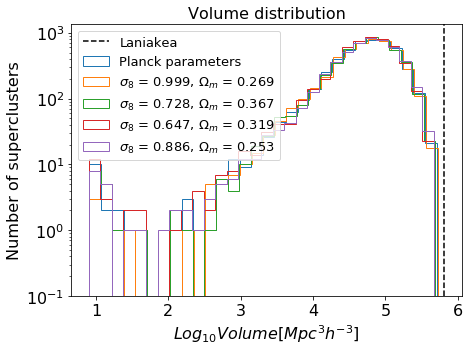

In [8]:
labels = ['Planck parameters', '$\sigma_8$ = 0.999, $\Omega_m$ = 0.269', '$\sigma_8$ = 0.728, $\Omega_m$ = 0.367', '$\sigma_8$ = 0.647, $\Omega_m$ = 0.319','$\sigma_8$ = 0.886, $\Omega_m$ = 0.253']

plt.figure(figsize = (7,5))
plt.rcParams.update({'font.size': 16})


#plt.subplot(2,2,1)
plt.axvline(np.log10(645034.5514),linestyle = '--', color = 'black', label = 'Laniakea')

for i in range(len(archivos)):
    plt.hist(np.log10(volumenes2[i][masas2[i]!=0]),log=True,bins=30, histtype = 'step', label = labels[i])
plt.title('Volume distribution', fontsize = 16)
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$', fontsize = 16)
plt.ylabel('Number of superclusters', fontsize = 16)
plt.rcParams.update({'font.size': 13})
plt.legend()

#plt.rcParams.update({'font.size': 26})
#plt.subplot(2,2,2)
#plt.axvline(np.log10(0.67E17),linestyle = '--', color = 'black', label = 'Laniakea')
#for i in range(len(archivos)):
#    plt.hist(np.log10(masas_hist[i]),log=True,bins=30,histtype = 'step')
#plt.title('Mass distribution', fontsize = 26)
#plt.xlabel('$Log_{10}Mass[M_{\odot}h^{-1}]$', fontsize = 26)
#plt.legend()


#plt.subplot(2,2,3)
#plt.axvline(np.log10(0.67E17/645034.5514),linestyle = '--', clip_on = True, color = 'black', label = 'Laniakea')
#for i in range(len(archivos)):
#    plt.hist(np.log10(densidades[i]),log=True,bins=30,histtype = 'step')
#    plt.title('Density distribution', fontsize = 26)
#plt.xlabel('$Log_{10}Density[M_{\odot}Mpc^{-3}h^{2}]$', fontsize = 26)
#plt.ylabel('Number of superclusters', fontsize = 26)
#plt.legend()

#plt.subplot(2,2,4)
#plt.scatter(np.log10(645034.5514),np.log10(0.67E17),c = 'black', marker = 'o',label = 'Laniakea', s= 3)
#plt.scatter(np.log10(volumenes2[1+1][masas2[1+1]!=0]), np.log10(masas_hist[1+1]),s=0.5)
#plt.title('{}'.format(labels[1+1]), fontsize = 26)
#plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$', fontsize = 26)
#plt.ylabel('$Log_{10}Mass[M_{\odot}h^{-1}]$', fontsize = 26)
#plt.legend()

#plt.subplots_adjust(hspace=0.35, wspace=0.2)


plt.savefig('mass_vol_different.png')

In [18]:
for i in range(len(archivos)):
    out = open("cosmologias{}.csv".format(archivos[i]), "w")
    out.write("volumenes,masas_simulaciones\n")
    for f, p in zip(volumenes[i], masas_simulaciones[i]):
        print(f)
        out.write("{},{}\n".format(f,p))
    out.close()

301680
37176
146688
153176
39272
93720
170968
97112
49808
422024
163128
91832
138392
56360
143880
46992
98600
111192
187304
191800
8
77760
123432
216800
62200
16096
40080
87216
139840
73792
158160
53160
40336
83232
120832
293432
49448
38728
169592
209080
35648
109048
288096
27072
274016
205328
249432
198176
68424
13144
24536
27736
24456
60816
269600
202248
50776
160848
169896
50592
207096
34096
435368
39168
27768
179584
42160
51144
824
116408
31752
70688
113056
58624
10104
75608
48744
55072
106704
241776
256920
13480
225368
104672
191552
335888
98016
108808
161096
117512
142624
62584
231720
116584
16232
44328
299424
209968
243240
431408
76232
73272
307296
207264
507880
59168
266912
98400
129040
466424
20152
35584
387504
303224
165336
45608
67168
259752
303464
43120
116432
58952
54688
174368
162416
164336
169888
13032
260576
8400
327512
74448
1104
142200
197192
28784
274184
326992
197576
481824
27672
21040
230136
256736
27672
189064
81736
138624
45712
43712
129064
51520
122784
23312
266

34032
58344
224960
50072
176400
77768
133952
178816
88432
170544
6864
54072
170200
38256
8
36128
85952
91312
53032
45832
153664
50464
82624
50920
34008
104832
71056
159768
55224
73024
36136
109144
49056
67904
95504
130472
45264
118656
124352
139048
105752
88584
108048
96624
253344
127440
178288
42400
58608
198136
122648
25080
35088
94360
67088
164280
89008
43808
109424
38656
135128
32264
4544
135752
108272
46024
2360
191544
94240
44776
90200
110720
197392
23904
61552
72680
28760
66752
57720
89824
48712
2128
32672
193880
102464
72576
8
16
52160
189768
73776
25128
97408
186104
130824
71112
76312
183424
126272
134648
165488
35328
133192
98464
65072
166824
19232
164192
96888
127648
112632
66208
4312
69752
76576
48720
92392
69656
86472
120840
189088
35784
94544
25336
47832
134736
206584
186032
75616
46112
66704
17264
225768
71904
46480
75072
9520
52888
78960
38440
71008
69304
8
31000
164728
158168
121192
55416
85536
124336
111952
198392
106120
50416
109816
66448
94944
197416
27648
107640
10

1032
41272
108872
48608
50416
44360
25112
61824
249536
29696
11328
17072
40832
125504
52040
32456
51864
69528
45352
60848
101984
94496
5336
26432
46568
65008
50360
14296
106736
99464
108608
173480
38856
13112
63576
171728
65608
41200
17304
14856
30336
29576
74864
43848
67144
16784
55688
43088
33376
20352
41016
6528
17096
27240
77832
90992
12464
34176
28464
5712
44456
27256
71384
25376
33024
69152
15536
27952
21760
19696
25760
32224
56616
53424
47328
93096
35304
27680
45712
43616
79472
52208
17464
82552
32224
84496
40608
31520
63416
28208
122176
28560
38320
18688
37936
32008
90904
72192
37968
101536
125544
77736
80432
50656
7960
29152
58920
34776
44192
7904
22496
83096
52216
45048
25776
43736
50736
20816
38368
21912
46296
36544
66408
29040
33232
55600
47056
16216
42824
27032
6856
12416
25280
116120
6872
12072
11872
7152
68584
62704
33528
22504
51176
109952
35360
23416
101600
57768
14952
84176
93776
27136
73560
60160
17440
40160
43464
8
24488
71984
33704
52232
55016
2080
62568
35024
3637

95008
109832
106584
46040
51680
110672
72496
13048
73376
30592
68144
14272
8
136040
112032
56888
72560
312640
124096
49320
204816
56616
64496
59168
122624
97552
71488
243992
50384
83248
47448
18600
187144
13288
116520
40728
98400
90272
94736
70304
110872
66024
137544
106504
150640
105440
124352
82424
64096
63656
184112
130488
101304
1280
177488
130416
228152
153664
57584
115392
38104
122896
85840
53912
28184
215904
123704
16016
53112
59728
86304
92296
3432
132904
143416
87152
160824
71328
95984
120248
118472
78536
136576
235304
33272
134808
107624
36800
76448
134704
96288
261648
71760
157328
83696
150256
95648
46144
186232
14840
86048
96640
195792
92248
53008
122256
79904
46408
67712
55680
97888
34888
84296
62608
83640
107976
92688
161360
129368
106704
24608
162552
73544
50584
118792
82264
103736
74144
63368
68424
21680
127824
81144
72288
6872
125640
47696
47224
90072
83928
161000
75176
74280
128448
57976
101968
50784
6104
84376
129872
92800
97648
193456
60280
32016
26464
37632
62296
4

20408
88664
40056
67736
7848
50752
8
44208
56608
29632
33600
35032
12328
47160
32584
23440
92688
27800
17368
24480
63400
53840
84336
52896
38240
21080
26952
36128
43912
17832
66536
18352
46088
35808
13944
26584
73000
29728
31904
38072
51200
22520
28872
35096
41352
51184
37696
54512
68016
28576
47384
47616
23432
58120
4336
31376
9936
27272
14312
12688
38224
38232
13832
17336
70184
31944
45896
23520
31080
9824
29152
44272
18496
8320
8
25688
71760
18416
22616
10808
80600
23720
58424
91504
44216
23536
21192
79192
7504
29928
41712
34208
74800
85576
4168
16816
13800
11344
30608
88264
47856
17744
10000
34920
16152
23256
28808
37520
7392
79144
42104
24880
27000
11088
65792
52368
80280
24552
48000
40896
52256
23288
27336
3232
31392
25032
81832
8
4024
38600
8528
24112
32504
25952
83064
6416
39944
30560
54216
50568
18592
3368
29832
66688
33968
69312
20472
18656
12952
17080
67408
40456
151880
3536
127928
23912
69088
112536
32472
71488
31088
59040
19160
15936
66448
19496
75440
43664
60448
35904
863

86040
135856
132688
78360
35968
104744
56760
8
44200
15928
51848
25984
197040
194512
81960
42096
197208
3816
71728
28232
72336
13456
35712
94912
140096
58480
130512
66288
83536
61624
8
42624
249648
147944
72232
59936
158392
156352
12544
44384
190288
59752
112440
94912
62096
185344
70208
125344
192656
195600
17656
84472
76336
51736
16688
70496
53200
45368
65640
108912
97912
6848
198560
55096
62752
90912
132648
66792
105144
39232
79872
75400
76064
73000
16
36784
4544
123656
24968
22016
27696
57976
82048
34592
81136
96616
56704
131352
46872
44224
102896
83232
61856
103224
27264
13664
99712
42232
92968
68736
197584
41048
37088
8
31656
12672
58720
86536
8592
180768
38800
71848
35448
159696
42000
55480
105680
18632
111008
106552
153072
34816
51632
102368
61320
56888
81840
29928
124128
104456
80992
44640
112864
11960
115800
76696
146800
111336
60160
60992
30344
125040
189336
250320
3176
39216
44008
77816
73360
83256
131976
95432
73200
73936
19376
11464
25824
92072
48800
31464
114480
106840
10

6792
11608
51896
20328
27040
44880
26616
81024
18312
69904
39640
18640
8208
64632
44480
43072
48
5728
29880
38824
20984
26120
10736
42880
30224
15512
3344
13688
27104
640
26152
71920
19312
3328
4352
16856
44336
16536
14360
28560
41928
27736
18896
25320
9288
44352
15232
55648
3232
24896
16560
71200
30816
95576
16488
39104
66624
14568
46880
22120
26712
41664
23992
3480
16432
9472
7168
47992
77312
13232
77008
8
41712
13400
1208
15128
59096
47936
47720
25224
18256
12776
26640
36752
76192
12440
14912
29376
34904
32000
63376
20632
28280
69264
38328
37952
2848
25504
53712
10864
16104
35480
45416
33104
19608
26088
23936
16440
2736
2192
20088
25488
29456
37584
27136
23792
51208
8
33624
27264
47376
176560
31776
8
34336
29480
1008
25656
58552
98744
8
53936
14400
15680
28760
14544
8
22376
23728
21040
27784
45648
10112
66968
80768
15072
7832
8544
36536
31488
24400
16368
8
50408
22656
18944
17944
32256
16168
13880
15200
8920
17032
19136
16
34136
18664
28064
6472
28104
16064
11608
23808
4840
43184
29

93336
63752
88744
57648
116000
129112
111456
92040
123768
39136
97552
46904
66088
32408
49072
97696
77784
86032
106592
97496
51512
82792
62624
30368
36624
38152
102024
155608
19688
81088
35496
53464
56944
8
83896
90856
64872
66648
114768
115320
4048
36736
30088
117312
52264
54680
77312
102864
87744
57000
66032
95936
170464
123608
200600
171168
55704
28944
90560
121272
121152
91008
1656
143992
181816
40064
43272
43088
51576
43600
35504
2480
63104
16048
61280
39000
89624
56744
60336
20744
96696
76744
44280
33704
48528
25568
117200
139840
42944
121760
64808
79192
59368
2192
39104
64288
119392
91400
134640
86944
25392
149096
99512
79992
80464
53472
75568
49928
85232
134560
138168
83720
77672
138520
81352
56992
170352
101216
20480
76472
101032
36336
15688
98672
103536
117936
123632
27800
32360
69288
145688
96240
124936
92240
21728
22496
22080
45224
51752
52688
29360
92080
69712
115552
193272
107800
78744
54152
155184
33520
49648
69320
178704
32160
68184
178312
8496
11464
72056
102856
143840

285248
247936
282600
74408
135888
145152
35512
217632
161440
96096
112816
266152
103984
58312
53136
179968
33632
79632
176688
63888
111072
59848
98816
81728
7832
266656
15880
27640
134256
72016
46632
31160
127128
82368
131608
143352
21040
106800
221224
264808
50896
158032
79320
346464
33280
52696
99784
294816
19480
392472
12840
36240
28848
48312
17496
111864
21536
28912
66784
57048
103408
22752
42688
440392
18144
14520
65528
14096
166712
421920
56808
329176
154848
146424
192320
23776
44464
142408
21168
193000
56520
87808
78472
32336
46984
355936
134784
180944
248032
497128
61280
14624
262728
271472
121472
60816
53936
386160
26088
235688
10240
302936
378368
144936
375024
13512
218728
170640
127368
20024
40984
201128
174608
199864
468968
133576
223600
109536
188808
313248
360888
155312
214744
116944
52856
76480
220888
302392
5384
55528
217216
127504
126712
217472
324480
33704
76296
85728
211320
179160
56936
221448
281760
106464
146160
174768
52368
45664
12304
172784
147624
54344
365920
1

58344
90928
56120
63008
131496
103920
185408
133280
61032
219032
25112
97008
24480
71640
153792
51512
43688
12624
87584
39184
41288
53824
127704
7840
50184
72448
46016
38480
175256
67128
161152
59240
42152
66616
145976
32576
672
57400
47912
142688
81672
152200
72840
55032
40984
117032
99184
102904
49496
42264
43584
52760
31256
130416
23456
76952
42928
187280
39784
85760
158400
47304
66992
56632
107368
42888
15840
36080
145312
82984
118152
115552
36024
47488
10320
93032
44648
66408
76584
205216
116760
84640
52392
110856
125664
64496
59712
11928
150664
76048
53968
11088
34088
31984
74920
67192
6400
13568
48528
93264
60056
544
150720
126800
51928
90352
73312
131488
66592
5960
124016
93792
145808
8080
81096
32328
81616
105968
33592
82712
186328
43488
55112
33416
66584
79584
95840
40944
39472
6880
61744
75568
74192
107184
96912
9520
41272
22088
102928
32032
37968
56104
124536
56880
152432
68112
115776
3840
190336
189968
84032
57640
23528
67448
81248
43128
113912
27008
155080
91504
40384
546

26464
23512
84840
54840
19968
35464
31120
34648
50056
32032
17256
6024
7520
52088
27352
45528
20056
7016
37376
26848
21952
79856
27824
22232
6840
21288
59624
14168
19832
23384
38056
7592
4760
8
6376
14688
7248
90448
16976
82080
26120
7776
11352
19328
8800
67008
26536
46768
11752
6712
98576
8864
22976
20536
43704
27592
7448
18520
66816
22192
10048
21888
7488
20720
26544
3992
23808
1896
31240
6848
17888
21264
8
16
2080
37176
40608
9224
47520
21016
40328
67752
17544
36384
16440
46536
21400
97600
24408
59392
108336
19640
22688
23552
77800
24864
41624
19336
32624
8488
42144
62048
16224
18312
19152
43760
11120
15184
14112
15536
96312
28104
4960
21640
11896
25360
44848
7752
7352
9648
24960
17584
33912
14848
64960
2544
9688
8
16632
18136
23936
39048
35752
1272
20936
16800
20376
12848
72384
86656
856
29688
34728
3584
40736
13024
12432
9960
17136
15720
18792
24536
20112
109808
15000
6672
90192
32040
57984
38600
36816
18064
23632
3416
6520
119720
14504
3736
24704
63136
17848
10952
14304
27720
223

In [4]:
import pandas as pd
archivos = [0,14,25,32,38]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Datos/cosmologias{}.csv'

volumenes = []
masas_simulaciones = []

for i in archivos:
    read = pd.read_csv(filename.format(i))
    volumenes.append(read['volumenes'])
    masas_simulaciones.append(read['masas_simulaciones'])
volumenes2 = np.array(volumenes)

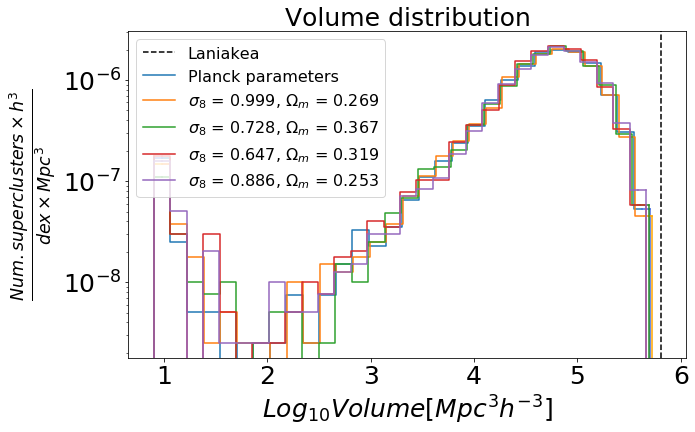

In [14]:
colores = ['royalblue', 'orange', 'forestgreen', 'tab:red', 'tab:purple']
labels = ['Planck parameters', '$\sigma_8$ = 0.999, $\Omega_m$ = 0.269', '$\sigma_8$ = 0.728, $\Omega_m$ = 0.367', '$\sigma_8$ = 0.647, $\Omega_m$ = 0.319','$\sigma_8$ = 0.886, $\Omega_m$ = 0.253']

plt.figure(figsize = (10,6))
plt.rcParams.update({'font.size': 25})

plt.axvline(np.log10(645034.5514),linestyle = '--', color = 'black', label = 'Laniakea')

for i in range(len(archivos)):
    H, bins = np.histogram(np.log10(volumenes2[i]),bins=30)
    H = H/((720**3)*bins[1]-bins[0])
    bincentres = [(bins[j]+bins[j+1])/2. for j in range(len(bins)-1)]
    plt.step(bincentres,H,where='mid', label = labels[i])
    plt.plot((bins[-1], bins[-1]), (0, H[-1]),colores[i])
    plt.plot((bincentres[-1], bins[-1]), (H[-1], H[-1]),colores[i])
    plt.plot((bins[0], bins[0]), (0, H[0]),colores[i])
    plt.plot((bincentres[0], bins[0]), (H[0], H[0]),colores[i])
plt.yscale('log')
plt.title('Volume distribution', fontsize = 25)
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$', fontsize = 25)
plt.ylabel(r'$\frac{Num. superclusters \times h^3}{dex \times Mpc^3}$', fontsize = 25)
plt.rcParams.update({'font.size': 16})
plt.legend(loc = 2)
plt.savefig('vol_different_simulations.png')